# Credit EDA Case Study

### Problem Statement




This case study aims to give an idea of applying EDA in a real business scenario. It aims at developing a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

### Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

- The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

- All other cases: All other cases when the payment is paid on time.

 

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

- Approved: The Company has approved loan Application

- Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

- Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

- Unused offer:  Loan has been cancelled by the client but on different stages of the process.

In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

**Methodlogy Used**

- Reading the Application Dataset
- Analyze the structure of data
- Data Quality checks and looking for missing values
- Analyze checking for data inbalance
- Perform Univariate, Bivariate Analysis on partitioned Dataset
- Read “Previous Application” data
- Merging Application and previous application Dataset
- Perform analysis on merged Dataset
- Observations and conclusions



# Part I

In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns

In [3]:
%matplotlib inline

##  Reading the Data

In [4]:
applications=pd.read_csv("application_data.csv")

In [5]:
previous_applications=pd.read_csv("previous_application.csv")

In [6]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [7]:
# Getting a glimpse of the data
applications.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

## Inspecting the Dataframe

In [8]:
# Checking the number of rows and columns in the dataframe
applications.shape

(307511, 122)

In [9]:
pd.set_option('display.max_columns', 200)

In [10]:
# Checking the column-wise info of the dataframe
applications.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [11]:
#checking the summary of numeric columns
applications.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

### Data Quality checks and looking for missing values

- We observe Columns DAYS_BIRTH, DAYS_EMPLOYEED, DAYS_REGISTERED contain negative values. converting them to positive value
- Continous variable AMT_INCOME_TOTAL, AMT_CREDIT have continous values these should be binned into categories
- DAYS_BIRTH, DAYS_EMPLOYEED should also be binned to determine age_groups and income_groups of clients


In [12]:
#checking for null values
pd.set_option('display.max_rows',200)
applications.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

**Calculating Percentage of null values**

In [13]:
for i in applications.columns:
    a=(applications[i].isnull().sum()/applications.shape[0])*100
    print("Column ",i," has ",round(a,5)," % Null values")
  

Column  SK_ID_CURR  has  0.0  % Null values
Column  TARGET  has  0.0  % Null values
Column  NAME_CONTRACT_TYPE  has  0.0  % Null values
Column  CODE_GENDER  has  0.0  % Null values
Column  FLAG_OWN_CAR  has  0.0  % Null values
Column  FLAG_OWN_REALTY  has  0.0  % Null values
Column  CNT_CHILDREN  has  0.0  % Null values
Column  AMT_INCOME_TOTAL  has  0.0  % Null values
Column  AMT_CREDIT  has  0.0  % Null values
Column  AMT_ANNUITY  has  0.0039  % Null values
Column  AMT_GOODS_PRICE  has  0.0904  % Null values
Column  NAME_TYPE_SUITE  has  0.42015  % Null values
Column  NAME_INCOME_TYPE  has  0.0  % Null values
Column  NAME_EDUCATION_TYPE  has  0.0  % Null values
Column  NAME_FAMILY_STATUS  has  0.0  % Null values
Column  NAME_HOUSING_TYPE  has  0.0  % Null values
Column  REGION_POPULATION_RELATIVE  has  0.0  % Null values
Column  DAYS_BIRTH  has  0.0  % Null values
Column  DAYS_EMPLOYED  has  0.0  % Null values
Column  DAYS_REGISTRATION  has  0.0  % Null values
Column  DAYS_ID_PUBLISH

### Identifying the list of columns with more than 50% Null values

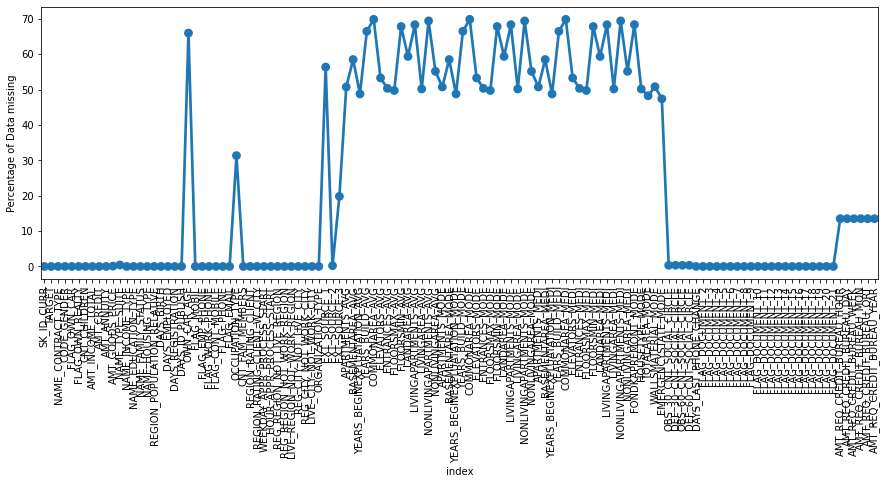

In [14]:
plt.figure(figsize=(15,5))
df=pd.DataFrame((applications.isnull().sum())*100/applications.shape[0]).reset_index()
sns.pointplot('index',0,data=df)
plt.xticks(rotation=90)
plt.ylabel('Percentage of Data missing')
plt.show()

In [15]:
nullcolumns=[]

In [16]:
for i in applications.columns:
    if applications[i].isnull().sum()>0:
        a=round((applications[i].isnull().sum()/applications.shape[0])*100,2)
        print("Column ",i," has ",a," % Null values")
        if a>50:
            nullcolumns.append(i)

Column  AMT_ANNUITY  has  0.0  % Null values
Column  AMT_GOODS_PRICE  has  0.09  % Null values
Column  NAME_TYPE_SUITE  has  0.42  % Null values
Column  OWN_CAR_AGE  has  65.99  % Null values
Column  OCCUPATION_TYPE  has  31.35  % Null values
Column  CNT_FAM_MEMBERS  has  0.0  % Null values
Column  EXT_SOURCE_1  has  56.38  % Null values
Column  EXT_SOURCE_2  has  0.21  % Null values
Column  EXT_SOURCE_3  has  19.83  % Null values
Column  APARTMENTS_AVG  has  50.75  % Null values
Column  BASEMENTAREA_AVG  has  58.52  % Null values
Column  YEARS_BEGINEXPLUATATION_AVG  has  48.78  % Null values
Column  YEARS_BUILD_AVG  has  66.5  % Null values
Column  COMMONAREA_AVG  has  69.87  % Null values
Column  ELEVATORS_AVG  has  53.3  % Null values
Column  ENTRANCES_AVG  has  50.35  % Null values
Column  FLOORSMAX_AVG  has  49.76  % Null values
Column  FLOORSMIN_AVG  has  67.85  % Null values
Column  LANDAREA_AVG  has  59.38  % Null values
Column  LIVINGAPARTMENTS_AVG  has  68.35  % Null values
C

In [17]:
#columns with more than 50% Null values
nullcolumns

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

### Recommendations for handling Irrelevant and Missing Values
1. Columns having more 50% Null values can be removed. 
2. With Columns with upto 13% Null values We can replace the missing values in numerical columns with mean/median.
3. With Categorical Columns with upto 13% Null values, We can replace Null Values with mode value
4. With categorical columns with more than 30% Null values we can create a Unknown category 

In [18]:
# Removing columns with more than 50% Null values

In [19]:
app=applications.copy()

In [20]:
# Droping columns with more than 50% NULL values
app.drop(columns=nullcolumns, inplace=True)

In [21]:
app.shape

(307511, 81)

In [22]:
#checking remaining columns with null values
for i in app.columns:
    if app[i].isnull().sum()>0:
        a=app[i].isnull().sum()/app.shape[0]
        print("Column ",i," has ",round(a,5)," % Null values")

Column  AMT_ANNUITY  has  4e-05  % Null values
Column  AMT_GOODS_PRICE  has  0.0009  % Null values
Column  NAME_TYPE_SUITE  has  0.0042  % Null values
Column  OCCUPATION_TYPE  has  0.31346  % Null values
Column  CNT_FAM_MEMBERS  has  1e-05  % Null values
Column  EXT_SOURCE_2  has  0.00215  % Null values
Column  EXT_SOURCE_3  has  0.19825  % Null values
Column  YEARS_BEGINEXPLUATATION_AVG  has  0.48781  % Null values
Column  FLOORSMAX_AVG  has  0.49761  % Null values
Column  YEARS_BEGINEXPLUATATION_MODE  has  0.48781  % Null values
Column  FLOORSMAX_MODE  has  0.49761  % Null values
Column  YEARS_BEGINEXPLUATATION_MEDI  has  0.48781  % Null values
Column  FLOORSMAX_MEDI  has  0.49761  % Null values
Column  TOTALAREA_MODE  has  0.48269  % Null values
Column  EMERGENCYSTATE_MODE  has  0.47398  % Null values
Column  OBS_30_CNT_SOCIAL_CIRCLE  has  0.00332  % Null values
Column  DEF_30_CNT_SOCIAL_CIRCLE  has  0.00332  % Null values
Column  OBS_60_CNT_SOCIAL_CIRCLE  has  0.00332  % Null value

**Numeric columns**

In [23]:
#  rows related to Credit Bureau information have 13.5% Null Values
col = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [24]:
app[col].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                   261.000000                   25.000000

In [25]:
df=app[col].copy()

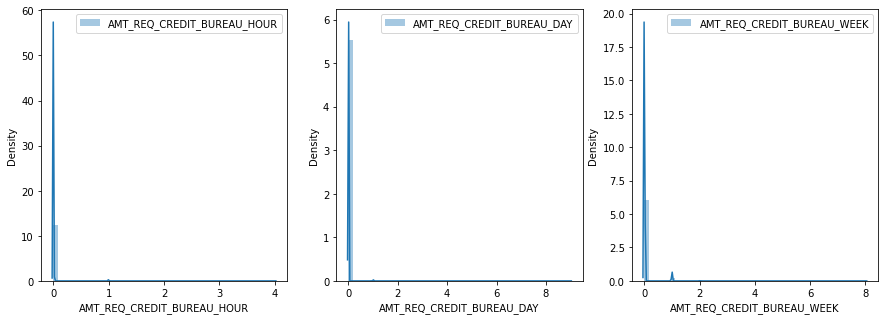

In [26]:
#Analyzing the columns 'AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK
       
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(app['AMT_REQ_CREDIT_BUREAU_HOUR'],label='AMT_REQ_CREDIT_BUREAU_HOUR')
plt.legend()
plt.subplot(1,3,2)
sns.distplot(app['AMT_REQ_CREDIT_BUREAU_DAY'],label='AMT_REQ_CREDIT_BUREAU_DAY')
plt.legend()
plt.subplot(1,3,3)
sns.distplot(app['AMT_REQ_CREDIT_BUREAU_WEEK'],label='AMT_REQ_CREDIT_BUREAU_WEEK')
plt.legend()
plt.show()

**We observe high density at 0 value(median value). We can Fill the missing values in columns with median values**

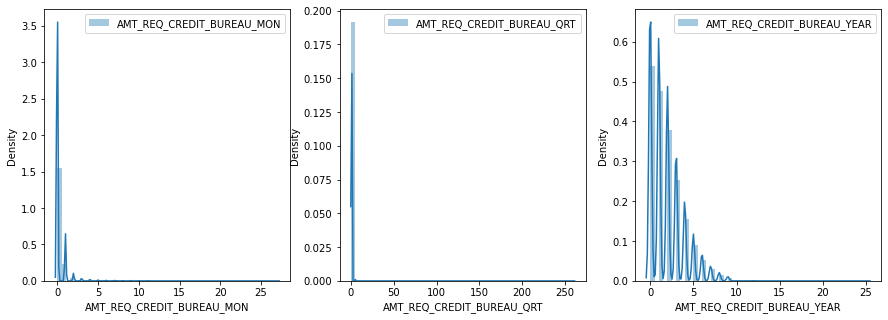

In [27]:
# Analyzing the columns AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(app['AMT_REQ_CREDIT_BUREAU_MON'],label='AMT_REQ_CREDIT_BUREAU_MON')
plt.legend()
plt.subplot(1,3,2)

sns.distplot(app['AMT_REQ_CREDIT_BUREAU_QRT'],label='AMT_REQ_CREDIT_BUREAU_QRT')
plt.legend()
plt.subplot(1,3,3)
sns.distplot(app['AMT_REQ_CREDIT_BUREAU_YEAR'],label='AMT_REQ_CREDIT_BUREAU_YEAR')
plt.legend()
plt.show()

In [28]:
# We can fill Null values in AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR with median values
# for columns AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT the median value is 0

In [29]:

app['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

**Observation**
- We observe negative value for days we need to convert these into positive values using abs method


In [30]:
app['DAYS_LAST_PHONE_CHANGE']=app['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: abs(x))

In [31]:
app['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean        962.858788
std         826.808487
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

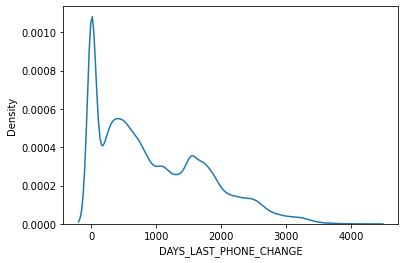

In [32]:
sns.distplot(app['DAYS_LAST_PHONE_CHANGE'],hist=False,label='DAYS_LAST_PHONE_CHANGE')
plt.show()

##### As number of null values are almost zero We can either drop this or cap it with mean/median/mode value
We observe high density around 0. We can Fill Null value with 0


### Oberving Nulls in  columns AMT_ANNUITY

In [33]:
# Exploring the column AMT_ANNUITY with 0.004  %
app['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

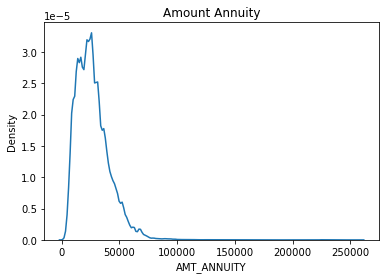

In [34]:
plt.title('Amount Annuity')
sns.distplot(app['AMT_ANNUITY'],hist=False)

plt.show()

Mean and median are near by. We should fill null values with median values 

In [35]:
# Exploring AMT_GOODS_PRICE column with 0.09% Null values

In [36]:
app['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

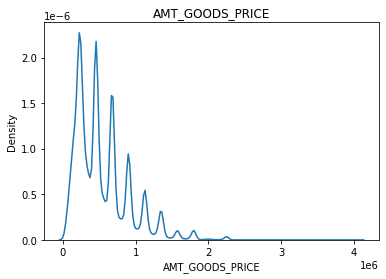

In [37]:
plt.title('AMT_GOODS_PRICE')
sns.distplot(app['AMT_GOODS_PRICE'],hist=False)

plt.show()

We must fill missing values with median value 4.500000e+05

#### CNT_FAM_MEMBERS column has 0.000650% missing values

Since only 0.00065% values are missing which is very small we can also choose to drop these or fill with median value

In [38]:
app["CNT_FAM_MEMBERS"].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [39]:
# Fill missing value with median value

#### Categorical Columns

In [40]:
#exploring the column OCCUPATION_TYPE with 31% Null values
app['OCCUPATION_TYPE'].value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

In [41]:
#There are 31% NULL values the most occurring value is Laborers with 26% value 
#Filling Null value with the value Unknown 


In [42]:
# Exploring the column NAME_TYPE_SUITE

In [43]:
app['NAME_TYPE_SUITE'].value_counts(normalize=True)*100

Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64

In [44]:
#81 % of values of NAME_TYPE_SUITE has the value Unaccompanied
val=app['NAME_TYPE_SUITE'].mode()[0]
val

'Unaccompanied'

The column NAME_TYPE_SUITE has 0.0042  % Null values
We can either drop these values. But we can fill these Null values with the mode value 'Unaccompanied'

##  Univariate Analysis


### Exploring Columns and checking for outliers

In [45]:
#Checking Unique value in the column SK_ID_CURR
app["SK_ID_CURR"].nunique()

307511

In [46]:
# Exploring values in TARGET Column

In [47]:
app['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [48]:
# value counts in percentages
app['TARGET'].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

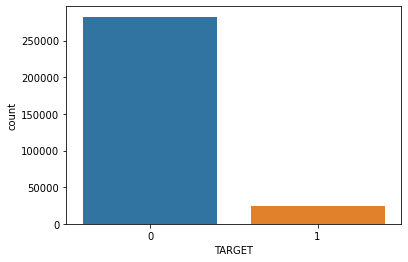

In [49]:
sns.countplot(app['TARGET'])
plt.show()

In [50]:
# Exploring values in the column NAME_CONTRACT_TYPE

In [51]:
app['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [52]:
app['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100

Cash loans         90.478715
Revolving loans     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64

No outliers in NAME_CONTRACT_TYPE

In [53]:
#Checking the Gender column

In [54]:
app['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [55]:
# We observe Gender column containing incorrect value XNA. 

In [56]:
app['CODE_GENDER'].value_counts(normalize=True)

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

**We can cap these outliers with value 'F' as it is the most probable value**

In [57]:
# Checking the values in the column FLAG_OWN_CAR

app['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

No outliers present

In [58]:
#Checking the column FLAG_OWN_REALTY

app['FLAG_OWN_REALTY'].value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

No outliers present in FLAG_OWN_REALTY

In [59]:
#Checking the column CNT_CHILDREN for number of children of the client


In [60]:
app['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

### We observe like 19 for number of children. A person cannot have so many children hence we will also consider this values as an outlier. Exploring the values in the column

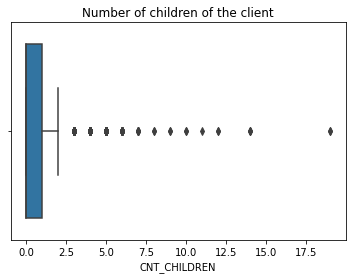

In [61]:
plt.title("Number of children of the client")
sns.boxplot(data=app,x='CNT_CHILDREN')
plt.show()

In [62]:
app['CNT_CHILDREN'].describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [63]:
##checking value at 99 percentile
np.percentile(app['CNT_CHILDREN'],99.9)

4.0

In [64]:
##number of rows with the outliers

app[app['CNT_CHILDREN']>4].count()[0]

126

**There are 126 rows with CNT_CHILDREN more than 4**

We can drop these outliers


In [65]:
##checking the values in the AMT_INCOME_TOTAL column

In [66]:
app['AMT_INCOME_TOTAL'].value_counts()

135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
101119.5        1
79425.0         1
101128.5        1
202275.0        1
262174.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64

In [67]:
app['AMT_INCOME_TOTAL'].describe().apply(lambda x: format(x, 'f'))

count       307511.000000
mean        168797.919297
std         237123.146279
min          25650.000000
25%         112500.000000
50%         147150.000000
75%         202500.000000
max      117000000.000000
Name: AMT_INCOME_TOTAL, dtype: object

**We observe huge difference in 75th quantile and max value**

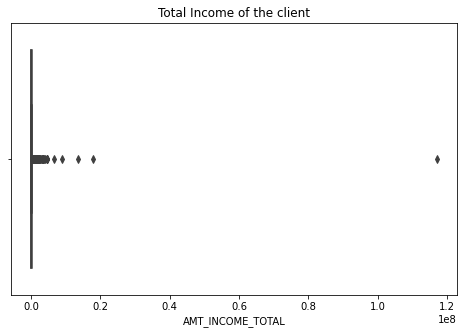

In [68]:
plt.figure(figsize=(8,5))
plt.title('Total Income of the client')
sns.boxplot(data=app, x='AMT_INCOME_TOTAL')
plt.show()

We can see the max value is completely an outlier. 

In [69]:
#checking the records of the client for further information

In [70]:
pd.set_option('display.max_columns', None)
app[app['AMT_INCOME_TOTAL']== app['AMT_INCOME_TOTAL'].max()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
12840      114967       1         Cash loans           F            N   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
12840               Y             1       117000000.0    562491.0   

       AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
12840      26194.5         454500.0   Unaccompanied          Working   

                 NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
12840  Secondary / secondary special            Married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
12840                    0.010643      -12615           -922   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
12840            -6762.0            -3643           1               1   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
12840                0                 1           0           0   

      OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
12840        Laborers              3.0                     2   

       REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
12840                            2                    TUESDAY   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
12840                       14                           0   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
12840                           0                            0   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
12840                       0                       0   

       LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
12840                        0  Business Entity Type 3      0.113161   

       EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
12840      0.145543                       0.9791         0.1667   

       YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  \
12840                        0.9791          0.1667   

       YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  \
12840                        0.9791          0.1667          0.0715   

      EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
12840                  No                       0.0                       0.0   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
12840                       0.0                       0.0   

       DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
12840                     0.0                0                1   

       FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
12840                0                0                0                0   

       FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
12840                0                0                 0                 0   

       FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
12840                 0                 0                 0                 0   

       FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
12840                 0                 0                 0                 0   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
12840                 0                 0                         0.0   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
12840                        0.0                         0.0   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
12840                        0.0                        0.0   

       AMT_REQ_CREDIT_BUREAU_YEAR  
12840                         1.0

**If we observe we will find that the target variable is 1 i.e client with payment difficulties 
the occupation type is Laborers
Clearly the data is an outlier we can remove this row**

### Binning continous values

In [71]:
#Binning for AMT_CREDIT_GROUP
app["AMT_CREDIT_GROUP"]=pd.cut(app["AMT_CREDIT"],bins=[0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,756000,806000,850000,900000,950000,1000000,1500000,2000000,2500000,3000000,3500000,4000000,10000000],
                                    labels=["Less than 50000","50000-100000","100000-150000","150000-200000","200000-250000","250000-300000","300000-350000","350000-400000","400000-450000","450000-500000","500000-550000","550000-600000","600000-650000","650000-700000","700000-750000","750000-800000","800000-850000","850000-900000","900000-950000","950000-1000000","1000000-1500000","1500000-2000000","2000000-2500000","2500000-3000000","3000000-3500000","3500000-4000000","More than 4000000"],right=False)

In [72]:
app["AMT_CREDIT_GROUP"].head()

0      400000-450000
1    1000000-1500000
2      100000-150000
3      300000-350000
4      500000-550000
Name: AMT_CREDIT_GROUP, dtype: category
Categories (27, object): ['Less than 50000' < '50000-100000' < '100000-150000' < '150000-200000' ... '2500000-3000000' < '3000000-3500000' < '3500000-4000000' < 'More than 4000000']

### AMT_INCOME_TOTAL

#### Binning the AMT_INCOME_TOTAL(Total Income of the client) into income slabs to get more insights into data

In [73]:
app['AMT_INCOME_TOTAL'].max()

117000000.0

In [74]:

#calculating income slabs according income tax slabs
def calculate_incomegroup(x):
    if x <125000:
        return 'Upto 1.25L'
    elif x<250000:
        return '1.25L- 2.5L'
    elif x<375000:
        return '2.5L- 3.75L'
    else:
       return '3.75+'
    

In [75]:
app['Income_Category']=app['AMT_INCOME_TOTAL'].apply(lambda x:calculate_incomegroup(x) )

In [76]:
app['Income_Group'] =pd.cut(app["AMT_INCOME_TOTAL"],bins=[0,125000,250000,375000,500000000],labels=["Low-Income","Avg-Income","High-Income","V-High-Income"],right=False)

In [77]:
# checking the columns 

In [78]:
app[['AMT_INCOME_TOTAL','Income_Category','Income_Group']].head()

AMT_INCOME_TOTAL Income_Category Income_Group
0          202500.0     1.25L- 2.5L   Avg-Income
1          270000.0     2.5L- 3.75L  High-Income
2           67500.0      Upto 1.25L   Low-Income
3          135000.0     1.25L- 2.5L   Avg-Income
4          121500.0      Upto 1.25L   Low-Income

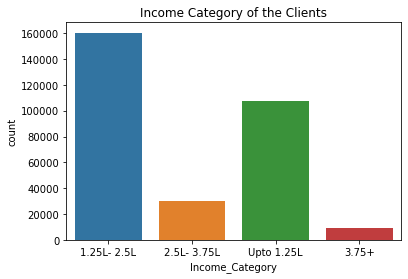

In [79]:
plt.title('Income Category of the Clients')
sns.countplot(app['Income_Category'])
plt.show()

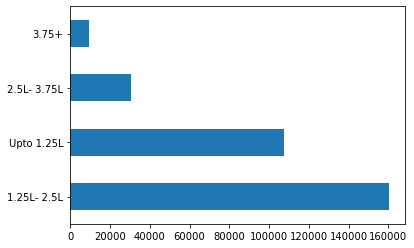

In [80]:
app['Income_Category'].value_counts().plot.barh()
plt.show()

In [81]:
app['Income_Group'].value_counts()

Avg-Income       160334
Low-Income       107399
High-Income       30450
V-High-Income      9328
Name: Income_Group, dtype: int64

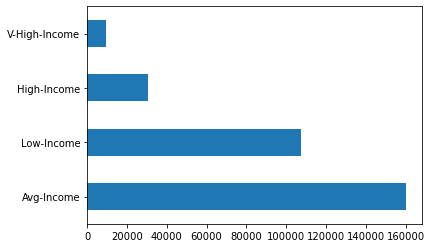

In [82]:
app['Income_Group'].value_counts().plot.barh()
plt.show()

We can observe that most of the clients belong to the Average income group having Income between 1.25 and 2.5L

**Checking the values in the column AMT_CREDIT**

In [83]:
app['AMT_CREDIT'].value_counts()

450000.0     9709
675000.0     8877
225000.0     8162
180000.0     7342
270000.0     7241
             ... 
827100.0        1
413442.0        1
1652458.5       1
825853.5        1
2097058.5       1
Name: AMT_CREDIT, Length: 5603, dtype: int64

In [84]:
app['AMT_CREDIT'].describe().apply(lambda x: format(x,'f'))

count     307511.000000
mean      599025.999706
std       402490.776996
min        45000.000000
25%       270000.000000
50%       513531.000000
75%       808650.000000
max      4050000.000000
Name: AMT_CREDIT, dtype: object

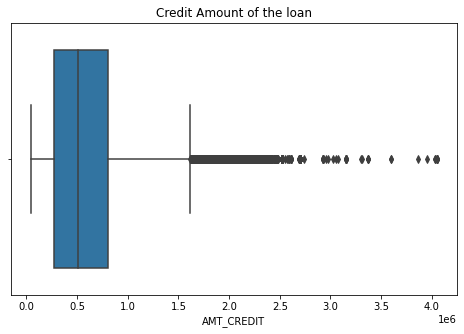

In [85]:
#Boxplot to look for outliers
plt.figure(figsize=(8,5))
plt.title("Credit Amount of the loan")
sns.boxplot(data=app, x='AMT_CREDIT')
plt.show()

In [86]:
pd.set_option("display.max_rows", 999)

In [87]:
q1=app['AMT_CREDIT'].quantile(0.25)

q3=app['AMT_CREDIT'].quantile(0.75)
IQR= q3-q1
# Exploring
app[app['AMT_CREDIT']>1.5*IQR].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1       100003       0         Cash loans           F            N   
6       100009       0         Cash loans           F            Y   
7       100010       0         Cash loans           M            Y   
8       100011       0         Cash loans           F            N   
13      100017       0         Cash loans           M            Y   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1                N             0          270000.0   1293502.5      35698.5   
6                Y             1          171000.0   1560726.0      41301.0   
7                Y             0          360000.0   1530000.0      42075.0   
8                Y             0          112500.0   1019610.0      33826.5   
13               N             1          225000.0    918468.0      28966.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
1         1129500.0          Family         State servant   
6         1395000.0   Unaccompanied  Commercial associate   
7         1530000.0   Unaccompanied         State servant   
8          913500.0        Children             Pensioner   
13         697500.0   Unaccompanied               Working   

              NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1                Higher education            Married  House / apartment   
6                Higher education            Married  House / apartment   
7                Higher education            Married  House / apartment   
8   Secondary / secondary special            Married  House / apartment   
13  Secondary / secondary special            Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                     0.003541      -16765          -1188            -1186.0   
6                     0.035792      -13778          -3130            -1213.0   
7                     0.003122      -18850           -449            -4597.0   
8                     0.018634      -20099         365243            -7427.0   
13                    0.016612      -14086          -3028             -643.0   

    DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
1              -291           1               1                0   
6              -619           1               1                0   
7             -2379           1               1                1   
8             -3514           1               0                0   
13            -4911           1               1                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1                  1           1           0      Core staff              2.0   
6                  1           1           0     Accountants              3.0   
7                  1           0           0        Managers              2.0   
8                  1           0           0             NaN              2.0   
13                 1           0           0         Drivers              3.0   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
1                      1                            1   
6                      2                            2   
7                      3                            3   
8                      2                            2   
13                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                      MONDAY                       11   
6                      SUNDAY                       16   
7                      MONDAY                       16   
8                   WEDNESDAY                       14   
13                   THURSDAY                       13   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                            0                           0   
6                            0                           0   
7                            0     

**Binning AMT_CREDIT values into slabs**

In [88]:
def calculate_loan_amt_category(x):
    if x<60000:
        return 'upto 60000'
    elif x <75000:
        return '60K-75K'
    elif x<100000:
        return '75K- 1L'
    elif x<200000:
        return '1L- 2L'
    elif x<500000:
        return '2L - 5L'
    elif x<750000:
        return '5L- 7.5L'
    else:
        return '7.5L and up'
    

In [89]:
app['Loan_Amt_category']=app['AMT_CREDIT'].apply(lambda x:calculate_loan_amt_category(x))

In [90]:
app[['AMT_CREDIT','Loan_Amt_category']].head()

AMT_CREDIT Loan_Amt_category
0    406597.5           2L - 5L
1   1293502.5       7.5L and up
2    135000.0            1L- 2L
3    312682.5           2L - 5L
4    513000.0          5L- 7.5L

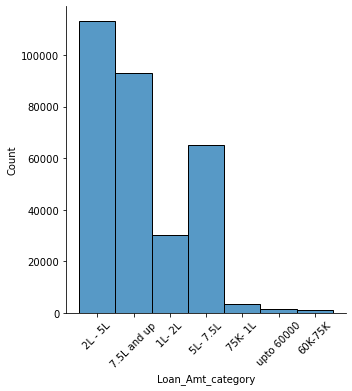

In [91]:
sns.set_style()

sns.displot(app['Loan_Amt_category'])
plt.xticks(rotation=45)
plt.show()

We observe that most people have taken loan amount in the range of 2Lakhs -5 Lakhs

#### We can see high outlier values in the AMT_CREDIT column, it may be possible that some people have taken loan for huge amount. We may leave these as it is.

#### AMT_ANNUITY Column

In [92]:
# Exploring the column AMT_ANNUITY
app['AMT_ANNUITY'].value_counts()

9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
15210.0       1
50265.0       1
73012.5       1
40558.5       1
4437.0        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

In [93]:
app['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

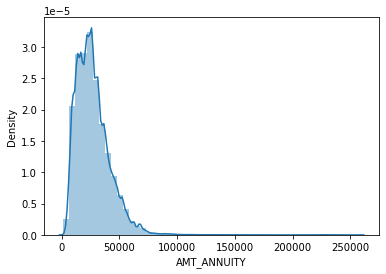

In [94]:
sns.distplot(app['AMT_ANNUITY'])
plt.show()

**We can observe Loan annuity has high density around 25-35K**

In [95]:
#Binning for AMT_ANNUITY_GROUP
app["AMT_ANNUITY_GROUP"]=pd.cut(app["AMT_ANNUITY"],bins=[0,5000,10000,15000,20000,25000,30000,35000,40000,45000,50000,3000000],labels=["Less than 5000","5000-10000","10000-15000","15000-20000","20000-25000","25000-30000","30000-35000","35000-40000","40000-45000","45000-50000","More than 50000"],right=False)
app["AMT_ANNUITY_GROUP"].head()

0    20000-25000
1    35000-40000
2     5000-10000
3    25000-30000
4    20000-25000
Name: AMT_ANNUITY_GROUP, dtype: category
Categories (11, object): ['Less than 5000' < '5000-10000' < '10000-15000' < '15000-20000' ... '35000-40000' < '40000-45000' < '45000-50000' < 'More than 50000']

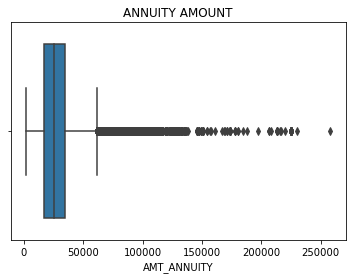

In [96]:
plt.title("ANNUITY AMOUNT")
sns.boxplot(data=app, x='AMT_ANNUITY')
plt.show()

**We observe some outliers in the data.Checking the data corresponding to that value**

In [97]:
app['AMT_ANNUITY'].max()
app[app['AMT_ANNUITY']== app['AMT_ANNUITY'].max()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
17948      120926       0         Cash loans           M            Y   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
17948               N             2          783000.0   4050000.0   

       AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
17948     258025.5        4050000.0   Unaccompanied  Commercial associate   

      NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
17948    Higher education            Married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
17948                    0.009549      -15176           -201   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
17948            -1529.0            -4722           1               1   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
17948                1                 1           0           1   

      OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
17948        Managers              4.0                     2   

       REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
17948                            2                   THURSDAY   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
17948                       14                           1   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
17948                           1                            0   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
17948                       1                       1   

       LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
17948                        1  Industry: type 4      0.706927      0.553165   

       YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
17948                       0.9851         0.1667   

       YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  \
17948                        0.9851          0.1667   

       YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  \
17948                        0.9851          0.1667          0.0356   

      EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
17948                  No                       0.0                       0.0   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
17948                       0.0                       0.0   

       DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
17948                     5.0                0                0   

       FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
17948                0                0                0                0   

       FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
17948                0                0                 0                 1   

       FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
17948                 0                 0                 0                 0   

       FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
17948                 0                 0                 0                 0   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
17948                 0                 0                         0.0   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
17948                        0.0                         0.0   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
17948                        0.0                        0.0   

       AMT_REQ_CREDIT_BUREAU_YEAR   AMT_CREDIT_GROUP Income_Category  \
17948                         0.0  More than 4000000           3.75+   

        Income_Group Loan_Amt_category AMT_ANNUITY_GROUP  
17948  V-High-Income       7.5L and up   More than 50000

**We observe the outlier value corresponds to client having occupation type Managers. We retain the row**

### Exploring the column AMT_GOODS_PRICE

In [98]:

app['AMT_GOODS_PRICE'].describe().apply(lambda x: format(x,'f'))

count     307233.000000
mean      538396.207429
std       369446.460540
min        40500.000000
25%       238500.000000
50%       450000.000000
75%       679500.000000
max      4050000.000000
Name: AMT_GOODS_PRICE, dtype: object

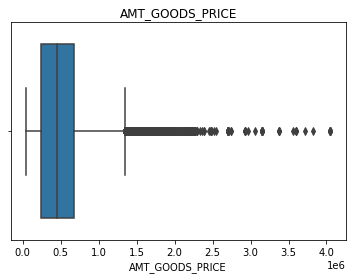

In [99]:
plt.title("AMT_GOODS_PRICE")
sns.boxplot(data=app, x='AMT_GOODS_PRICE')
plt.show()

In [100]:
#Exploring the column NAME_TYPE_SUITE
app['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

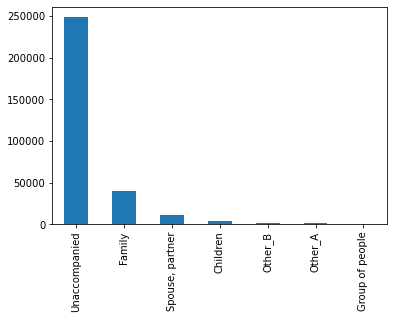

In [101]:
app['NAME_TYPE_SUITE'].value_counts().plot.bar()
plt.show()

**We observe most of the clients came unaccompanied for loan application**

**Exploring the values in the column NAME_INCOME_TYPE**

In [102]:
#checking values in the column NAME_INCOME_TYPE
app['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [103]:
app['NAME_INCOME_TYPE'].value_counts(normalize=True)*100

Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: NAME_INCOME_TYPE, dtype: float64

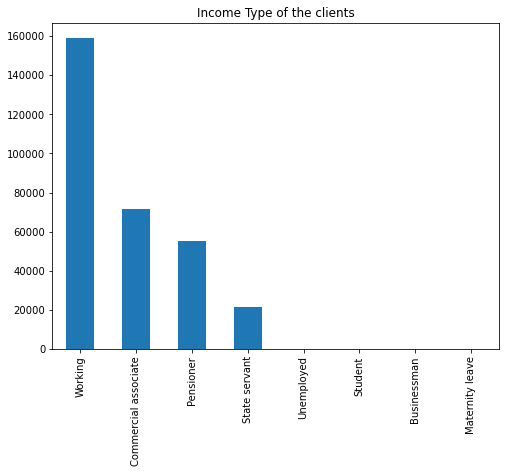

In [104]:
plt.figure(figsize=(8,6))
plt.title("Income Type of the clients")
app['NAME_INCOME_TYPE'].value_counts().plot.bar()
plt.show()

**We observe more than 50% of the loan requests were from the Working Class**

In [105]:
#Exploring the values in the column NAME_EDUCATION_TYPE

In [106]:
app['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [107]:
# checking value counts in percentage
app['NAME_EDUCATION_TYPE'].value_counts(normalize=True)*100

Secondary / secondary special    71.018923
Higher education                 24.344820
Incomplete higher                 3.341994
Lower secondary                   1.240931
Academic degree                   0.053331
Name: NAME_EDUCATION_TYPE, dtype: float64

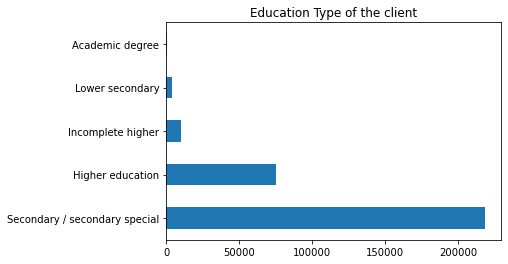

In [108]:
#plotting Horizontal bargraphs to compare education level of the clients
plt.title("Education Type of the client")
app['NAME_EDUCATION_TYPE'].value_counts().plot.barh()
plt.show()

**We can observe that most of the clients have had Secondary / secondary special Education level**

In [109]:
# Exploring the column NAME_FAMILY_STATUS
app['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

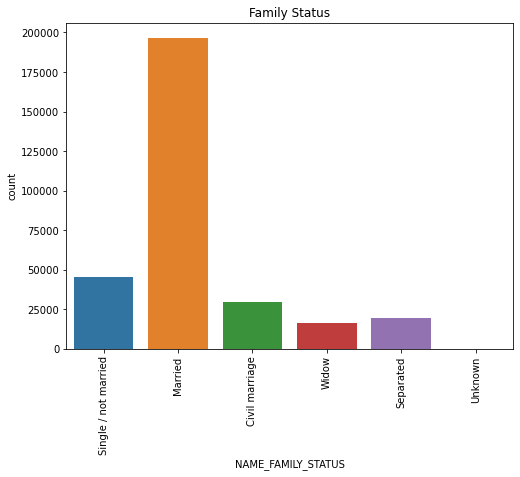

In [110]:
plt.figure(figsize=(8,6))
plt.title("Family Status")
sns.countplot(app['NAME_FAMILY_STATUS'])
plt.xticks(rotation =90)
plt.show()

**We can observe that most of the clients are in the married category**

In [111]:
# Exploring the column NAME_HOUSING_TYPE
app['NAME_HOUSING_TYPE'].value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [112]:
app['NAME_HOUSING_TYPE'].value_counts(normalize=True)*100

House / apartment      88.734387
With parents            4.825844
Municipal apartment     3.636618
Rented apartment        1.587260
Office apartment        0.851026
Co-op apartment         0.364865
Name: NAME_HOUSING_TYPE, dtype: float64

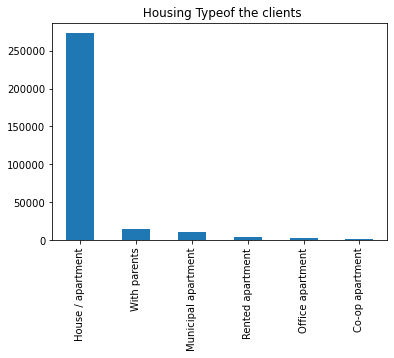

In [113]:
plt.title(' Housing Typeof the clients')
app['NAME_HOUSING_TYPE'].value_counts().plot.bar()
plt.show()

**We can clearly see that most of the clients own a House/ Apartment**

### Exploring the column DAYS_BIRTH

In [114]:
app['DAYS_BIRTH'].head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

**We observe negative values for DAYS_BIRTH. Converting these to positive values using abs() function**

In [115]:
app['DAYS_BIRTH']=app['DAYS_BIRTH'].apply(lambda x: abs(x))
app['DAYS_BIRTH'].head()

0     9461
1    16765
2    19046
3    19005
4    19932
Name: DAYS_BIRTH, dtype: int64

**Deriving Age of the clients**

In [116]:
#Deriving a new column Age from the column DAYS_BIRTH.
app["Age"]=(app["DAYS_BIRTH"]/365).round()

Exploring the Age of the clients as calculated from DAYS_BIRTH

In [117]:
app['Age'].head()

0    26.0
1    46.0
2    52.0
3    52.0
4    55.0
Name: Age, dtype: float64

In [118]:
app['Age'].describe()

count    307511.000000
mean         43.938646
std          11.964047
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: Age, dtype: float64

#### We can observe that the age of the client lies in the range of 21 to 69. There seems to be no outliers

### Binning Age into age groups 

In [119]:
def calculate_agegroup(x):
    if x >=20 and x<30 :
        return '20-30'
    elif x>=30 and x<40:
        return '30-40'
    elif x>=40 and x<50:
        return '40-50'
    elif x>=50 and x<60:
        return '50-60'
    else:
        return '60+'

app['Age_Group']=app['Age'].apply(lambda x: calculate_agegroup(x))

In [120]:
app[['Age','Age_Group']].head()

Age Age_Group
0  26.0     20-30
1  46.0     40-50
2  52.0     50-60
3  52.0     50-60
4  55.0     50-60

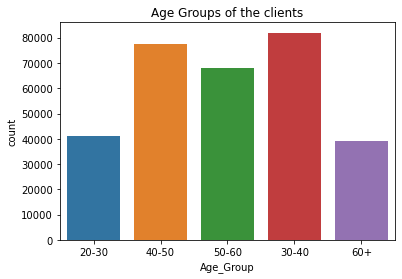

In [121]:
plt.title("Age Groups of the clients")
sns.countplot(app['Age_Group'])
plt.show()

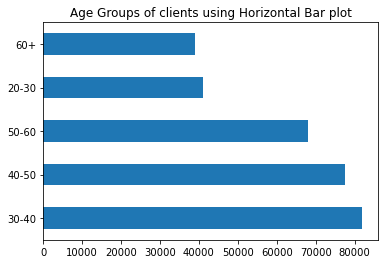

In [122]:
plt.title("Age Groups of clients using Horizontal Bar plot")
app['Age_Group'].value_counts().plot.barh()
plt.show()

**We can observe that most of clients are in the age group of 30-40**

### Exploring the column DAYS_EMPLOYED


In [123]:
app['DAYS_EMPLOYED'].head()

0    -637
1   -1188
2    -225
3   -3039
4   -3038
Name: DAYS_EMPLOYED, dtype: int64

**We observe negative values in the column DAYS_EMPLOYED. As the values cannot be negative we need to convert these into positive quantities**

In [124]:
app['DAYS_EMPLOYED']=app['DAYS_EMPLOYED'].apply(lambda x: abs(x))

**We can calculate Total years of experience of the clients**

In [125]:
app['Exp']=(app["DAYS_EMPLOYED"]/365).round(0)
app['Exp'].head()

0    2.0
1    3.0
2    1.0
3    8.0
4    8.0
Name: Exp, dtype: float64

In [126]:
app['Exp'].describe()

count    307511.000000
mean        185.608021
std         382.165887
min           0.000000
25%           3.000000
50%           6.000000
75%          16.000000
max        1001.000000
Name: Exp, dtype: float64

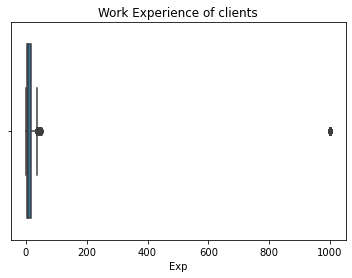

In [127]:
plt.title('Work Experience of clients')
sns.boxplot(app['Exp'])
plt.show()

**There is clearly an outlier value. A person cannot have an experience of 1001 year.
It might be an error while data entry.We will treat this as an outlier**

In [128]:
m=app['Exp'].max()
m

1001.0

In [129]:
# There are clients for whom Days_Employed incorrectly documented. Retaining data and it may provide deeper insights

In [130]:
# checking the occuptaion type of these clients

In [131]:
app[app['Exp']== m]['OCCUPATION_TYPE'].value_counts()

Cleaning staff    2
Name: OCCUPATION_TYPE, dtype: int64

In [132]:
#Further exploring the NAME_INCOME_TYPE of these clients

app[app['DAYS_EMPLOYED']== m]['NAME_INCOME_TYPE'].value_counts()

Working                 44
Commercial associate    17
State servant            3
Name: NAME_INCOME_TYPE, dtype: int64

#### These values have been documented wrongly. They can be either kept as it is


### Exploring the column DAYS_REGISTRATION

In [133]:
app["DAYS_REGISTRATION"].head()

0   -3648.0
1   -1186.0
2   -4260.0
3   -9833.0
4   -4311.0
Name: DAYS_REGISTRATION, dtype: float64

In [134]:
#Checking the values in the column DAYS_REGISTRATION
app["DAYS_REGISTRATION"].describe()

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

**We observe negative values in the column. Converting these into positive values**

In [135]:
app["DAYS_REGISTRATION"]=app["DAYS_REGISTRATION"].apply(lambda x:abs(x))
app["DAYS_REGISTRATION"].head()

0    3648.0
1    1186.0
2    4260.0
3    9833.0
4    4311.0
Name: DAYS_REGISTRATION, dtype: float64

In [136]:
#DAYS_REGISTRATION represent How many days before the application did client change his registration.
#Converting the data into years.

years=round(app[['DAYS_REGISTRATION']])/365


In [137]:
years.head()

DAYS_REGISTRATION
0           9.994521
1           3.249315
2          11.671233
3          26.939726
4          11.810959

In [138]:
years.describe()

DAYS_REGISTRATION
count      307511.000000
mean           13.660604
std             9.651743
min             0.000000
25%             5.506849
50%            12.339726
75%            20.491781
max            67.594521

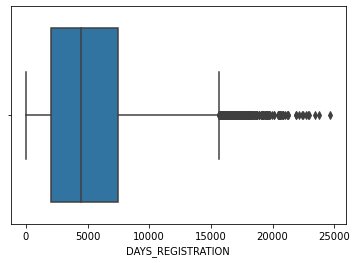

In [139]:
sns.boxplot(app['DAYS_REGISTRATION'])
plt.show()

**We observe some outliers which may be have occurred at the time of data entry. Retaining these daya as they may contribute in providing better insights in data**


#### Column OCCUPATION_TYPE

In [140]:
# Exploring the column OCCUPATION_TYPE

app['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

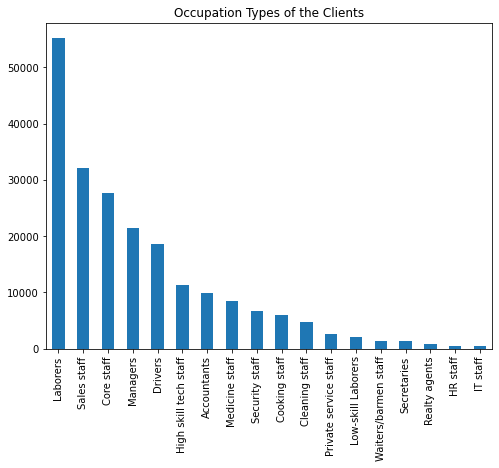

In [141]:
plt.figure(figsize=(8,6))
plt.title("Occupation Types of the Clients")
app['OCCUPATION_TYPE'].value_counts().plot.bar()
plt.show()

**We observe most applications are from laborers followed by sales staff
Least applications are received from from IT Staff**

### Checking the column CNT_FAM_MEMBERS

In [142]:
app["CNT_FAM_MEMBERS"].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

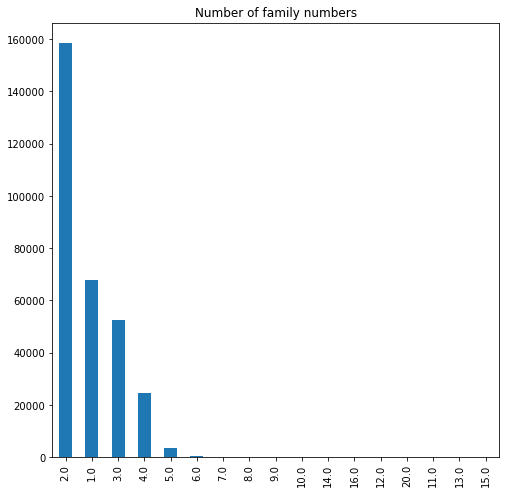

In [143]:
plt.figure(figsize=(8,8))
app["CNT_FAM_MEMBERS"].value_counts().plot.bar()
plt.title("Number of family numbers")
plt.show()

**Most of the clients have two family members
Some clients have more than 15 members in the family**

#### Column ORGANIZATION_TYPE

In [144]:
# checking the column ORGANIZATION_TYPE

app['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

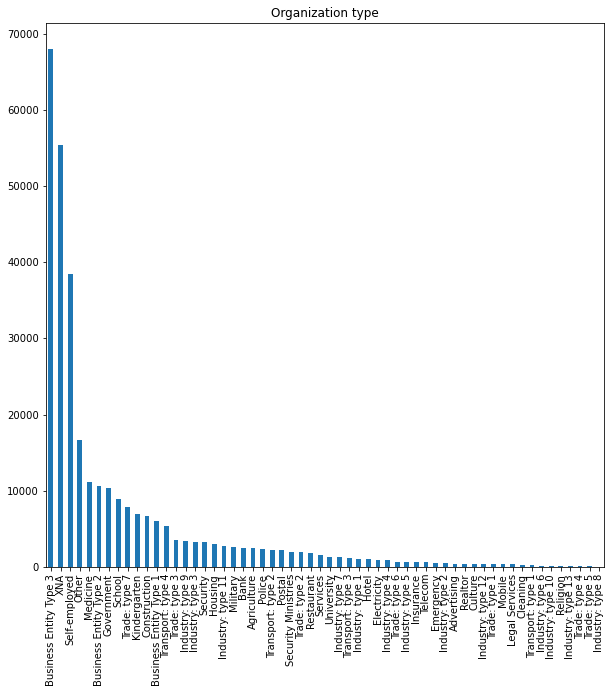

In [145]:
plt.figure(figsize=(10,10))
app['ORGANIZATION_TYPE'].value_counts().plot.bar()
plt.title('Organization type')
plt.show()

**We observe most clients have Business Entity Type 3 as ORGANIZATION_TYPE**

In [146]:
# Exploring XNA organization Type

In [147]:
app[app['ORGANIZATION_TYPE']=='XNA']['NAME_INCOME_TYPE'].value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

In [148]:
#checking occupation Type
app[app['ORGANIZATION_TYPE']=='XNA']['OCCUPATION_TYPE'].value_counts(dropna=False)



NaN               55372
Cleaning staff        2
Name: OCCUPATION_TYPE, dtype: int64

In [149]:
#Their Occuptation Type data was missing. It may be missing as these correspond to pensioners

#### We can observe that "XNA" represents the clients who are mostly pensioner or unemployed. As they are not currently working. Their Organization Type may be noted as XNA

##  Data Analysis

### Analysing the Target Variable

In [150]:
app['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

### Calculating the Data imbalance Ratio

In [151]:
x= app[app['TARGET']==0].count()[0]
y= app[app['TARGET']==1].count()[0]
Ratio = x/y
print("The Data Imbalance Ratio is ",round(Ratio,3))

The Data Imbalance Ratio is  11.387


There is a large imbalance between the proportion of client with payment difficulties (TARGET = 1) and others (TARGET = 0) in the dataset. The ratio of imbalance in the dataset is 11.4:1

### Segmenting the Dataframes based on the TARGET Variable

In [152]:
app_1=app[app["TARGET"]==1]
app_0=app[app["TARGET"]==0]

In [153]:
app_0.shape

(282686, 89)

In [154]:
app_1.shape

(24825, 89)

## Univariate analysis on segmented dataframes

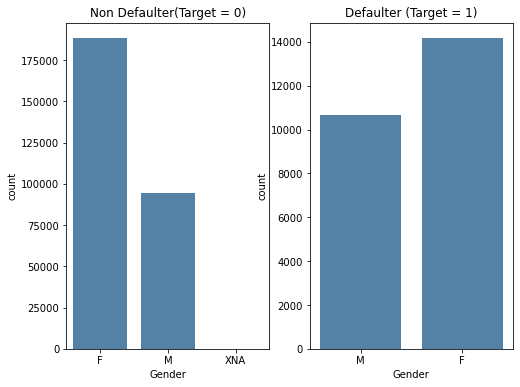

In [155]:
# Analyzing the CODE_GENDER Column for Target Value

plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.countplot(app_0["CODE_GENDER"], color='steelblue')
#plt.hist(app_0["CODE_GENDER"])
plt.title("Non Defaulter(Target = 0)")
plt.xlabel("Gender")
plt.subplot(1,2,2)
sns.countplot(app_1["CODE_GENDER"],color='steelblue')
plt.title("Defaulter (Target = 1)")
plt.xlabel("Gender")
plt.show()

In [156]:
cf0=app_0[app_0['CODE_GENDER']=='F'].count()[0]
cf1=app_1[app_1['CODE_GENDER']=='F'].count()[0]
cm0=app_0[app_0['CODE_GENDER']=='M'].count()[0]
cm1=app_1[app_1['CODE_GENDER']=='M'].count()[0]
print('Ratio of Women not defaulting payment(TARGET=0) as compared to men is ',round(cf0/cm0))
print('Ratio of Women defaulting payment(TARGET =1) as compared to men is ',round(cf1/cm1,2))

Ratio of Women not defaulting payment(TARGET=0) as compared to men is  2
Ratio of Women defaulting payment(TARGET =1) as compared to men is  1.33


We can observe that the number of female clients is more in both the cases.
Number of women not defaulting payment is double the number of males. We cannot conclude much from Gender

**Analyzing Age_Group for defaulters and non defaulters**

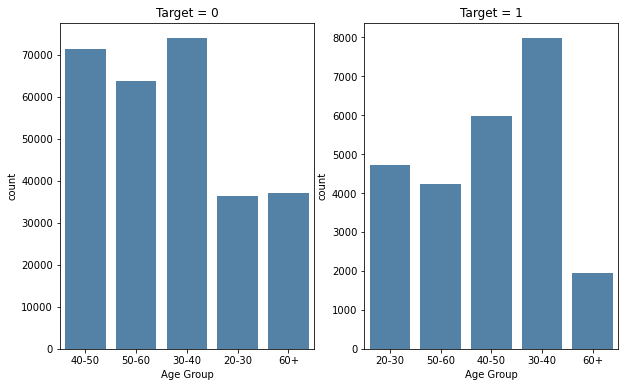

In [157]:
# Analyzing the Age_Group Column for Target Value

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(app_0["Age_Group"], color='steelblue')
plt.title("Target = 0")
plt.xlabel("Age Group")
plt.subplot(1,2,2)
sns.countplot(app_1["Age_Group"],color='steelblue')
plt.title("Target = 1")
plt.xlabel("Age Group")
plt.show()

- We can observe that clients in the Age Group of 30-40, are clients with payment difficulties.They are more likey to default their payments.
- Chances of senior citizens defaulting their payments is low as compared to others.


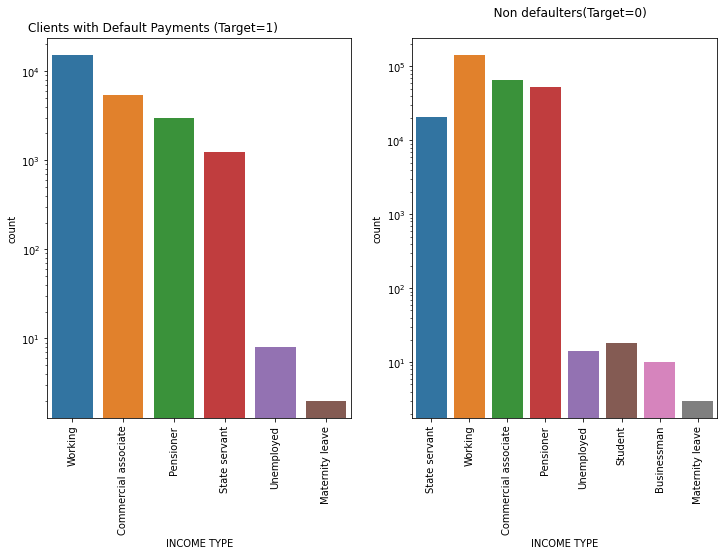

In [158]:

# Analyzing the INCOME TYPE in both Target Categories
#plt.rcParams['font.size'] = '10'
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.countplot(app_1["NAME_INCOME_TYPE"])
plt.yscale("log")
plt.title("Clients with Default Payments (Target=1)                        ")
plt.xlabel("INCOME TYPE")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(app_0["NAME_INCOME_TYPE"])
plt.title("   Non defaulters(Target=0)\n")
plt.xlabel("INCOME TYPE")
plt.xticks(rotation=90)
plt.yscale("log")
plt.show()

**Observations**
- Clients on Maternity leave default the least
- Maximum people from working class have applied for the loan
- The Working class has higher chances of defaulting payments


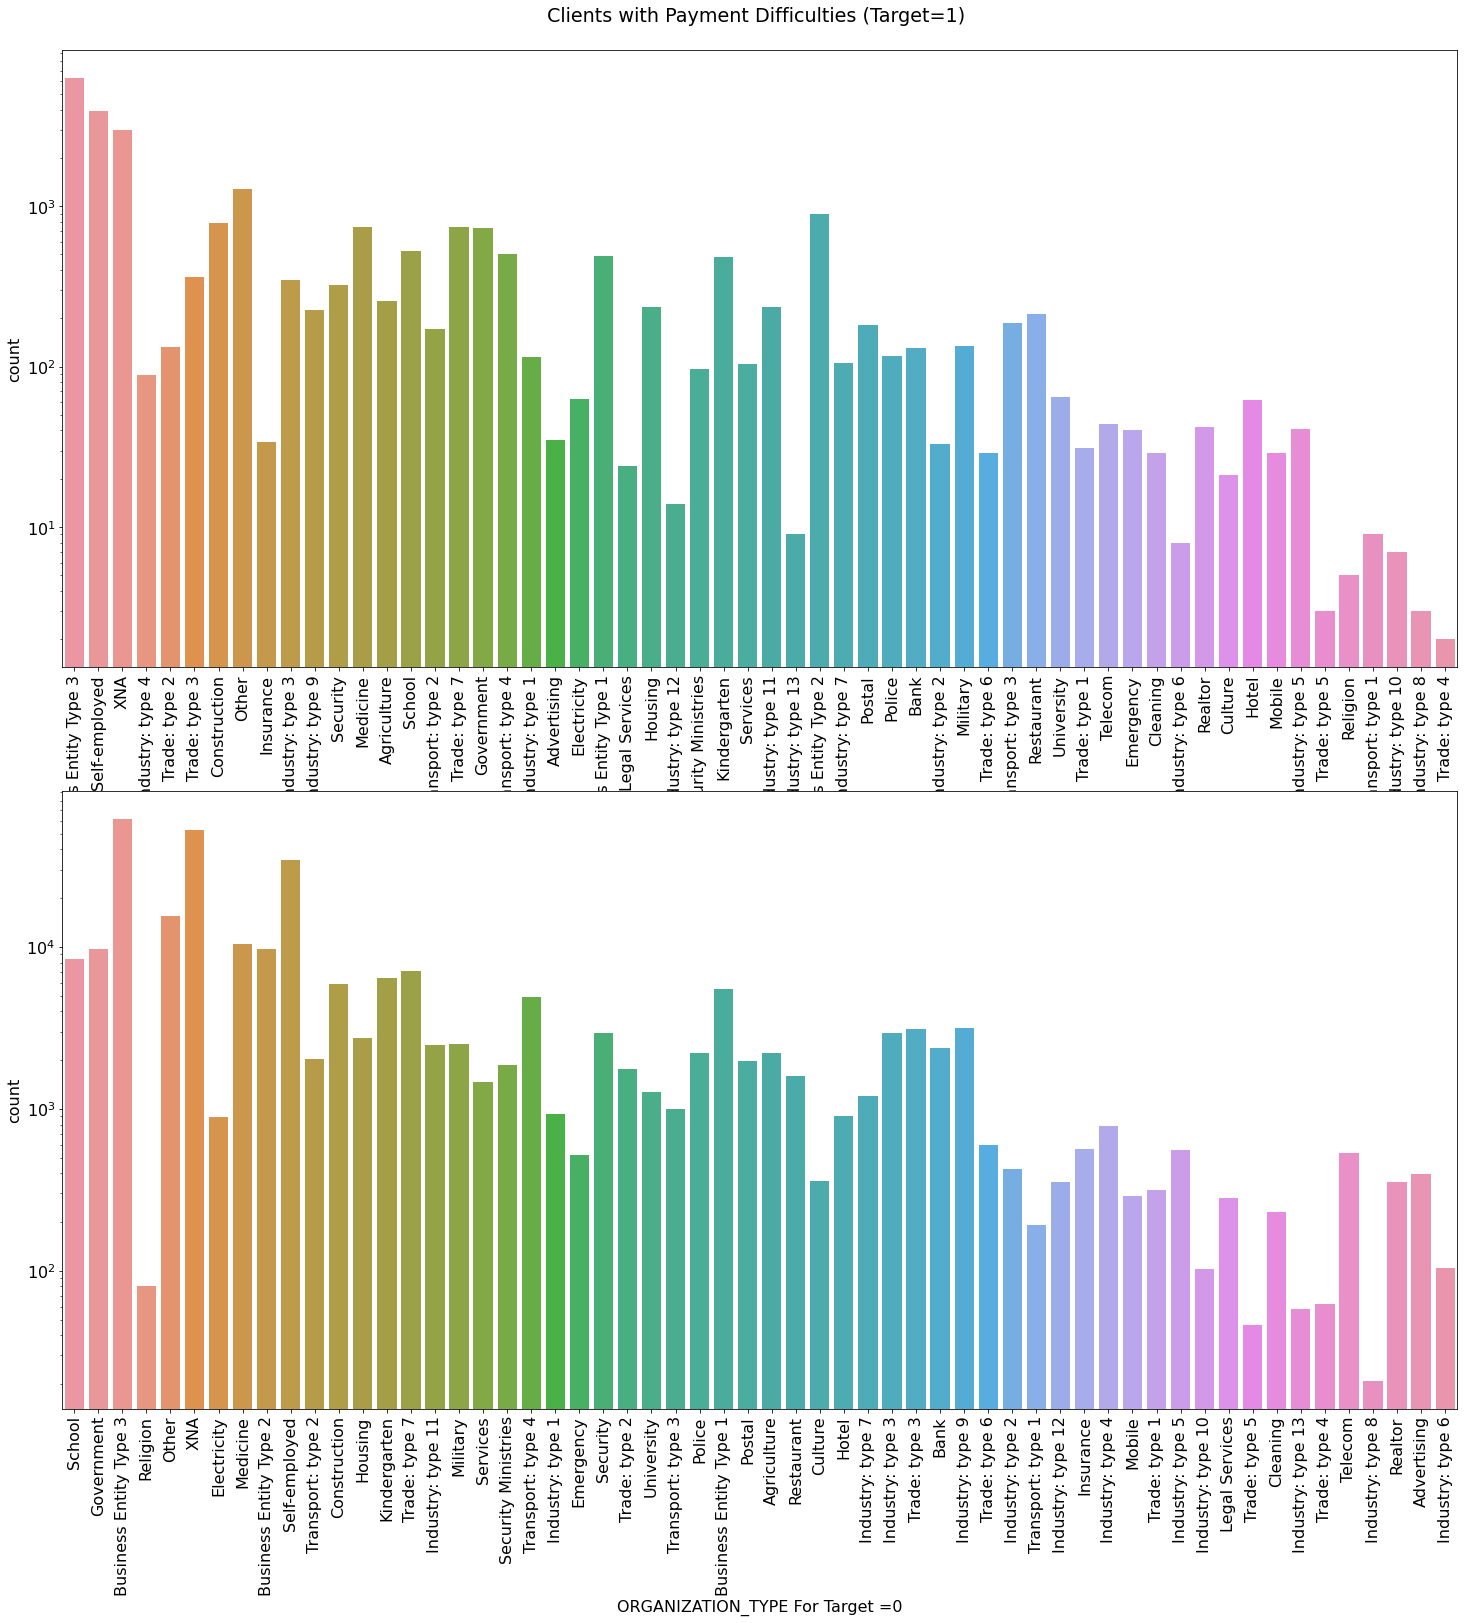

In [159]:
# Analyzing the ORAGNIZATION TYPE in both Target Categories
plt.rcParams['font.size'] = '16'
plt.figure(figsize=(25,25))
plt.subplot(2,1,1)
sns.countplot(app_1["ORGANIZATION_TYPE"])
plt.title("Clients with Payment Difficulties (Target=1) \n")
plt.xlabel("ORGANIZATION_TYPE of Target =1")
plt.xticks(rotation=90)
plt.yscale("log")
plt.subplot(2,1,2)
sns.countplot(app_0["ORGANIZATION_TYPE"])
print('\n\n\n')
plt.xlabel("ORGANIZATION_TYPE For Target =0")
plt.xticks(rotation=90)
plt.yscale("log")
plt.show()

**Observations**
- Clients from Trade Type 4 and 5 are less likey to default their payments
- Most Clients from Business Entity Type3 have applied for loans

In [160]:
plt.rcParams['font.size'] = '12'

**INCOME CATEGORY** 

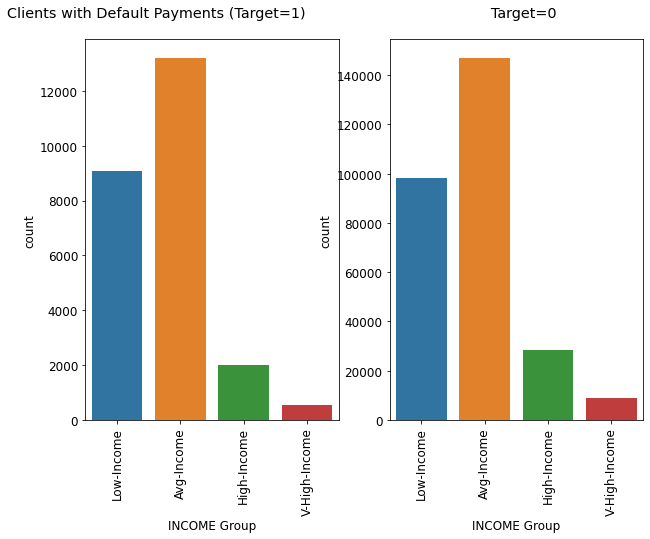

In [161]:
# Analyzing the INCOME Category in both Target Categories

plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.countplot(app_1["Income_Group"])
plt.title("Clients with Default Payments (Target=1)                        \n")
plt.xlabel("INCOME Group")
plt.xticks(rotation=90)
#plt.yscale("log")
plt.subplot(1,2,2)
sns.countplot(app_0["Income_Group"])
plt.title("   Target=0\n")
plt.xlabel("INCOME Group")
plt.xticks(rotation=90)
#plt.yscale("log")
plt.show()

**observations**
- Clients in the average Income group are more likey to default
- Clients in Very High Income group default less


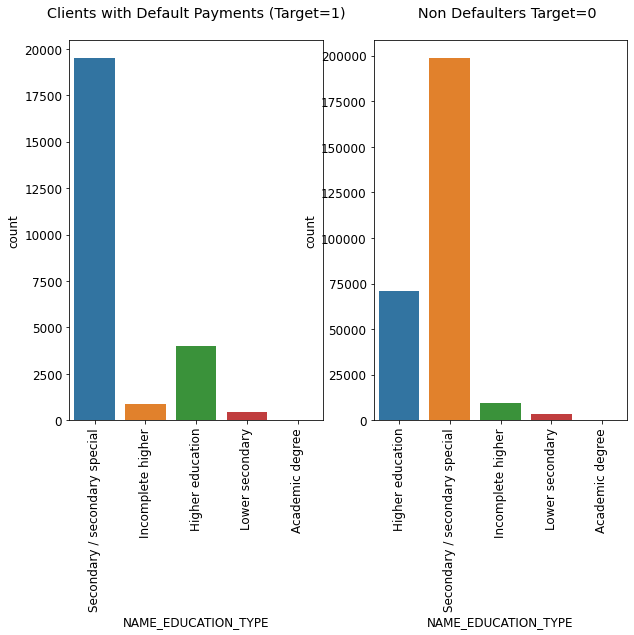

In [162]:

# Analyzing the Education Type in both Target Categories

plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.countplot(app_1["NAME_EDUCATION_TYPE"])
plt.title("Clients with Default Payments (Target=1)\n")
plt.xlabel("NAME_EDUCATION_TYPE")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(app_0["NAME_EDUCATION_TYPE"])
plt.title("   Non Defaulters Target=0\n")
plt.xlabel("NAME_EDUCATION_TYPE")
plt.xticks(rotation=90)
plt.show()

**Observations**
- Applicants with secondary and higher secondary education have high default payments.
- Clients with academic degrees are the smallest group of applicants that have applied for the loan and they are less likely to default payment.


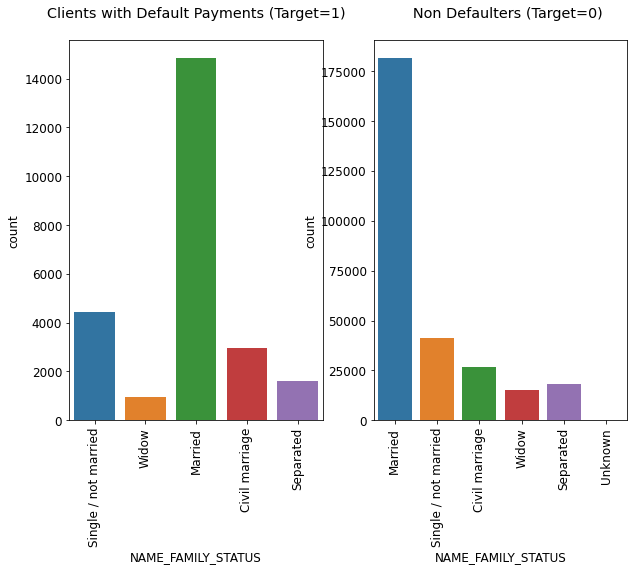

In [163]:
# Analyzing the NAME_FAMILY_STATUS in both Target Categories

plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.countplot(app_1["NAME_FAMILY_STATUS"])
plt.title("Clients with Default Payments (Target=1)\n")
plt.xlabel("NAME_FAMILY_STATUS")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(app_0["NAME_FAMILY_STATUS"])
plt.title("   Non Defaulters (Target=0)\n")
plt.xlabel("NAME_FAMILY_STATUS")
plt.xticks(rotation=90)
plt.show()

**Observations**
- Mostly married clients have applied for loans
- Married clients are more likely to have default payments
- Clients having Family Status as Widow have fewer default payments 

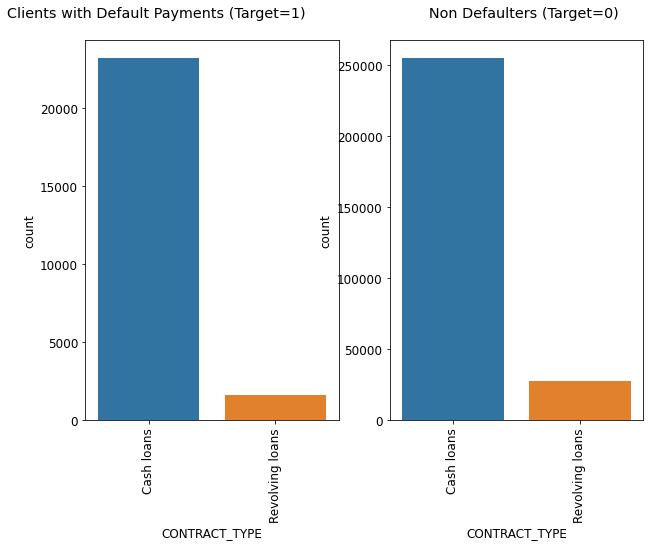

In [164]:
# Analyzing the NAME_CONTRACT_TYPE in both Target Categories

plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.countplot(app_1["NAME_CONTRACT_TYPE"])
plt.title("Clients with Default Payments (Target=1)                        \n")
plt.xlabel("CONTRACT_TYPE")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(app_0["NAME_CONTRACT_TYPE"])
plt.title("   Non Defaulters (Target=0)\n")
plt.xlabel("CONTRACT_TYPE")
plt.xticks(rotation=90)
plt.show()

**Observations**
- Clients applying for Cash Loans have more default payments
- Few people opt for Revolving Loans

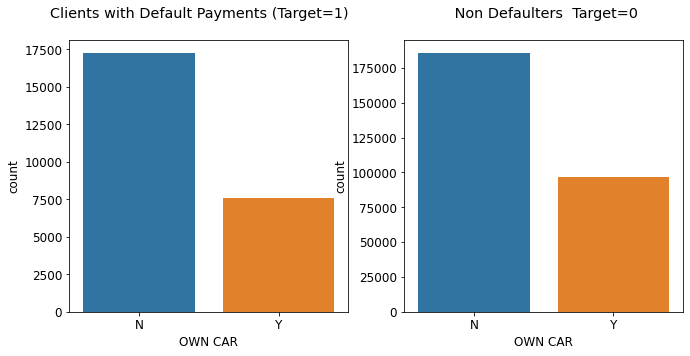

In [165]:

# Analyzing the FLAG_OWN_CAR column in both Target Categories

plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.countplot(app_1["FLAG_OWN_CAR"])
plt.title("Clients with Default Payments (Target=1)    \n")
plt.xlabel("OWN CAR")
plt.subplot(1,2,2)
sns.countplot(app_0["FLAG_OWN_CAR"])
plt.title(" Non Defaulters  Target=0\n")
plt.xlabel("OWN CAR")
plt.show()

**Observations**
- Majority of the clients who have applied for loan do not own a Car
- People not owning a Car have similar pattern in defaulting and non defaulting categories

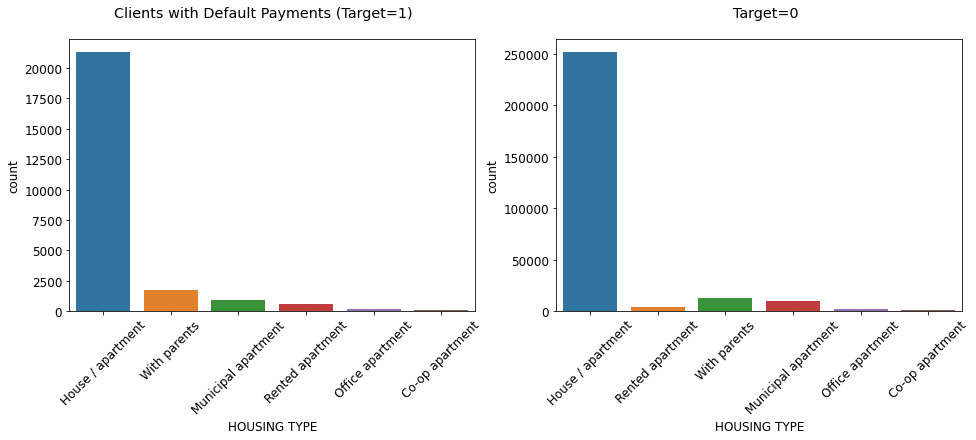

In [166]:

# Analyzing the NAME_HOUSING_TYPE column (to see if clients own a house or apartment)in both Target Categories

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.countplot(app_1["NAME_HOUSING_TYPE"])
plt.xticks(rotation=45)
plt.title("Clients with Default Payments (Target=1)    \n")
plt.xlabel("HOUSING TYPE")
plt.subplot(1,2,2)
sns.countplot(app_0["NAME_HOUSING_TYPE"])
plt.title("   Target=0\n")
plt.xlabel("HOUSING TYPE")
plt.xticks(rotation=45)
plt.show()

**Observations**
- Most of the clients have House/Apartment as Housing Type 
- People living in Co-op appartment and office apartment, are less likely default as compared to others
- Clients having House/Apartment show a similar behavior in both categories


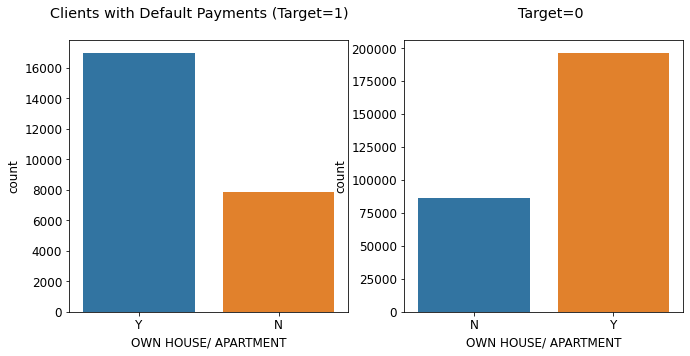

In [167]:

# Analyzing the FLAG_OWN_REALTY column (to see if clients own a house or apartment)in both Target Categories

plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.countplot(app_1["FLAG_OWN_REALTY"])
plt.title("Clients with Default Payments (Target=1)    \n")
plt.xlabel("OWN HOUSE/ APARTMENT")
plt.subplot(1,2,2)
sns.countplot(app_0["FLAG_OWN_REALTY"])
plt.title("   Target=0\n")
plt.xlabel("OWN HOUSE/ APARTMENT")
plt.show()

**Obervations**
- Clients noy having Own house/apartment comparatively default less 

### Exploring the column CNT_CHILDREN


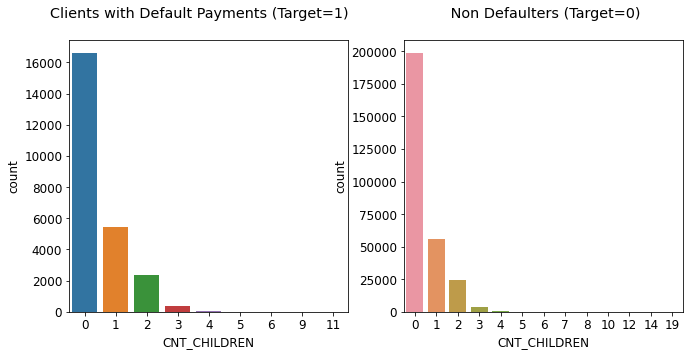

In [168]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.countplot(app_1["CNT_CHILDREN"])
plt.title("Clients with Default Payments (Target=1)    \n")
plt.xlabel("CNT_CHILDREN")
plt.subplot(1,2,2)
sns.countplot(app_0["CNT_CHILDREN"])
plt.title(" Non Defaulters (Target=0)\n")
plt.xlabel("CNT_CHILDREN")
plt.show()

**Observations**
-  People with more children default compartively less

#### Analyzing CNT_FAM_MEMBERS for both categories

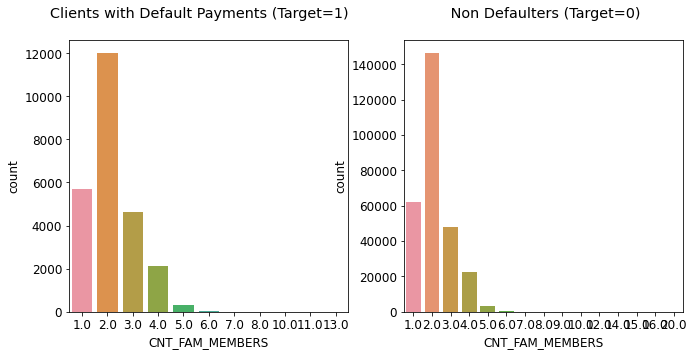

In [169]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.countplot(app_1["CNT_FAM_MEMBERS"])
plt.title("Clients with Default Payments (Target=1)    \n")
plt.xlabel("CNT_FAM_MEMBERS")
plt.subplot(1,2,2)
sns.countplot(app_0["CNT_FAM_MEMBERS"])
plt.title(" Non Defaulters (Target=0)\n")
plt.xlabel("CNT_FAM_MEMBERS")
plt.show()

## Bivariate Analysis

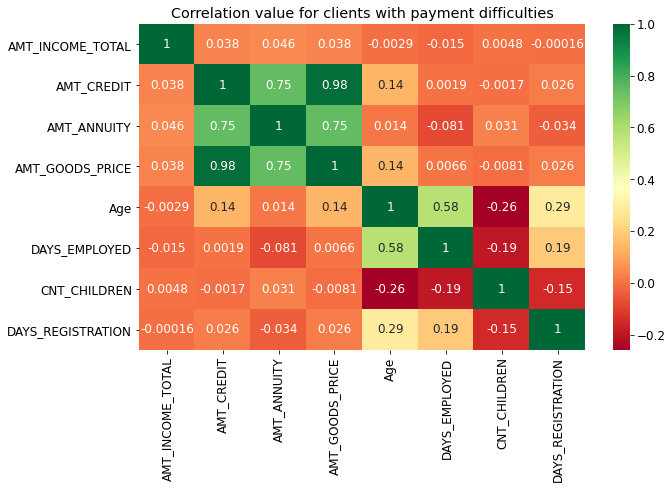

In [170]:
#  heatmap where TARGET = 1(clients with payment difficulties)
col = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'Age', 'DAYS_EMPLOYED','CNT_CHILDREN','DAYS_REGISTRATION']
cor = app_1[col].corr()
plt.figure(figsize = (10,6))
sns.heatmap(cor, annot = True,cmap='RdYlGn')
plt.title('Correlation value for clients with payment difficulties')
plt.show()

In clients with payment difficulties
- We observe high correlation among AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE.
- Huge loans are granted against high priced goods and loan annuity
- Moderate correlation between AMT_INCOME_TOTAL and AMT_ANNUITY.


#### Reviewing correlation between few columns for further analysis

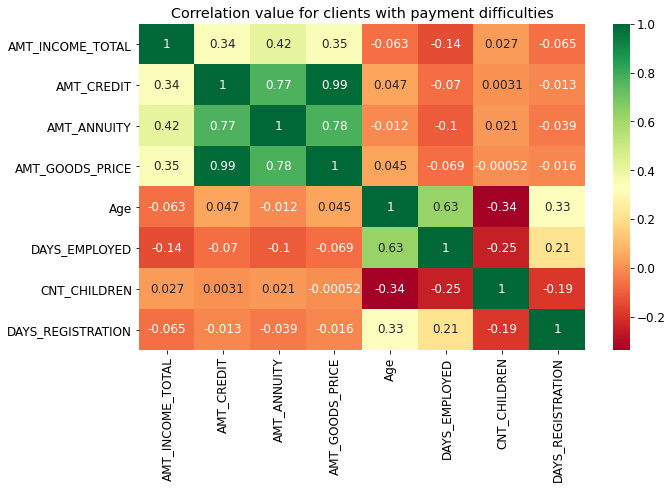

In [171]:
# plotting heatmap where TARGET = 0 (clients with no defaults)
col = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'Age', 'DAYS_EMPLOYED','CNT_CHILDREN','DAYS_REGISTRATION']
cor = app_0[col].corr()
plt.figure(figsize = (10,6))
sns.heatmap(cor, annot = True,cmap='RdYlGn')
plt.title('Correlation value for clients with payment difficulties')
plt.show()

### Analyze Occupation Type vs Total Income for both target values

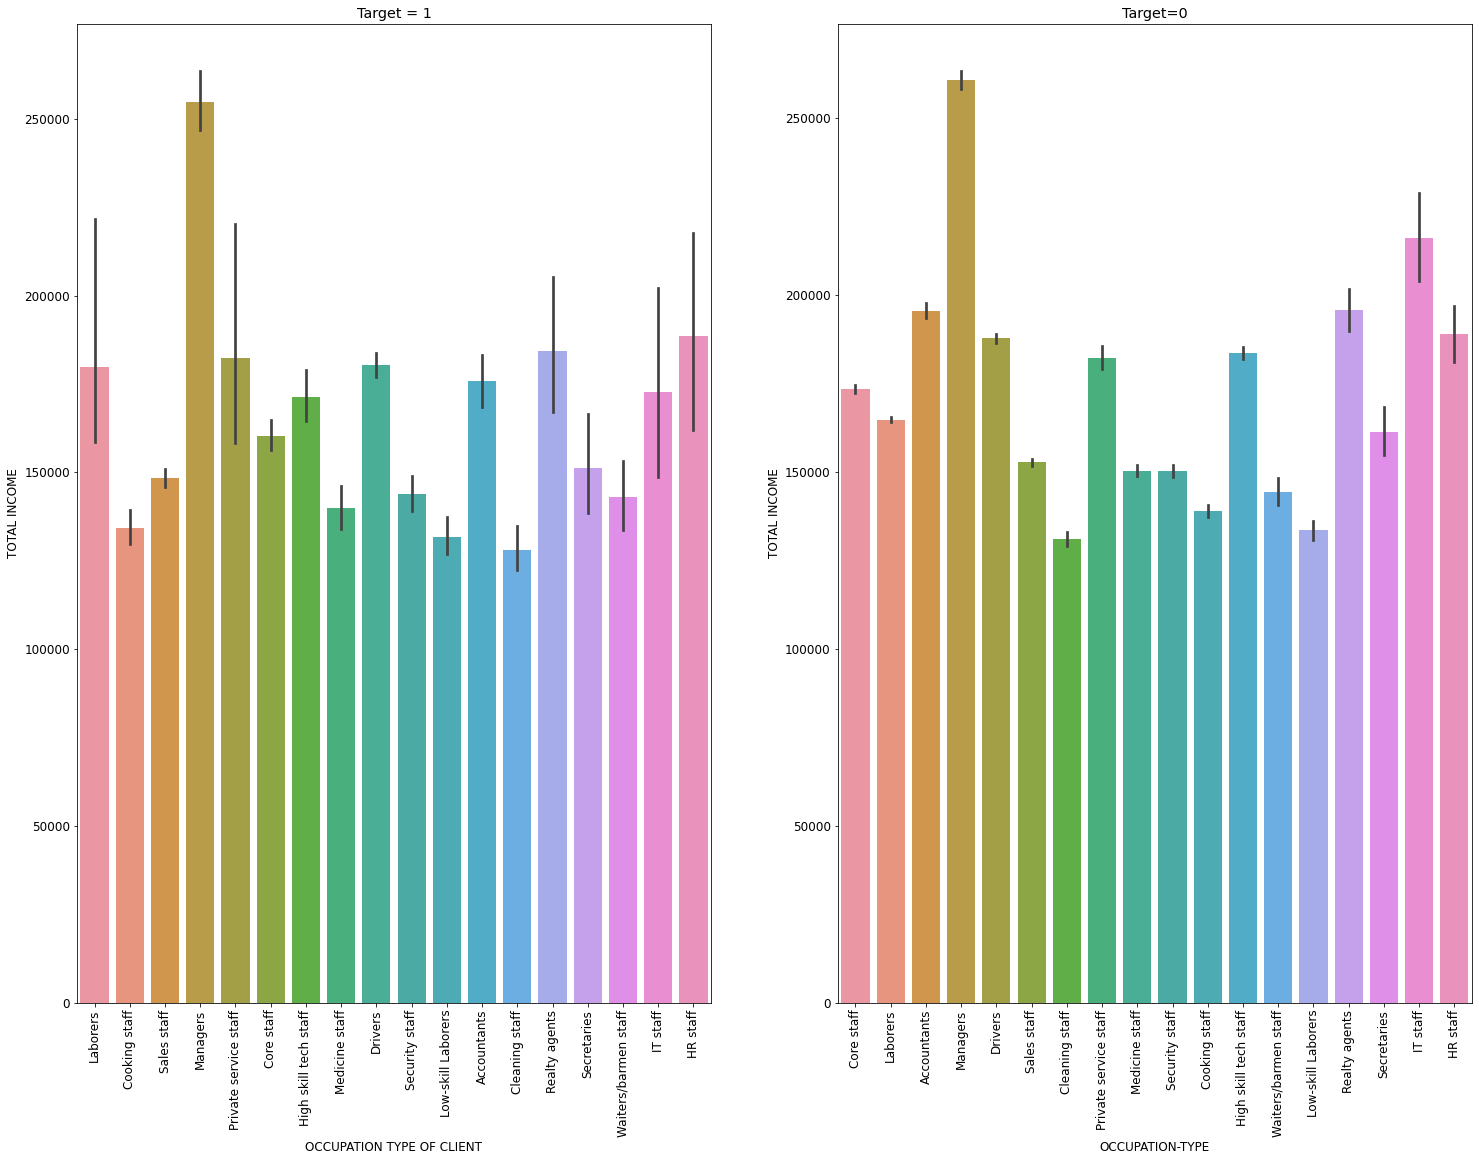

In [172]:
# Analyzing Occupation Type and Total Income together for both target values
plt.figure(figsize=(25,18))
plt.subplot(1,2,1)
sns.barplot(data=app_1,x="OCCUPATION_TYPE",y="AMT_INCOME_TOTAL")
plt.title("Target = 1")
plt.xlabel("OCCUPATION TYPE OF CLIENT")
plt.xticks(rotation=90)
plt.ylabel("TOTAL INCOME")


plt.subplot(1,2,2)
sns.barplot(data=app_0,x="OCCUPATION_TYPE",y="AMT_INCOME_TOTAL")
plt.title("Target=0")
plt.xlabel("OCCUPATION-TYPE")
plt.ylabel("TOTAL INCOME")
plt.xticks(rotation=90)

plt.show()

**Observations**
- Low skill laborers & laborers relatively high in defaulting
- IT staff comparatively low in defaulting!

- Accountants comparatively default less as compared to others
- Cooking staff, security staff also default less after Accountant
- For both categories of clients applying for loan Managers receive the highest salary 
- For cleaning staff applying for loan cleaning staff receive the lowest salary

#### Occupation Type and AMT_CREDIT

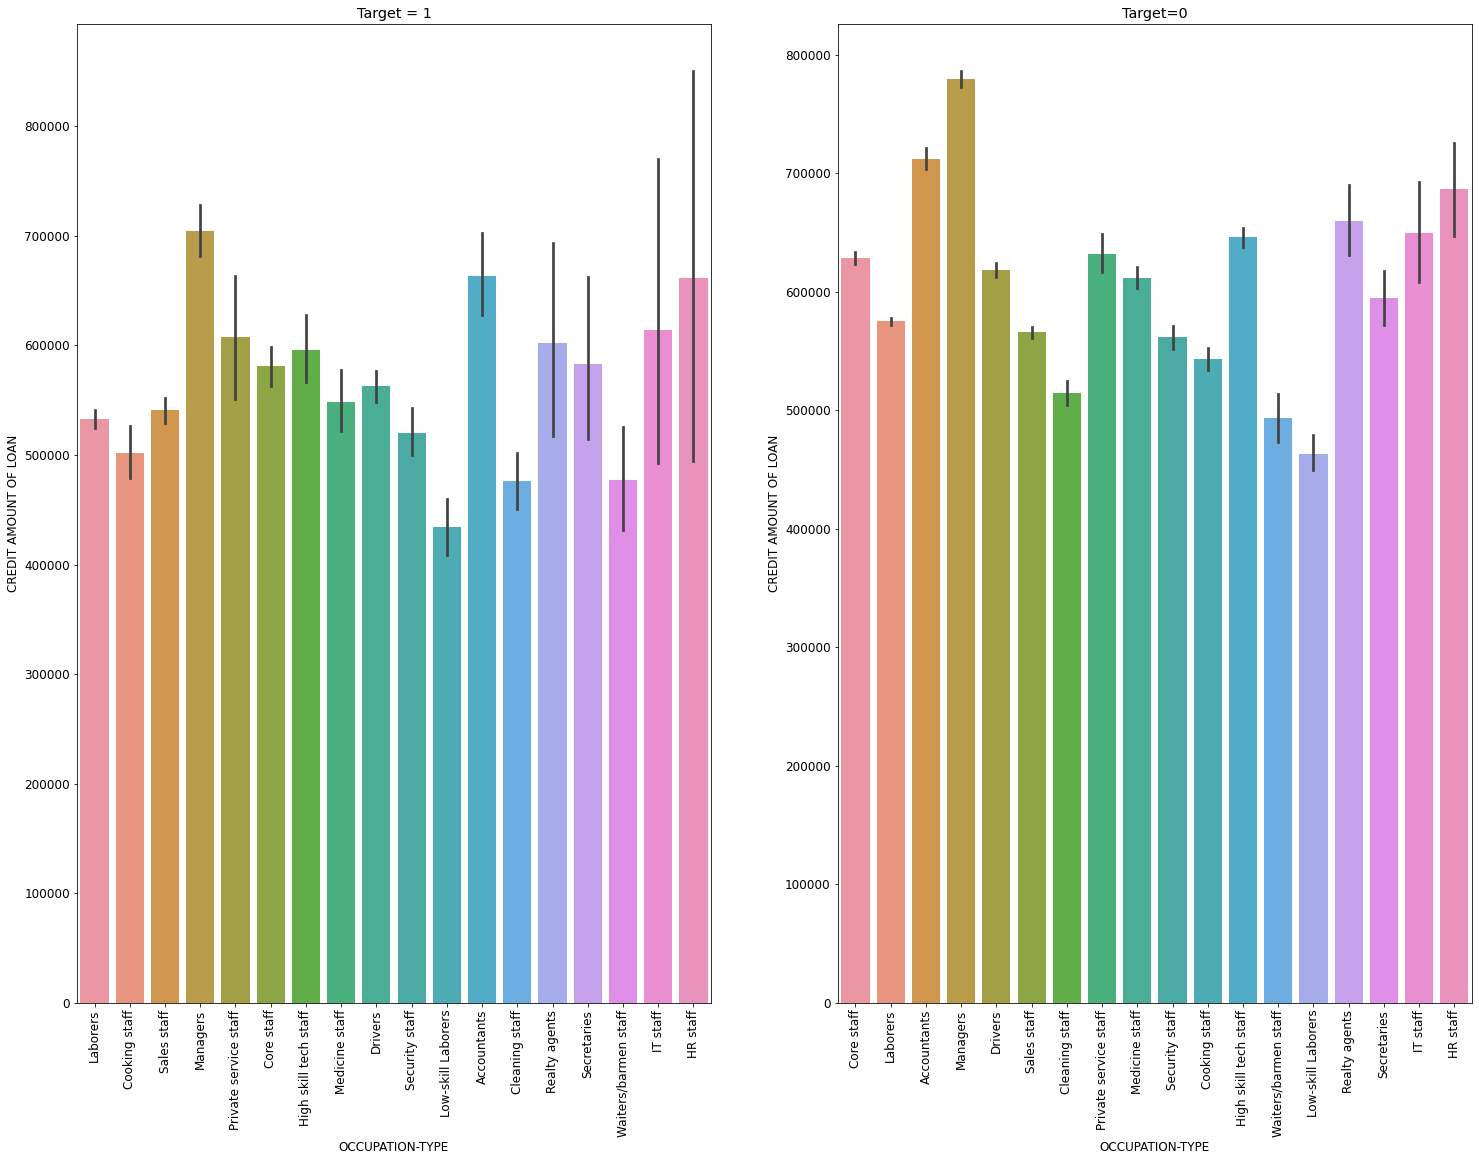

In [173]:
# Analyzing Occupation Type and AMT_CREDIT together for both target values
plt.figure(figsize=(25,18))
plt.rcParams.update({'font.size': 12})
plt.subplot(1,2,1)
sns.barplot(data=app_1,x="OCCUPATION_TYPE",y="AMT_CREDIT")
plt.title("Target = 1")
plt.xlabel("OCCUPATION-TYPE")
plt.xticks(rotation=90)
plt.ylabel("CREDIT AMOUNT OF LOAN")


plt.subplot(1,2,2)
sns.barplot(data=app_0,x="OCCUPATION_TYPE",y="AMT_CREDIT")
plt.title("Target=0")
plt.xlabel("OCCUPATION-TYPE")
plt.ylabel("CREDIT AMOUNT OF LOAN")
plt.xticks(rotation=90)

plt.show()

**Observations**
- Managers and HR Staff applt for high loan amount

- Low income staff opt for loans of lower amounts


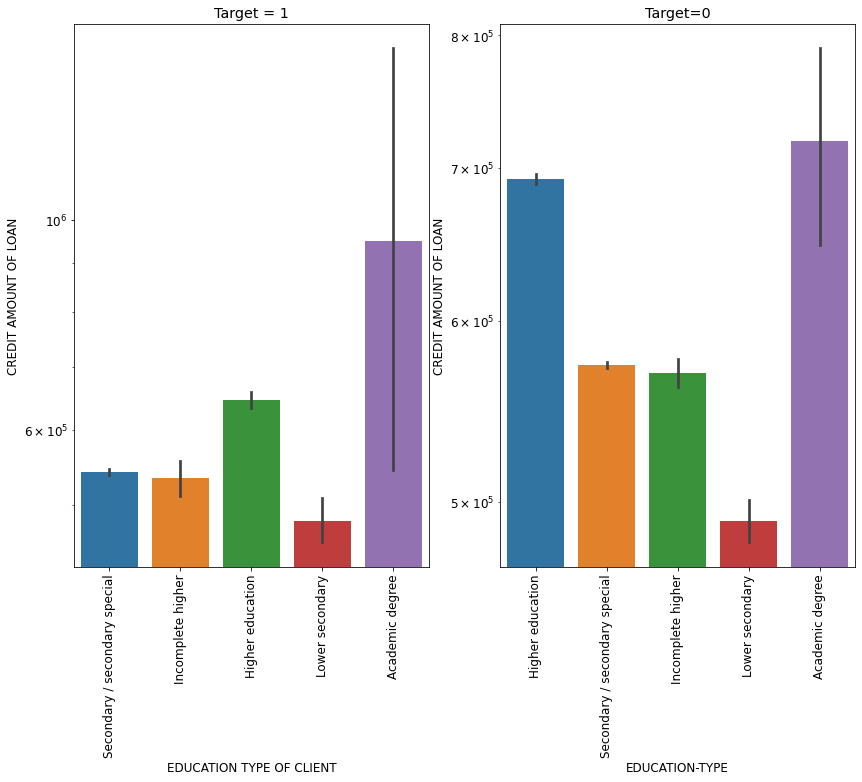

In [174]:
# Analyzing Education Type and AMT_CREDIT together for both target values
plt.figure(figsize=(14,10))
plt.subplot(1,2,1)
sns.barplot(data=app_1,x="NAME_EDUCATION_TYPE",y="AMT_CREDIT")
plt.yscale('log')
plt.title("Target = 1")
plt.xlabel("EDUCATION TYPE OF CLIENT")
plt.xticks(rotation=90)
plt.ylabel("CREDIT AMOUNT OF LOAN")


plt.subplot(1,2,2)
sns.barplot(data=app_0,x="NAME_EDUCATION_TYPE",y="AMT_CREDIT")
plt.yscale('log')
plt.title("Target=0")
plt.xlabel("EDUCATION-TYPE")
plt.ylabel("CREDIT AMOUNT OF LOAN")
plt.xticks(rotation=90)

plt.show()

**Observations**
- clients with Academic Degrees opt for High Loan Amount
- clients with lower secondary apply for low income


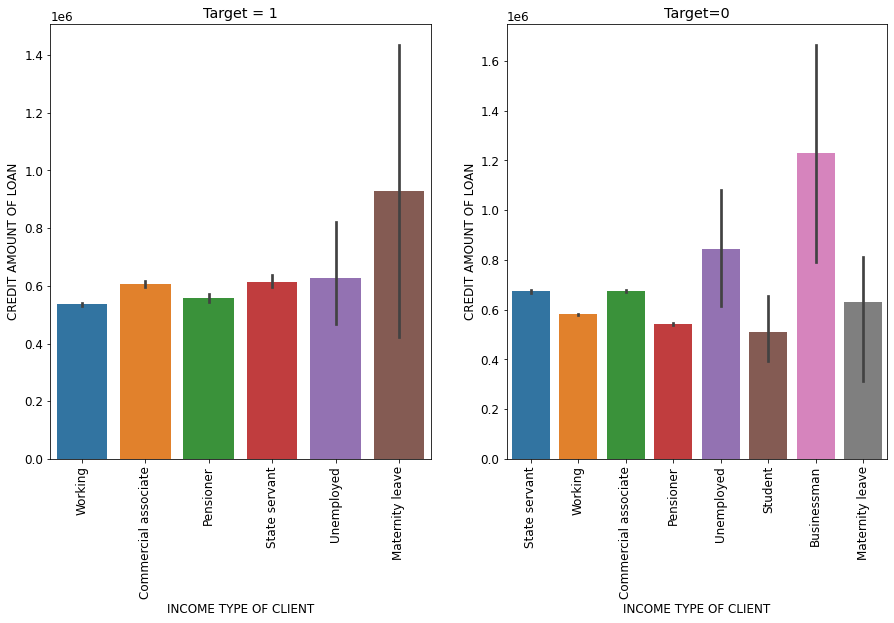

In [175]:

# Analyzing NAME_INCOME_TYPE and AMT_CREDIT together for both target values
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.barplot(data=app_1,x="NAME_INCOME_TYPE",y="AMT_CREDIT")
plt.title("Target = 1")
plt.xlabel("INCOME TYPE OF CLIENT")
plt.xticks(rotation=90)
plt.ylabel("CREDIT AMOUNT OF LOAN")


plt.subplot(1,2,2)
sns.barplot(data=app_0,x="NAME_INCOME_TYPE",y="AMT_CREDIT")
plt.title("Target=0")
plt.xlabel("INCOME TYPE OF CLIENT")
plt.ylabel("CREDIT AMOUNT OF LOAN")
plt.xticks(rotation=90)

plt.show()

- Businessman & Student categories doesn’t appear in defaulter data.
- Credit amount among defaulters are similar except those under maternity leave.

#### Analyze NAME_INCOME_TYPE and AMT_CREDIT for both target values

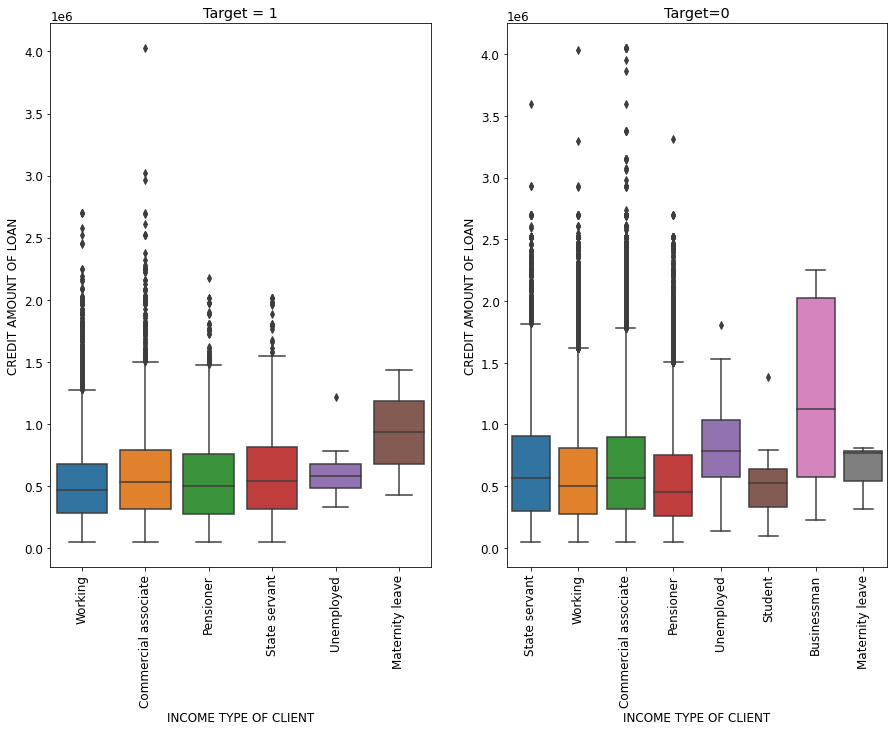

In [176]:

# Analyzing NAME_INCOME_TYPE and AMT_CREDIT together for both target values
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(data=app_1,x="NAME_INCOME_TYPE",y="AMT_CREDIT")
plt.title("Target = 1")
plt.xlabel("INCOME TYPE OF CLIENT")
plt.xticks(rotation=90)
plt.ylabel("CREDIT AMOUNT OF LOAN")


plt.subplot(1,2,2)
sns.boxplot(data=app_0,x="NAME_INCOME_TYPE",y="AMT_CREDIT")
plt.title("Target=0")
plt.xlabel("INCOME TYPE OF CLIENT")
plt.ylabel("CREDIT AMOUNT OF LOAN")
plt.xticks(rotation=90)

plt.show()

**Observations**
- Maternity leave applications in default target are with higher credit amount than others.
- Among clients with payments difficulties the Working Income Group apply for smaller loan amounts.
- Businessman credit data has no outliers

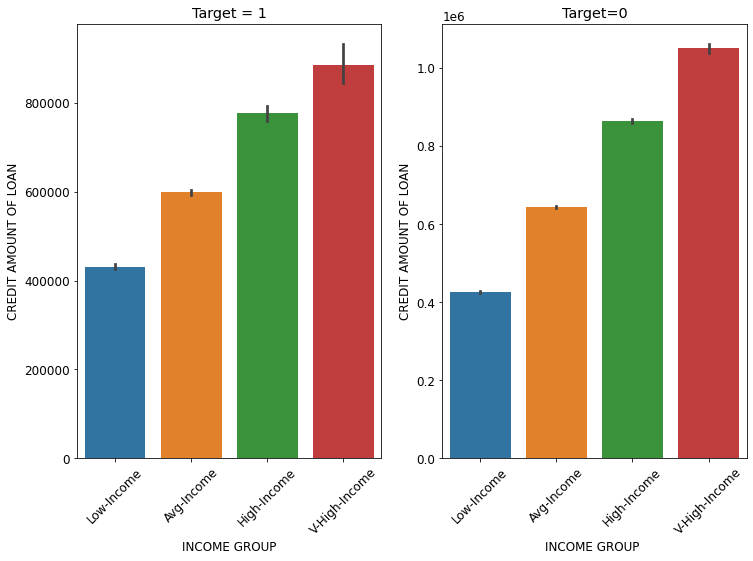

In [177]:

# Analyzing INCOME GROUP and AMT_CREDIT together for both target values
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.barplot(data=app_1,x="Income_Group",y="AMT_CREDIT")
plt.title("Target = 1")
plt.xlabel("INCOME GROUP")
plt.xticks(rotation=45)
plt.ylabel("CREDIT AMOUNT OF LOAN")


plt.subplot(1,2,2)
sns.barplot(data=app_0,x="Income_Group",y="AMT_CREDIT")
plt.title("Target=0")
plt.xlabel("INCOME GROUP ")
plt.ylabel("CREDIT AMOUNT OF LOAN")
plt.xticks(rotation=45)

plt.show()

**Observations**
- We can confirm that very high income groups apply for high loan amount among both categories of clients
- Earlier we had indentified as Managers receiving the highest salaries


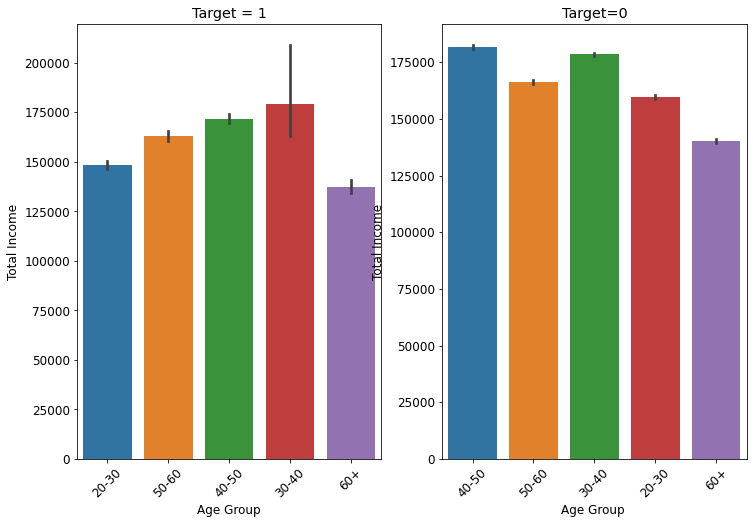

In [178]:
# Analyzing AGE GROUP and AMT_INCOME_TOTAL together for both target values
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.barplot(data=app_1,x="Age_Group",y="AMT_INCOME_TOTAL")
plt.title("Target = 1")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.ylabel("Total Income")


plt.subplot(1,2,2)
sns.barplot(data=app_0,x="Age_Group",y="AMT_INCOME_TOTAL")
plt.title("Target=0")
plt.xlabel("Age Group ")
plt.ylabel("Total Income")
plt.xticks(rotation=45)
plt.show()

- Clients in the age of 40-50 have high total Income
- Clients in the age group of 60+ have low Incomes

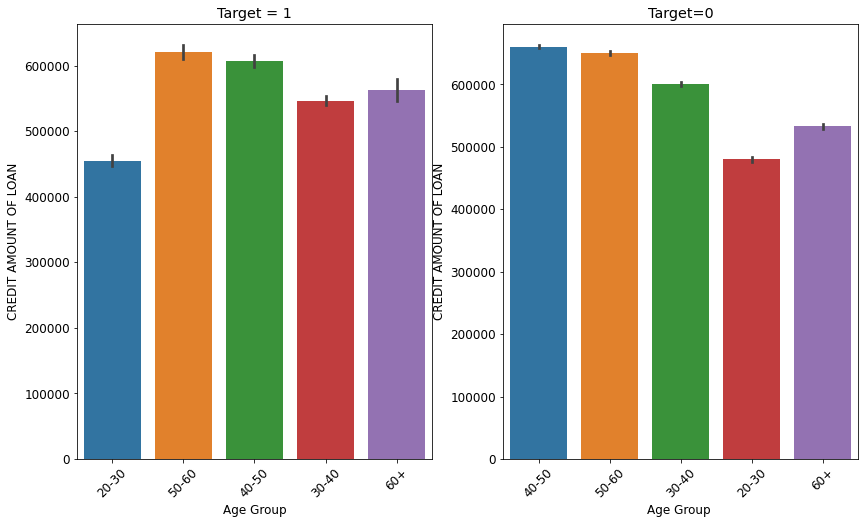

In [179]:
# Analyzing AGE GROUP and AMT_CREDIT together for both target values
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
sns.barplot(data=app_1,x="Age_Group",y="AMT_CREDIT")
plt.title("Target = 1")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.ylabel("CREDIT AMOUNT OF LOAN")


plt.subplot(1,2,2)
sns.barplot(data=app_0,x="Age_Group",y="AMT_CREDIT")
plt.title("Target=0")
plt.xlabel("Age Group ")
plt.ylabel("CREDIT AMOUNT OF LOAN")
plt.xticks(rotation=45)

plt.show()

**Observations**
- Among the clients in both categories(Target=0 and Target=1).We find that customers in the age group of 40-60, who  apply for huge loan amounts
- We have also identified clients in the age group of 40-50 generally having high income. 
- Clients in the age group of 20-30 seek lower loan amounts among both target categories. 

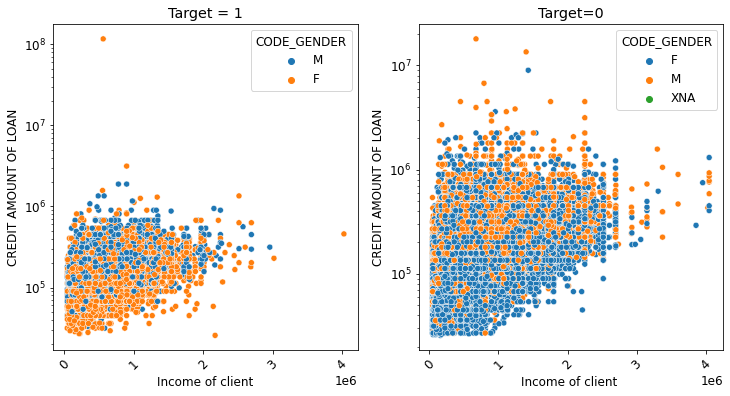

In [180]:
# Analyzing AMT_INCOME_TOTAL and AMT_CREDIT together for both target values
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(data=app_1,x="AMT_CREDIT",y= "AMT_INCOME_TOTAL",hue="CODE_GENDER")
plt.title("Target = 1")
plt.yscale('log')
plt.xlabel("Income of client")
plt.xticks(rotation=45)
plt.ylabel("CREDIT AMOUNT OF LOAN")


plt.subplot(1,2,2)
sns.scatterplot(data=app_0,x="AMT_CREDIT",y= "AMT_INCOME_TOTAL", hue="CODE_GENDER")
plt.yscale('log')
plt.title("Target=0")
plt.xlabel("Income of client ")
plt.ylabel("CREDIT AMOUNT OF LOAN")
plt.xticks(rotation=45)

plt.show()

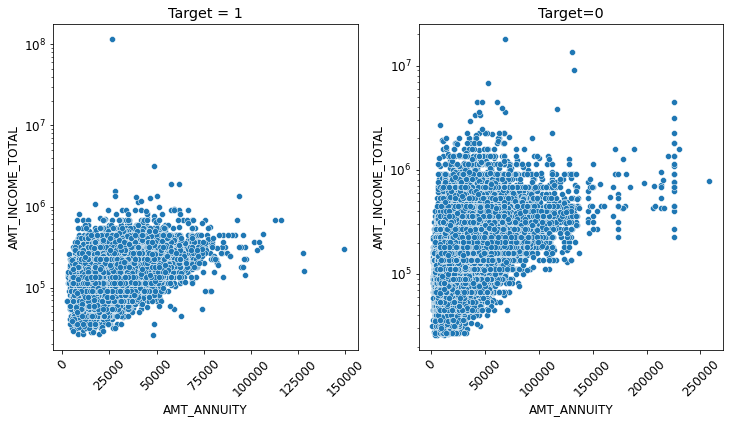

In [181]:
# Analyzing AMT_ANNUITY vs AMT_INCOME_TOTAL together for both target values
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(data=app_1,x="AMT_ANNUITY",y= "AMT_INCOME_TOTAL")
plt.title("Target = 1")
plt.yscale('log')
plt.xlabel("AMT_ANNUITY")
plt.xticks(rotation=45)
plt.ylabel("AMT_INCOME_TOTAL")


plt.subplot(1,2,2)
sns.scatterplot(data=app_0,x="AMT_ANNUITY",y= "AMT_INCOME_TOTAL")
plt.yscale('log')
plt.title("Target=0")
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_INCOME_TOTAL")
plt.xticks(rotation=45)
plt.show()

**Observations**
- As income of the client increases, the annuity amount increases
- Clients with payment difficulty has Annuity amount in the range 10000-80000


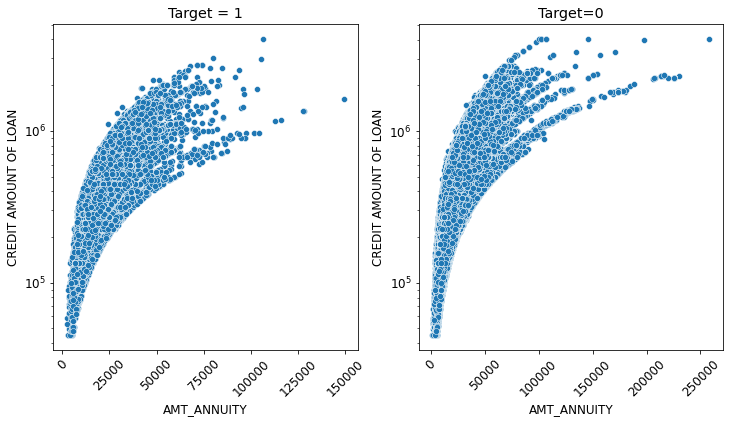

In [182]:
# Analyzing AMT_ANNUITY vs AMT_CREDIT together for both target values
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(data=app_1,y="AMT_CREDIT",x= "AMT_ANNUITY")
plt.title("Target = 1")
plt.yscale('log')
plt.xlabel("AMT_ANNUITY")
plt.xticks(rotation=45)
plt.ylabel("CREDIT AMOUNT OF LOAN")


plt.subplot(1,2,2)
sns.scatterplot(data=app_0,y="AMT_CREDIT",x= "AMT_ANNUITY")
plt.yscale('log')
plt.title("Target=0")
plt.xlabel("AMT_ANNUITY")
plt.ylabel("CREDIT AMOUNT OF LOAN")
plt.xticks(rotation=45)

plt.show()

- Above 0.2 million credit amount the annuity varies significantly
- Higher annuity for lower credit seen among defaulters!

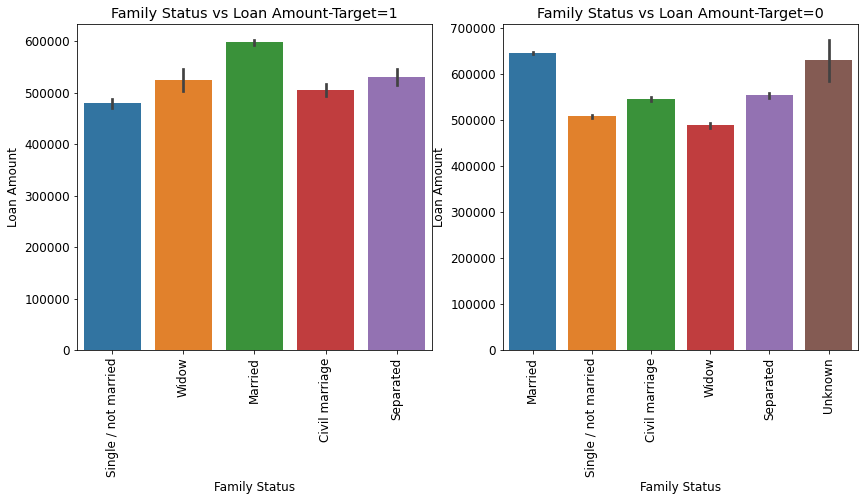

In [183]:
#Family Status vs Loan Amount
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(x=app_1["NAME_FAMILY_STATUS"],y=app_1["AMT_CREDIT"])
plt.title("Family Status vs Loan Amount-Target=1")
plt.xlabel("Family Status")
plt.xticks(rotation=90)
plt.ylabel("Loan Amount")
plt.subplot(1,2,2)
sns.barplot(x=app_0["NAME_FAMILY_STATUS"],y=app_0["AMT_CREDIT"])
plt.title("Family Status vs Loan Amount-Target=0")
plt.xlabel("Family Status")
plt.xticks(rotation=90)
plt.ylabel("Loan Amount")
plt.show()

**Observations**
- Married client apply for huge loan amounts
- Single people have lowest loan amount in Defaulters Group whereas Widowed have lowest loan amount in Non-defaulter group.

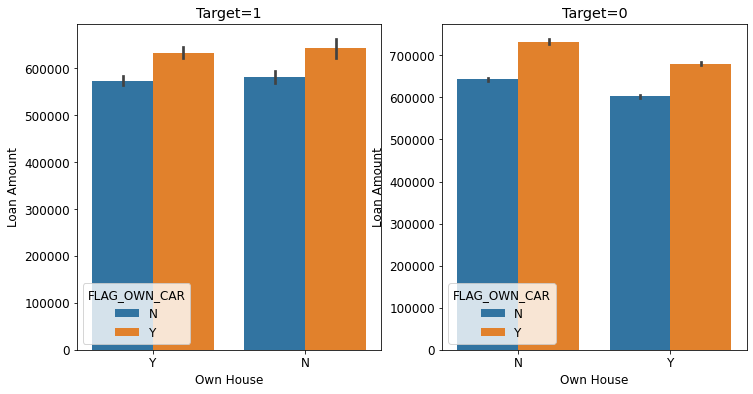

In [184]:
#Family Status vs Loan Amount
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
married_1=app_1[app_1["NAME_FAMILY_STATUS"]=="Married"]
sns.barplot(data= married_1,x="FLAG_OWN_REALTY",y="AMT_CREDIT",hue='FLAG_OWN_CAR')
plt.title("Target=1")
plt.xlabel("Own House")

plt.ylabel("Loan Amount")
plt.subplot(1,2,2)
married_0=app_0[app_0["NAME_FAMILY_STATUS"]=="Married"]
sns.barplot(data= married_0,x="FLAG_OWN_REALTY",y="AMT_CREDIT",hue='FLAG_OWN_CAR')
plt.title("Target=0")
plt.xlabel("Own House")
plt.ylabel("Loan Amount")
plt.show()

**Observations**
- House and car owners show no signficant difference in credit buying

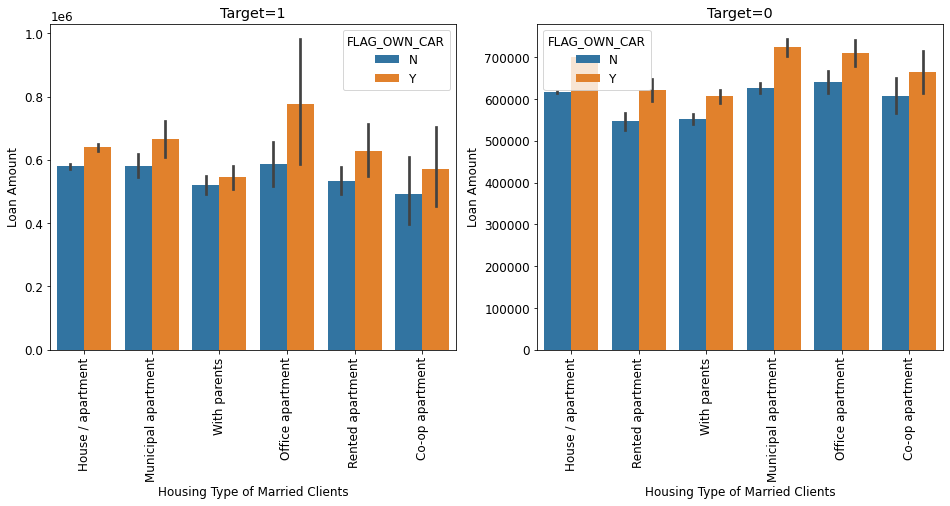

In [185]:
#Family Status vs Loan Amount
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
married_1=app_1[app_1["NAME_FAMILY_STATUS"]=="Married"]
sns.barplot(data= married_1,x="NAME_HOUSING_TYPE",y="AMT_CREDIT",hue='FLAG_OWN_CAR')
plt.title("Target=1")
plt.xlabel("Housing Type of Married Clients")
plt.ylabel("Loan Amount")
plt.xticks(rotation=90)

plt.ylabel("Loan Amount")
plt.subplot(1,2,2)
married_0=app_0[app_0["NAME_FAMILY_STATUS"]=="Married"]
sns.barplot(data= married_0,x="NAME_HOUSING_TYPE",y="AMT_CREDIT",hue='FLAG_OWN_CAR')
plt.title("Target=0")
plt.xlabel("Housing Type of Married Clients")
plt.ylabel("Loan Amount")
plt.xticks(rotation=90)
plt.show()

**Observations**
- In clients with payment difficulties we observe that those living in Office apartment and owning a car apply for huge loan amounts.( They may be applying for Housing loans)
- Non defaulting married clients living in Muncipal apartment owning a car apply for huge loans.


### CNT_CHILDREN Vs Loan Amount

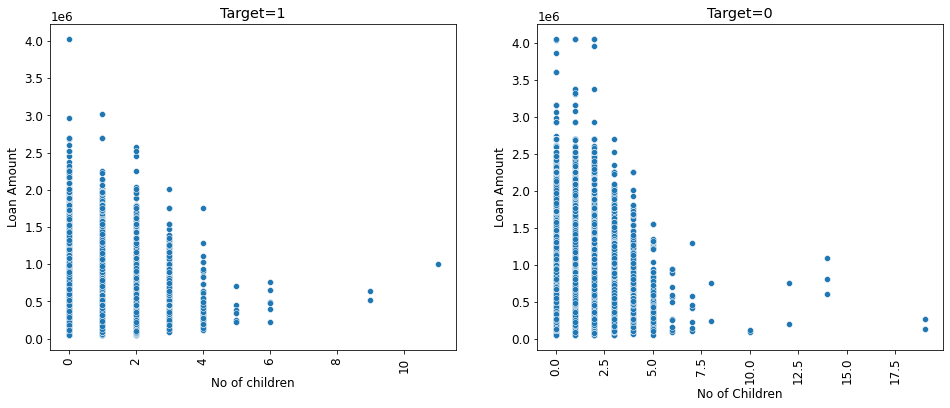

In [186]:
#FCNT_CHILDREN vs Loan Amount
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)

sns.scatterplot(data= app_1,x="CNT_CHILDREN",y="AMT_CREDIT")
plt.title("Target=1")
plt.xlabel("No of children")
plt.ylabel("Loan Amount")
plt.xticks(rotation=90)

plt.ylabel("Loan Amount")
plt.subplot(1,2,2)
sns.scatterplot(data= app_0,x="CNT_CHILDREN",y="AMT_CREDIT")
plt.title("Target=0")
plt.xlabel("No of Children")
plt.ylabel("Loan Amount")
plt.xticks(rotation=90)
plt.show()

**We observe as number of children increases loan amount is less
Clients with no hildren seek huge loan amount**

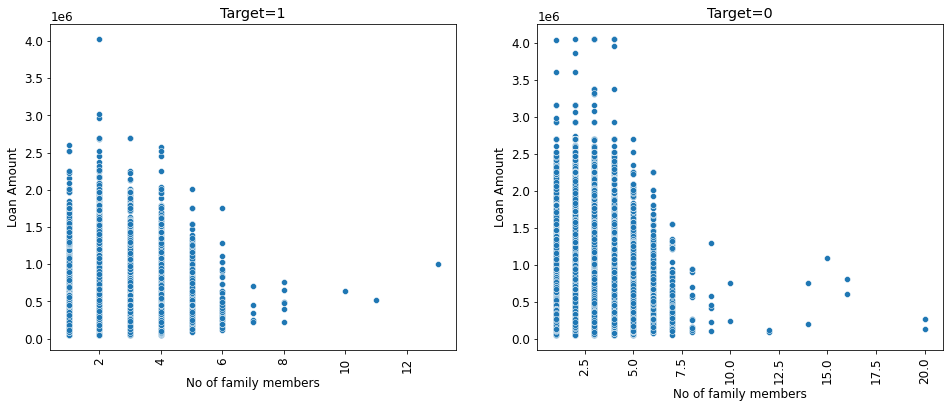

In [187]:
#CNT_FAM_MEMBERS vs Loan Amount
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)

sns.scatterplot(data= app_1,x="CNT_FAM_MEMBERS",y="AMT_CREDIT")
plt.title("Target=1")
plt.xlabel("No of family members")
plt.ylabel("Loan Amount")
plt.xticks(rotation=90)

plt.ylabel("Loan Amount")
plt.subplot(1,2,2)
sns.scatterplot(data= app_0,x="CNT_FAM_MEMBERS",y="AMT_CREDIT")
plt.title("Target=0")
plt.xlabel("No of family members")
plt.ylabel("Loan Amount")
plt.xticks(rotation=90)
plt.show()

- Smaller family applying for big loan amounts

### Pair wise analyzing numeric columns

<Figure size 1800x2520 with 0 Axes>

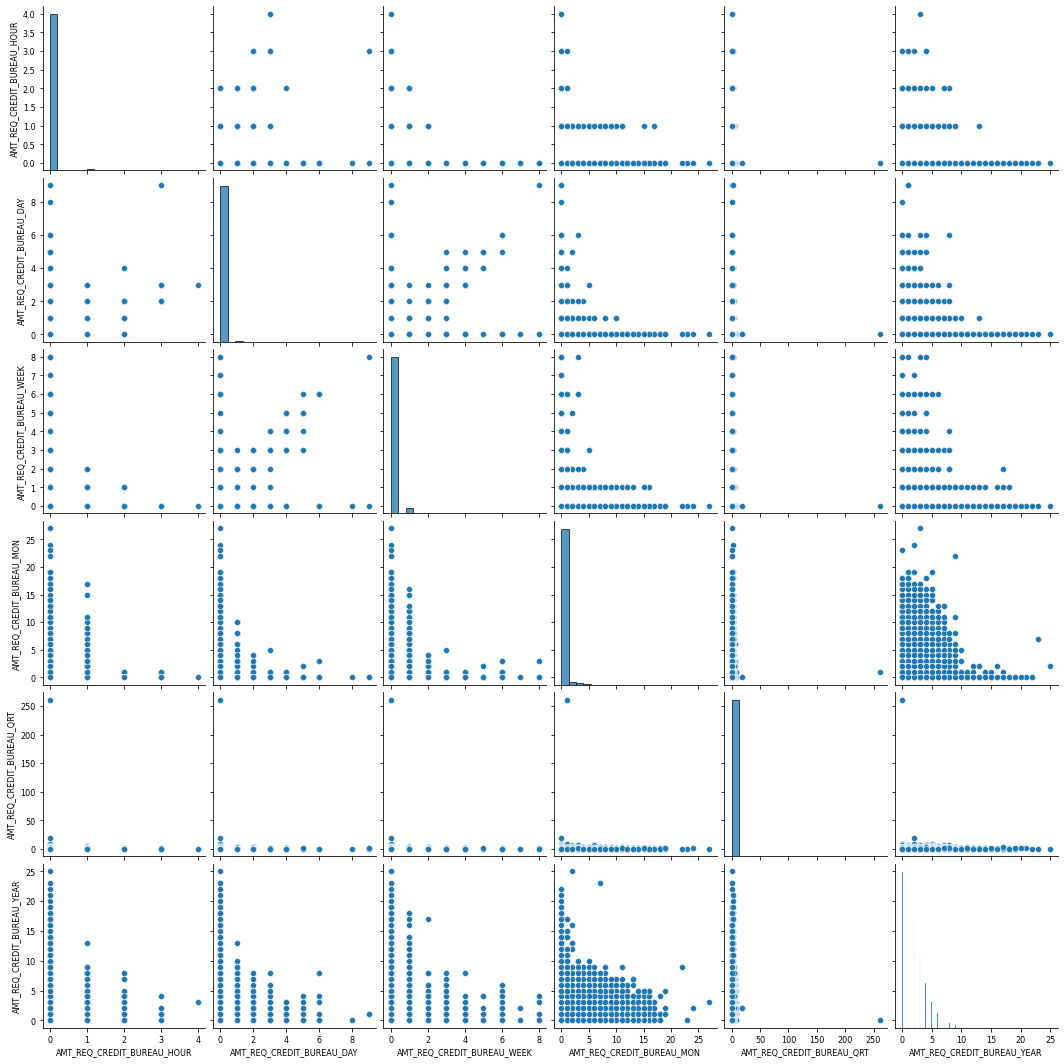

In [188]:
plt.figure(figsize=(25,35))
plt.rcParams['font.size'] = '8'
sns.pairplot(df) 
plt.show()

### Correlation between numeric columns

In [189]:
#Finding the top 10 correlation for the Client with payment difficulties 
app_1_corr=app_1.iloc[0: , 2:]

In [190]:
corr_1=app_1_corr.corr()
corr_1.head()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
CNT_CHILDREN          1.000000          0.004796   -0.001675     0.031257   
AMT_INCOME_TOTAL      0.004796          1.000000    0.038131     0.046421   
AMT_CREDIT           -0.001675          0.038131    1.000000     0.752195   
AMT_ANNUITY           0.031257          0.046421    0.752195     1.000000   
AMT_GOODS_PRICE      -0.008112          0.037583    0.983103     0.752699   

                  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
CNT_CHILDREN            -0.008112                   -0.031975   -0.259109   
AMT_INCOME_TOTAL         0.037583                    0.009135   -0.003096   
AMT_CREDIT               0.983103                    0.069161    0.135316   
AMT_ANNUITY              0.752699                    0.071690    0.014303   
AMT_GOODS_PRICE          1.000000                    0.076049    0.135810   

                  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
CNT_CHILDREN          -0.192864          -0.149154        -0.032299   
AMT_INCOME_TOTAL      -0.014977          -0.000158        -0.004215   
AMT_CREDIT             0.001930           0.025854        -0.052329   
AMT_ANNUITY           -0.081207          -0.034279        -0.016767   
AMT_GOODS_PRICE        0.006642           0.025679        -0.056086   

                  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
CNT_CHILDREN             NaN        0.192469         0.051712   
AMT_INCOME_TOTAL         NaN        0.014971        -0.012146   
AMT_CREDIT               NaN       -0.000660        -0.059601   
AMT_ANNUITY              NaN        0.081797        -0.049845   
AMT_GOODS_PRICE          NaN       -0.005270        -0.033617   

                  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
CNT_CHILDREN              0.003592   -0.024306    0.013902         0.885484   
AMT_INCOME_TOTAL         -0.000878   -0.004478    0.009889         0.006654   
AMT_CREDIT                0.031771    0.008608    0.010157         0.051224   
AMT_ANNUITY               0.035656   -0.013768    0.078188         0.075711   
AMT_GOODS_PRICE           0.028657    0.027678    0.013697         0.047388   

                  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
CNT_CHILDREN                  0.040680                     0.043185   
AMT_INCOME_TOTAL             -0.021486                    -0.022808   
AMT_CREDIT                   -0.059193                    -0.071377   
AMT_ANNUITY                  -0.073784                    -0.089291   
AMT_GOODS_PRICE              -0.066390                    -0.077191   

                  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
CNT_CHILDREN                    -0.023899                   -0.024322   
AMT_INCOME_TOTAL                 0.013775                    0.007577   
AMT_CREDIT                       0.031782                    0.019540   
AMT_ANNUITY                      0.031236                    0.034807   
AMT_GOODS_PRICE                  0.044315                    0.022392   

                  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
CNT_CHILDREN                       -0.020793                    -0.012073   
AMT_INCOME_TOTAL                    0.014531                     0.013409   
AMT_CREDIT                          0.033260                     0.033554   
AMT_ANNUITY                         0.066565                     0.064109   
AMT_GOODS_PRICE                     0.036261                     0.035484   

                  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
CNT_CHILDREN                   -0.001174                0.046115   
AMT_INCOME_TOTAL               -0.002223               -0.003019   
AMT_CREDIT                     -0.033034               -0.037720   
AMT_ANNUITY                    -0.005745                0.001997   
AMT_GOODS_PRICE                -0.034115               -0.038916   

                  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  EXT_

In [191]:
col= app_1.columns

In [192]:
L=[]
#c=app_1.columns

result = app_1_corr.select_dtypes(include='number')
result.drop(columns=['Age','Exp'], inplace=True)# days employed and days birth already included
result.head()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0              0          202500.0    406597.5      24700.5         351000.0   
26             0          112500.0    979992.0      27076.5         702000.0   
40             0          202500.0   1193580.0      35028.0         855000.0   
42             0          135000.0    288873.0      16258.5         238500.0   
81             0           81000.0    252000.0      14593.5         252000.0   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018801        9461            637             3648.0   
26                    0.018029       18724           2628             6573.0   
40                    0.025164       17482           1262             1182.0   
42                    0.007305       13384           3597               45.0   
81                    0.028663       24794         365243             5391.0   

    DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             -2120           1               1                0   
26            -1827           1               1                0   
40            -1029           1               1                0   
42            -4409           1               1                1   
81            -4199           1               0                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                  1           1           0              1.0   
26                 1           0           0              1.0   
40                 1           0           0              2.0   
42                 1           1           0              2.0   
81                 1           0           0              2.0   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                      2                            2   
26                     3                            2   
40                     2                            2   
42                     3                            3   
81                     2                            2   

    HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                        10                           0   
26                        9                           0   
40                        9                           0   
42                       11                           0   
81                       10                           0   

    REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                            0                            0   
26                           0                            0   
40                           0                            0   
42                           0                            0   
81                           0                            0   

    REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                        0                       0                        0   
26                       0                       0                        0   
40                       0                       0                        0   
42                       0                       0                        0   
81                       0                       0                        0   

    EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
0       0.262949      0.139376                       0.9722         0.0833   
26      0.548477      0.190706                       0.9732         0.0417   
40      0.306841      0.320163                       0.9960         0.2500   
42      0.674203      0.399676                          NaN            NaN   
81      0.023952      0.720944                          NaN            NaN   

    YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  \
0                         0.9722          0.0833   
26                        0.9732          0.0417   
40                        0.9960          0.2500   
42           

In [193]:
L=[]
c= result.columns

n=len(c)
for i in range(n):
    for j in range(n):
        if i !=j:
            if i<j:
                a=c[i]
                b=c[j]
                column_1 = result[a]
                column_2 = result[b]
                correlation = column_1.corr(column_2)
            #print(correlation)
                L.append([a,b,correlation])


In [194]:
df = pd.DataFrame(L, columns =['Var1', 'Var2','Correlation'])
df.head()

Var1                        Var2  Correlation
0  CNT_CHILDREN            AMT_INCOME_TOTAL     0.004796
1  CNT_CHILDREN                  AMT_CREDIT    -0.001675
2  CNT_CHILDREN                 AMT_ANNUITY     0.031257
3  CNT_CHILDREN             AMT_GOODS_PRICE    -0.008112
4  CNT_CHILDREN  REGION_POPULATION_RELATIVE    -0.031975

### Top 10 correlation for the Client with payment difficulties

In [195]:
#  Top 10 correlation for the Client with payment difficulties
df1=df.sort_values(by=['Correlation'], ascending =False)
df1.head(20)

Var1                          Var2  Correlation
1681      OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE     0.998269
1482                 FLOORSMAX_AVG                FLOORSMAX_MEDI     0.997187
1445   YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MEDI     0.996124
1551                FLOORSMAX_MODE                FLOORSMAX_MEDI     0.989195
1480                 FLOORSMAX_AVG                FLOORSMAX_MODE     0.986594
130                     AMT_CREDIT               AMT_GOODS_PRICE     0.983103
1443   YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MODE     0.980466
1516  YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MEDI     0.978073
969           REGION_RATING_CLIENT   REGION_RATING_CLIENT_W_CITY     0.956637
15                    CNT_CHILDREN               CNT_FAM_MEMBERS     0.885484
1711      DEF_30_CNT_SOCIAL_CIRCLE      DEF_60_CNT_SOCIAL_CIRCLE     0.868994
1155    REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION     0.847885
1284        REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY     0.778540
192                    AMT_ANNUITY               AMT_GOODS_PRICE     0.752699
129                     AMT_CREDIT                   AMT_ANNUITY     0.752195
1483                 FLOORSMAX_AVG                TOTALAREA_MODE     0.640754
1617                FLOORSMAX_MEDI                TOTALAREA_MODE     0.637900
1552                FLOORSMAX_MODE                TOTALAREA_MODE     0.633972
470                  DAYS_EMPLOYED               FLAG_DOCUMENT_6     0.617646
375                     DAYS_BIRTH                 DAYS_EMPLOYED     0.582185

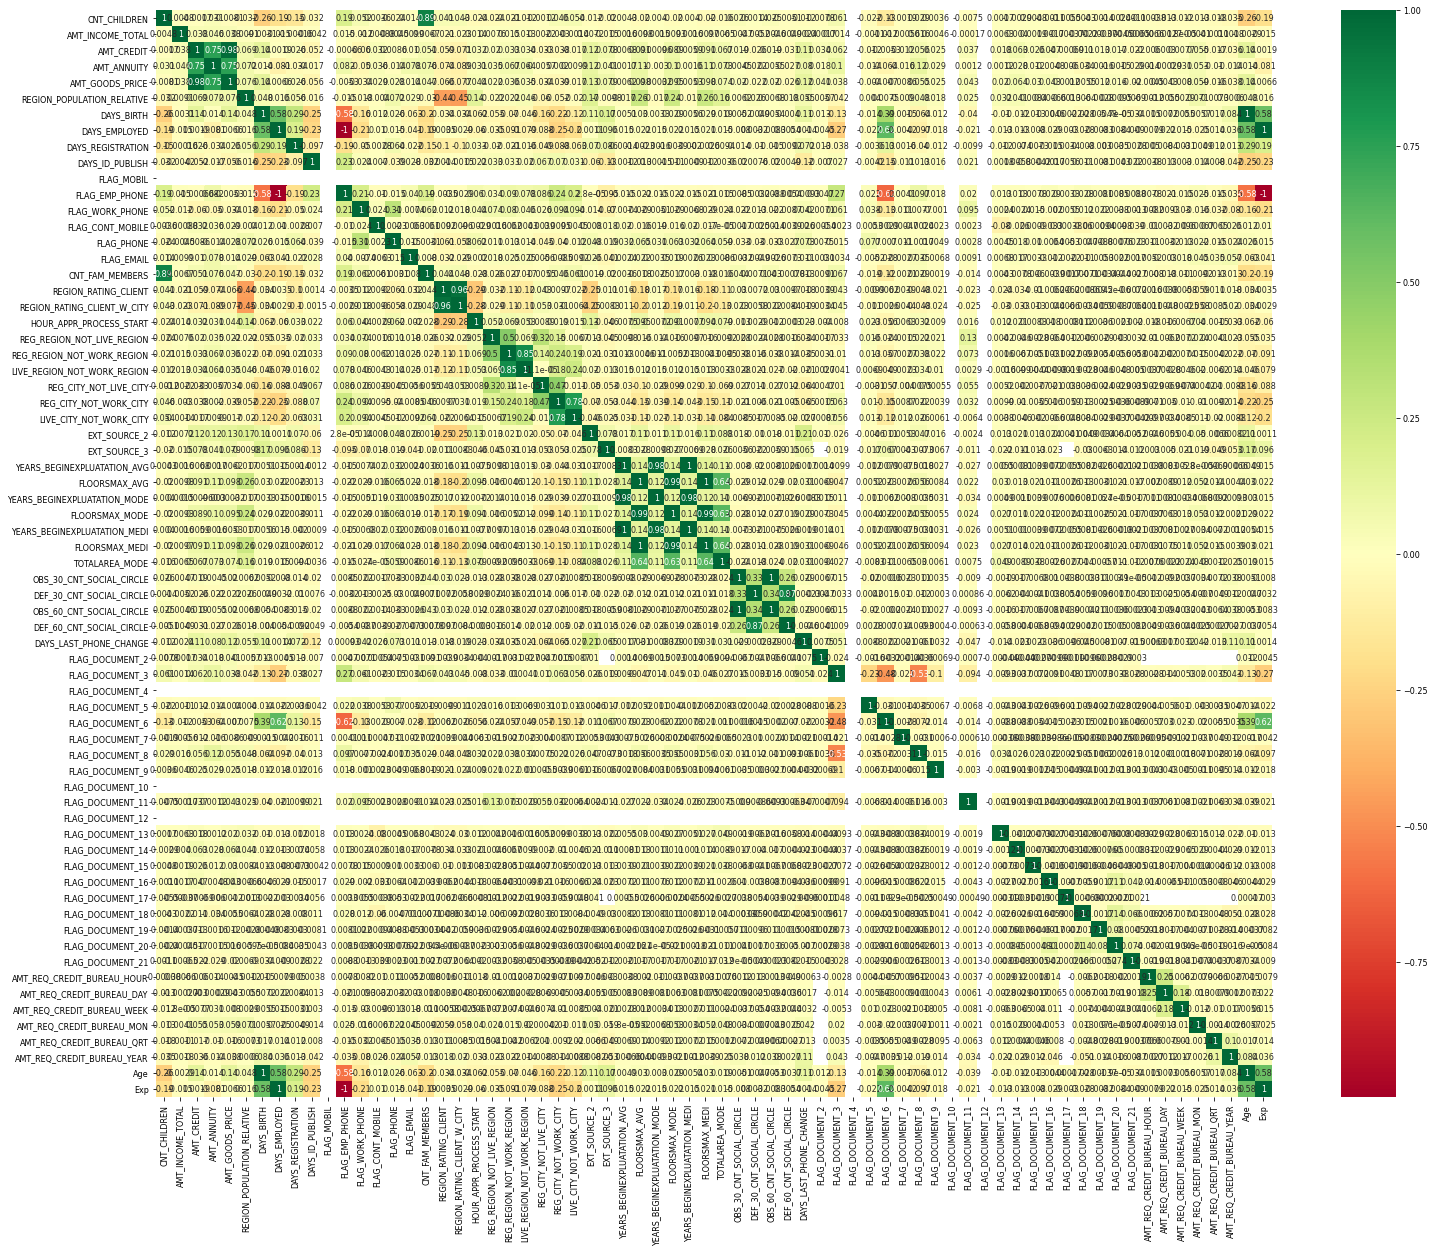

In [196]:
# Heatmap to show correlation between columns for clients with payment difficulties
plt.figure(figsize=(25,20))
sns.heatmap(corr_1,annot=True,cmap='RdYlGn')
plt.show()

**Observations**
In clients with payment difficulties

- We observe high correlation among AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE.
- Huge loans are granted against high priced goods and loan annuity
- Moderate correlation between AMT_INCOME_TOTAL and AMT_ANNUITY.

In [197]:
# Finding correlation between columns for non defaulter clients

In [198]:
#### Correlation between numeric columns

In [199]:
#Finding the top 10 correlation for the Client with payment difficulties 
app_0_corr=app_0.iloc[0: , 2:]

In [200]:
corr_0=app_0_corr.corr()
corr_0

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                      1.000000          0.027397    0.003081   
AMT_INCOME_TOTAL                  0.027397          1.000000    0.342799   
AMT_CREDIT                        0.003081          0.342799    1.000000   
AMT_ANNUITY                       0.020905          0.418953    0.771309   
AMT_GOODS_PRICE                  -0.000525          0.349462    0.987250   
REGION_POPULATION_RELATIVE       -0.024363          0.167851    0.100604   
DAYS_BIRTH                       -0.336966         -0.062609    0.047378   
DAYS_EMPLOYED                    -0.245174         -0.140392   -0.070104   
DAYS_REGISTRATION                -0.185792         -0.064937   -0.013477   
DAYS_ID_PUBLISH                  -0.028751          0.022896   -0.001464   
FLAG_MOBIL                        0.001080          0.000733    0.001498   
FLAG_EMP_PHONE                    0.244274          0.140744    0.071257   
FLAG_WORK_PHONE                   0.055453         -0.032404   -0.017119   
FLAG_CONT_MOBILE                 -0.001201         -0.018814    0.023096   
FLAG_PHONE                       -0.029929          0.002683    0.026725   
FLAG_EMAIL                        0.023460          0.083705    0.017074   
CNT_FAM_MEMBERS                   0.878571          0.034256    0.064536   
REGION_RATING_CLIENT              0.022842         -0.186573   -0.103337   
REGION_RATING_CLIENT_W_CITY       0.021866         -0.200466   -0.112238   
HOUR_APPR_PROCESS_START          -0.005244          0.076743    0.053619   
REG_REGION_NOT_LIVE_REGION       -0.012342          0.068510    0.024617   
REG_REGION_NOT_WORK_REGION        0.010857          0.137174    0.053735   
LIVE_REGION_NOT_WORK_REGION       0.017326          0.127701    0.054250   
REG_CITY_NOT_LIVE_CITY            0.021587          0.010567   -0.025036   
REG_CITY_NOT_WORK_CITY            0.072193          0.017618   -0.015703   
LIVE_CITY_NOT_WORK_CITY           0.070988          0.020684    0.002506   
EXT_SOURCE_2                     -0.015455          0.139598    0.129140   
EXT_SOURCE_3                     -0.041729         -0.072401    0.036085   
YEARS_BEGINEXPLUATATION_AVG       0.007298          0.016485    0.005943   
FLOORSMAX_AVG                    -0.008307          0.181891    0.102921   
YEARS_BEGINEXPLUATATION_MODE      0.006545          0.015393    0.004842   
FLOORSMAX_MODE                   -0.008199          0.174416    0.100024   
YEARS_BEGINEXPLUATATION_MEDI      0.006783          0.016431    0.005480   
FLOORSMAX_MEDI                   -0.008063          0.180458    0.102374   
TOTALAREA_MODE                   -0.006972          0.125714    0.072281   
OBS_30_CNT_SOCIAL_CIRCLE          0.014471         -0.027828   -0.000914   
DEF_30_CNT_SOCIAL_CIRCLE         -0.002246         -0.027621   -0.019851   
OBS_60_CNT_SOCIAL_CIRCLE          0.014137         -0.027690   -0.000892   
DEF_60_CNT_SOCIAL_CIRCLE         -0.002172         -0.027593   -0.022225   
DAYS_LAST_PHONE_CHANGE            0.008501          0.041338    0.069540   
FLAG_DOCUMENT_2                   0.003736         -0.002857    0.005490   
FLAG_DOCUMENT_3                   0.055718         -0.039251    0.100334   
FLAG_DOCUMENT_4                  -0.003833          0.001160    0.000567   
FLAG_DOCUMENT_5                  -0.016239          0.004161   -0.011750   
FLAG_DOCUMENT_6                  -0.158963         -0.100271   -0.050260   
FLAG_DOCUMENT_7                  -0.001442          0.009035   -0.003613   
FLAG_DOCUMENT_8                   0.053919          0.159350    0.084524   
FLAG_DOCUMENT_9                  -0.002358          0.040088    0.022297   
FLAG_DOCUMENT_10                 -0.002859          0.000637   -0.003243   
FLAG_DOCUMENT_11                 -0.005059          0.005402    0.028341   
FLAG_DOCUMENT_12                  0.000322          0.005680    0.003956   
FLAG_DOCUMENT_13                  0.004340          0.049421    0.053726   
FL

### Findng top 10 correlations for both Categories of Clients

In [201]:
Col_list=['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',  'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',  'DAYS_LAST_PHONE_CHANGE',  'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK']

In [202]:
app_corr_0_new=app_0_corr[Col_list].copy()
app_corr_1_new=app_1_corr[Col_list].copy()

In [203]:
resultfinal0 = app_corr_0_new.select_dtypes(include='number')
resultfinal1 = app_corr_1_new.select_dtypes(include='number')
resultfinal0.head()


CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   
5             0           99000.0    490495.5      27517.5         454500.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   
5                    0.035792       16941           1588             4970.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   
5             -477           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
1                 1           1           0              2.0   
2                 1           1           0              1.0   
3                 1           0           0              2.0   
4                 1           0           0              1.0   
5                 1           1           0              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   
5                     2                            2                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   
5                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  \
1                       0                        0      0.622246   
2                       0                        0      0.555912   
3                       0                        0      0.650442   
4                       1                        1      0.322738   
5                       0                        0      0.354225   

   EXT_SOURCE_3  DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
1           NaN                   828.0                         0.0   
2      0.729567                   815.0                         0.0   
3           NaN                   617.0                         NaN   
4           NaN                  1106.0                         0.0   
5      0.621226                  2536.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                     

In [204]:
L1=[]
L2=[]
c= resultfinal0.columns

n=len(c)
for i in range(n):
    for j in range(n):
        if i !=j:
            if i<j:
                a=c[i]
                b=c[j]
                column_1 = resultfinal0[a]
                column_2 = resultfinal0[b]
                column_3 = resultfinal1[a]
                column_4 = resultfinal1[b]
                correlation = column_1.corr(column_2)
                correl= column_3.corr(column_4)
                L1.append([a,b,correlation])
                L2.append([a,b,correl])


In [205]:
df_0 = pd.DataFrame(L1, columns =['Var1', 'Var2','Correlation'])
df_1 = pd.DataFrame(L2, columns =['Var1', 'Var2','Correlation'])
df_0.head()

Var1                        Var2  Correlation
0  CNT_CHILDREN            AMT_INCOME_TOTAL     0.027397
1  CNT_CHILDREN                  AMT_CREDIT     0.003081
2  CNT_CHILDREN                 AMT_ANNUITY     0.020905
3  CNT_CHILDREN             AMT_GOODS_PRICE    -0.000525
4  CNT_CHILDREN  REGION_POPULATION_RELATIVE    -0.024363

In [206]:
df_1.head()

Var1                        Var2  Correlation
0  CNT_CHILDREN            AMT_INCOME_TOTAL     0.004796
1  CNT_CHILDREN                  AMT_CREDIT    -0.001675
2  CNT_CHILDREN                 AMT_ANNUITY     0.031257
3  CNT_CHILDREN             AMT_GOODS_PRICE    -0.008112
4  CNT_CHILDREN  REGION_POPULATION_RELATIVE    -0.031975

In [207]:
#  Top 10 correlation for the Client without payment difficulties
df3_0=df_0.sort_values(by=['Correlation'], ascending =False)
#  Top 10 correlation for the Client with payment difficulties
df3_1=df_1.sort_values(by=['Correlation'], ascending =False)
#viewing correlations for cilents without payment difficulty
df3_0.head(10)

Var1                         Var2  Correlation
62                   AMT_CREDIT              AMT_GOODS_PRICE     0.987250
391        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY     0.950149
15                 CNT_CHILDREN              CNT_FAM_MEMBERS     0.878571
441  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION     0.861861
468      REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY     0.830381
90                  AMT_ANNUITY              AMT_GOODS_PRICE     0.776686
61                   AMT_CREDIT                  AMT_ANNUITY     0.771309
171                  DAYS_BIRTH                DAYS_EMPLOYED     0.626114
430  REG_REGION_NOT_LIVE_REGION   REG_REGION_NOT_WORK_REGION     0.446101
460      REG_CITY_NOT_LIVE_CITY       REG_CITY_NOT_WORK_CITY     0.435514

In [208]:
#Top 10 correlation for clients with payment difficulty
df3_1.head(10)

Var1                         Var2  Correlation
62                   AMT_CREDIT              AMT_GOODS_PRICE     0.983103
391        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY     0.956637
15                 CNT_CHILDREN              CNT_FAM_MEMBERS     0.885484
441  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION     0.847885
468      REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY     0.778540
90                  AMT_ANNUITY              AMT_GOODS_PRICE     0.752699
61                   AMT_CREDIT                  AMT_ANNUITY     0.752195
171                  DAYS_BIRTH                DAYS_EMPLOYED     0.582185
430  REG_REGION_NOT_LIVE_REGION   REG_REGION_NOT_WORK_REGION     0.497937
460      REG_CITY_NOT_LIVE_CITY       REG_CITY_NOT_WORK_CITY     0.472052

In [209]:
df3_corr_0=resultfinal0.corr()
df3_corr_1=resultfinal1.corr()

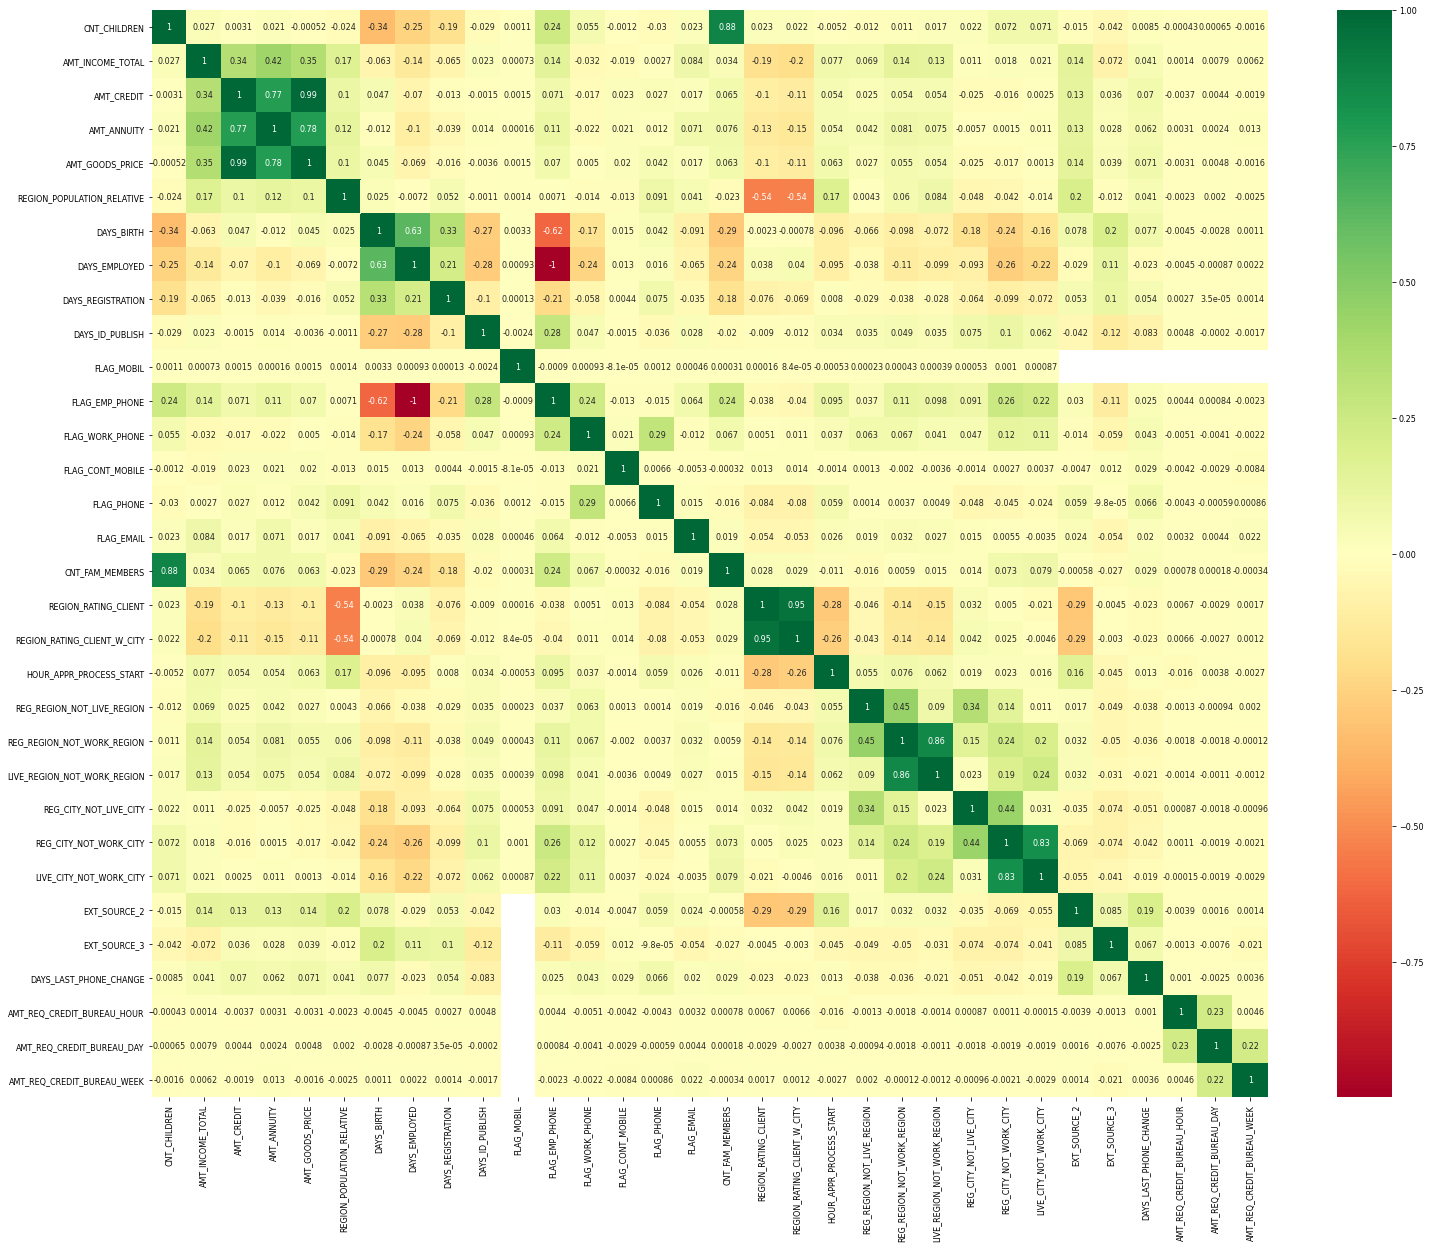

In [210]:
# Heatmap to show correlation between columns for clients with no payment difficulties
plt.figure(figsize=(25,20))
sns.heatmap(df3_corr_0,annot=True,cmap='RdYlGn')
plt.show()

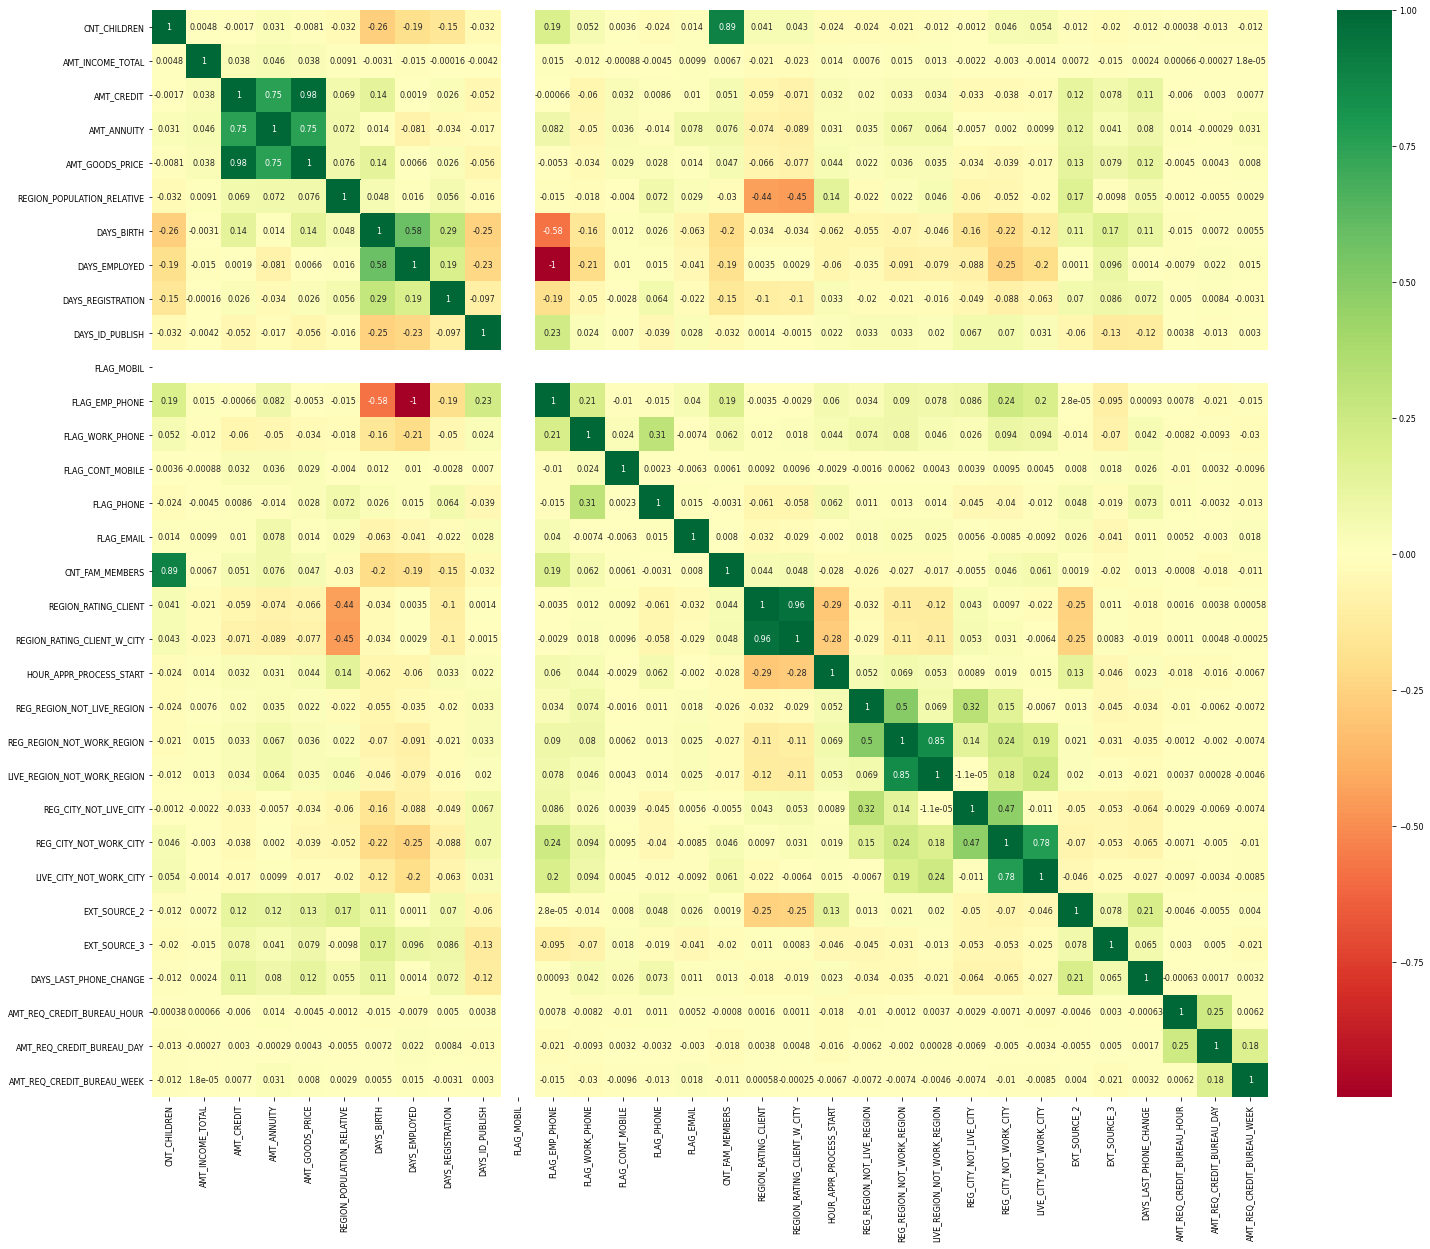

In [211]:
# Heatmap to show correlation between columns for clients with  payment difficulties
plt.figure(figsize=(25,20))
sns.heatmap(df3_corr_1,annot=True,cmap='RdYlGn')
plt.show()

### Repeating the process of generating correlations with all numeric columns in the original dataframe

In [212]:
L=[]

result1 = app_0_corr.select_dtypes(include='number')
result1.drop(columns=['Age','Exp'], inplace=True)
result1.head()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   
5             0           99000.0    490495.5      27517.5         454500.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   
5                    0.035792       16941           1588             4970.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   
5             -477           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
1                 1           1           0              2.0   
2                 1           1           0              1.0   
3                 1           0           0              2.0   
4                 1           0           0              1.0   
5                 1           1           0              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   
5                     2                            2                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   
5                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  \
1                       0                        0      0.622246   
2                       0                        0      0.555912   
3                       0                        0      0.650442   
4                       1                        1      0.322738   
5                       0                        0      0.354225   

   EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
1           NaN                       0.9851         0.2917   
2      0.729567                          NaN            NaN   
3           NaN                          NaN            NaN   
4           NaN                          NaN            NaN   
5      0.621226                          NaN            NaN   

   YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  \
1                        0.9851          0.2917                        0.9851   
2                           NaN             NaN                           NaN   
3                           NaN

In [213]:
L=[]
c= result1.columns

n=len(c)
for i in range(n):
    for j in range(n):
        if i !=j:
            if i<j:
                a=c[i]
                b=c[j]
                column_1 = result1[a]
                column_2 = result1[b]
                correlation = column_1.corr(column_2)
            #print(correlation)
                L.append([a,b,correlation])


In [214]:
df2 = pd.DataFrame(L, columns =['Var1', 'Var2','Correlation'])
df2.head()

Var1                        Var2  Correlation
0  CNT_CHILDREN            AMT_INCOME_TOTAL     0.027397
1  CNT_CHILDREN                  AMT_CREDIT     0.003081
2  CNT_CHILDREN                 AMT_ANNUITY     0.020905
3  CNT_CHILDREN             AMT_GOODS_PRICE    -0.000525
4  CNT_CHILDREN  REGION_POPULATION_RELATIVE    -0.024363

In [215]:
#  Top 10 correlation for the Client with payment difficulties
df3=df2.sort_values(by=['Correlation'], ascending =False)
df3.head(10)

Var1                          Var2  Correlation
1681      OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE     0.998508
1482                 FLOORSMAX_AVG                FLOORSMAX_MEDI     0.997018
1445   YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MEDI     0.993582
1551                FLOORSMAX_MODE                FLOORSMAX_MEDI     0.988153
130                     AMT_CREDIT               AMT_GOODS_PRICE     0.987250
1480                 FLOORSMAX_AVG                FLOORSMAX_MODE     0.985603
1443   YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MODE     0.971032
1516  YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MEDI     0.962064
969           REGION_RATING_CLIENT   REGION_RATING_CLIENT_W_CITY     0.950149
15                    CNT_CHILDREN               CNT_FAM_MEMBERS     0.878571

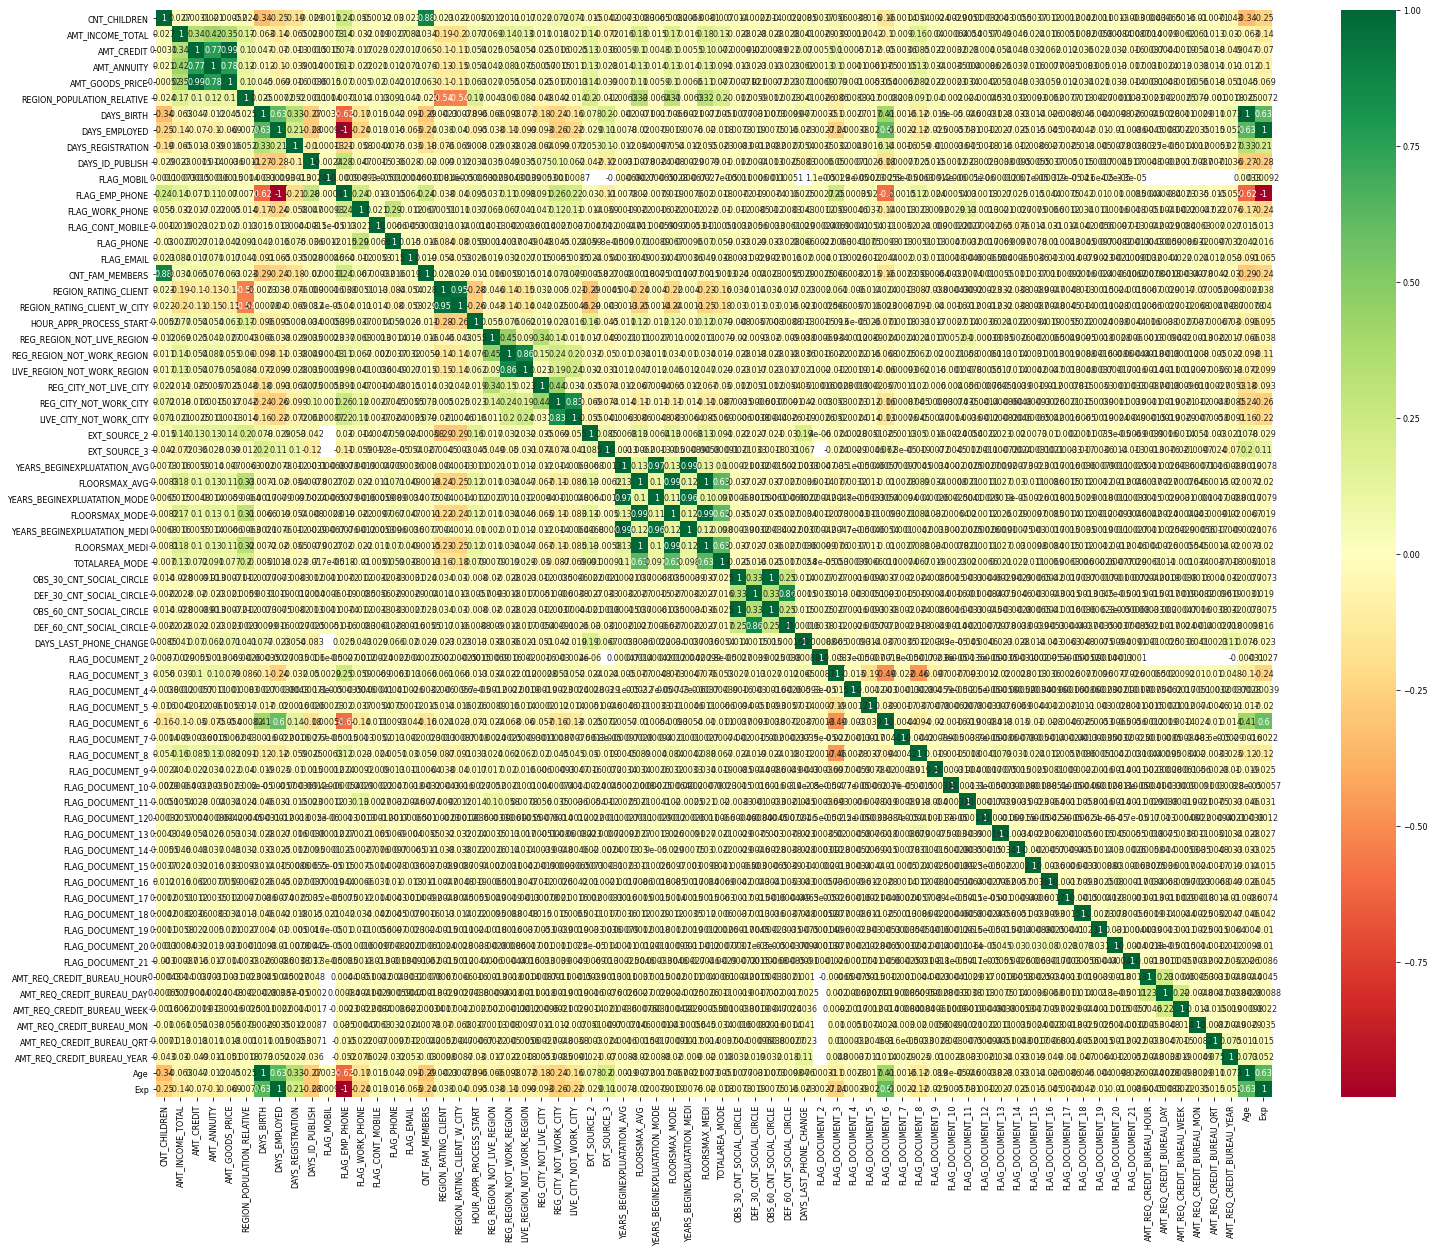

In [216]:
# Heatmap to show correlation between columns for clients with no payment difficulties
plt.figure(figsize=(25,20))
sns.heatmap(corr_0,annot=True,cmap='RdYlGn')
plt.show()

In clients with no payment difficulties

- We observe high correlation among AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE.



## Analyzing Previous Applications Data

In [217]:
#Reviewing data for top few rows
previous_applications.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [218]:
previous_applications.shape

(1670214, 37)

In [219]:
previous_applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [220]:
# Analyzing Numeric columns
previous_applications.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [221]:
previous_applications['SK_ID_PREV'].nunique()

1670214

In [222]:
previous_applications['SK_ID_CURR'].nunique()

338857

In [223]:
#Finding out the percentage of  Missing value in each column of previous application data set.
previous_applications.isnull().sum()/previous_applications.shape[0]*100


SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [224]:

# We must Drop the columns with more than 50% missing values



In [225]:
previous_applications.shape

(1670214, 37)

In [226]:
previous_applications.isnull().sum()/previous_applications.shape[0]*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [227]:
#Reviewing columns with missing columns

In [228]:
# Analysing the column AMT_ANNUITY
previous_applications['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

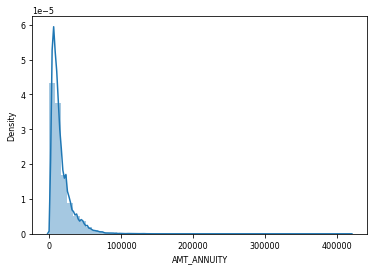

In [229]:
sns.distplot(previous_applications['AMT_ANNUITY'])

plt.show()

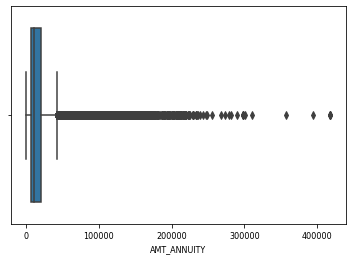

In [230]:
sns.boxplot(previous_applications['AMT_ANNUITY'])

plt.show()

In [231]:
#While reviewing we observe some outliers in the data.Exploring data further
previous_applications[previous_applications['AMT_ANNUITY'].isnull()]['NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40898
Unused offer     25524
Approved             8
Name: NAME_CONTRACT_STATUS, dtype: int64

#### These nulls are mostly applications which were canceled, refused or unused offers. We can impute the missing values using mean/median values

In [232]:
#Analyzing the missing values in the column AMT_GOODS_PRICE

In [233]:
previous_applications['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

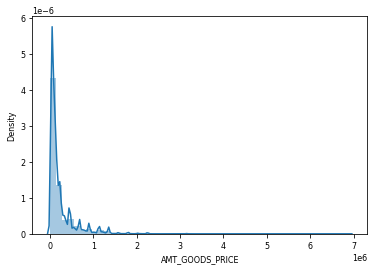

In [234]:
sns.distplot(previous_applications['AMT_GOODS_PRICE'])

plt.show()

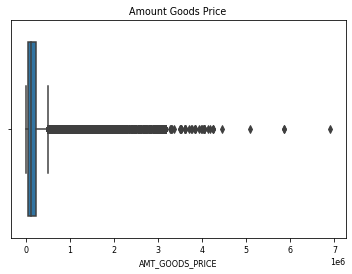

In [235]:
sns.boxplot(previous_applications['AMT_GOODS_PRICE'])
plt.title('Amount Goods Price')
plt.show()

In [236]:
#Further reviewing the data

In [237]:
previous_applications[previous_applications['AMT_GOODS_PRICE'].isnull()]['NAME_CONTRACT_STATUS'].value_counts()

Canceled        305570
Approved         42835
Refused          37105
Unused offer         5
Name: NAME_CONTRACT_STATUS, dtype: int64

We observe that these missing values exist for previous loans which were canceled. Retaining these data and imputing them with median values

In [238]:
# Reviewing the column CNT_PAYMENT

In [239]:
previous_applications['CNT_PAYMENT'].value_counts()

12.0    323049
6.0     190461
0.0     144985
10.0    141851
24.0    137764
18.0     77430
36.0     72583
60.0     53600
48.0     47316
8.0      30349
4.0      26924
30.0     16924
14.0      8253
42.0      7136
16.0      5710
5.0       3957
54.0      2104
20.0      1805
7.0       1434
9.0       1236
3.0       1100
15.0       904
11.0       669
72.0       139
13.0        51
17.0        48
84.0        45
22.0        37
23.0        27
26.0        13
35.0        11
66.0        10
29.0         8
28.0         8
32.0         6
19.0         6
34.0         4
59.0         4
45.0         3
41.0         3
47.0         3
21.0         3
44.0         2
39.0         2
38.0         2
46.0         2
40.0         1
33.0         1
53.0         1
Name: CNT_PAYMENT, dtype: int64

In [240]:
previous_applications['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [241]:
previous_applications[previous_applications['CNT_PAYMENT'].isnull()]['NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [242]:
# These nulls are again for loan applications canceled, refused cases. Imputing the missiong values with median values

In [243]:
#Replacing Missing value with median
previous_applications["CNT_PAYMENT"].fillna(previous_applications["CNT_PAYMENT"].median(),inplace=True)

In [244]:
#there is a single Null in AMT_CREDIT
previous_applications['AMT_CREDIT'].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

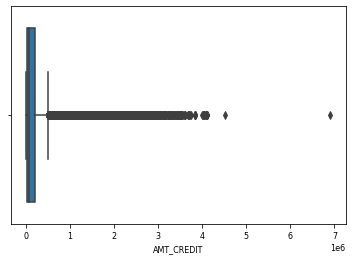

In [245]:
sns.boxplot(previous_applications['AMT_CREDIT'])
plt.show()

In [246]:
# We can Impute the missing value with median



In [247]:
# There re 40 % missing values in the columns DAYS_FIRST_DRAWING,DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE  , DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL

In [248]:
null_col=['DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE'  , 'DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL']

In [249]:
#Analyzing null columns. Creating dataframe to get insights into data.
prev=previous_applications[null_col]

In [250]:
prev.describe()

DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count       997149.000000   997149.000000              997149.000000   
mean        342209.855039    13826.269337               33767.774054   
std          88916.115834    72444.869708              106857.034789   
min          -2922.000000    -2892.000000               -2801.000000   
25%         365243.000000    -1628.000000               -1242.000000   
50%         365243.000000     -831.000000                -361.000000   
75%         365243.000000     -411.000000                 129.000000   
max         365243.000000   365243.000000              365243.000000   

       DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
count  997149.000000     997149.000000              997149.000000  
mean    76582.403064      81992.343838                   0.332570  
std    149647.415123     153303.516729                   0.471134  
min     -2889.000000      -2874.000000                   0.000000  
25%     -1314.000000      -1270.000000                   0.000000  
50%      -537.000000       -499.000000                   0.000000  
75%       -74.000000        -44.000000                   1.000000  
max    365243.000000     365243.000000                   1.000000

In [251]:
prev.head()


DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
0            365243.0           -42.0                      300.0   
1            365243.0          -134.0                      916.0   
2            365243.0          -271.0                       59.0   
3            365243.0          -482.0                     -152.0   
4                 NaN             NaN                        NaN   

   DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
0          -42.0             -37.0                        0.0  
1       365243.0          365243.0                        1.0  
2       365243.0          365243.0                        1.0  
3         -182.0            -177.0                        1.0  
4            NaN               NaN                        NaN

In [252]:
prev['NFLAG_INSURED_ON_APPROVAL'].value_counts(normalize=True)

0.0    0.66743
1.0    0.33257
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64

In [253]:
L= null_col
## converting days into years to analyze rows
L.remove('NFLAG_INSURED_ON_APPROVAL')
np.abs(prev[L]/365).round(0)

DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
0                    1001.0             0.0                        1.0   
1                    1001.0             0.0                        3.0   
2                    1001.0             1.0                        0.0   
3                    1001.0             1.0                        0.0   
4                       NaN             NaN                        NaN   
...                     ...             ...                        ...   
1670209              1001.0             1.0                        1.0   
1670210              1001.0             4.0                        3.0   
1670211              1001.0             4.0                        3.0   
1670212              1001.0             3.0                        2.0   
1670213              1001.0             3.0                        1.0   

         DAYS_LAST_DUE  DAYS_TERMINATION  
0                  0.0               0.0  
1               1001.0            1001.0  
2               1001.0            1001.0  
3                  0.0               0.0  
4                  NaN               NaN  
...                ...               ...  
1670209            1.0               1.0  
1670210            4.0               4.0  
1670211            3.0               3.0  
1670212            2.0               2.0  
1670213            1.0               1.0  

[1670214 rows x 5 columns]

In [254]:
# These column values do not appear to be relevant. These can be dropped. Creating a new dataframe previous, containing final columns


In [255]:
#Previous dataframe contains a copy of origginal dataframe previous_applications
previous=previous_applications.copy()
null_col=['DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE'  , 'DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL']

In [256]:
#checking the column PRODUCT_COMBINATION for null values. There are 0.020716% null values

In [257]:
#Analyzing categories in the columns PRODUCT_COMBINATION
previous['PRODUCT_COMBINATION'].value_counts(normalize=True)

Cash                              0.171265
POS household with interest       0.157870
POS mobile with interest          0.132148
Cash X-Sell: middle               0.086164
Cash X-Sell: low                  0.077999
Card Street                       0.067420
POS industry with interest        0.059186
POS household without interest    0.049649
Card X-Sell                       0.048257
Cash Street: high                 0.035715
Cash X-Sell: high                 0.035512
Cash Street: middle               0.020755
Cash Street: low                  0.020261
POS mobile without interest       0.014421
POS other with interest           0.014300
POS industry without interest     0.007547
POS others without interest       0.001530
Name: PRODUCT_COMBINATION, dtype: float64

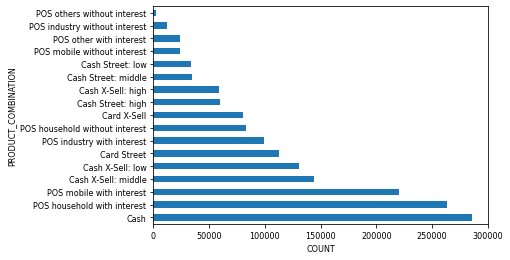

In [258]:
#Plot to analyse the categories in the PRODUCT_COMBINATION column of previous dataset
previous['PRODUCT_COMBINATION'].value_counts().plot.barh()
plt.ylabel('PRODUCT_COMBINATION')
plt.xlabel('COUNT')
plt.show()

- Cash option has the highest counts

## Univariate Analysis on Previous Applications

In [259]:
#Analyzing NAME_CONTRACT_TYPE columns 
previous['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

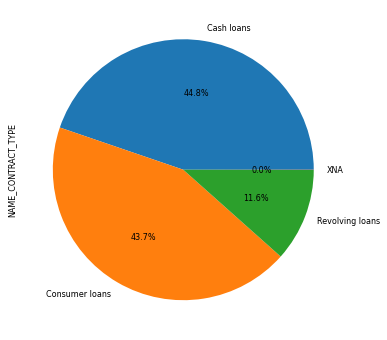

In [260]:
#Plotting piechart to see percentage of values for the column NAME_CONTRACT_TYPE
plt.figure(figsize=(6,6))
previous["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [261]:
previous[previous['NAME_CONTRACT_TYPE']=='XNA'].head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
6664      2515161      222844                XNA          NaN   
9029      1851920      417884                XNA          NaN   
17038     2389511      148922                XNA          NaN   
24543     2494449      366626                XNA          NaN   
24574     2781877      394843                XNA          NaN   
25030     2785890      154490                XNA          NaN   
39305     2457349      307803                XNA          NaN   
39461     2456391      164367                XNA          NaN   
52461     2447432      426909                XNA          NaN   
61664     2022193      378447                XNA          NaN   

       AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
6664               0.0         0.0               NaN              NaN   
9029               0.0         0.0               NaN              NaN   
17038              0.0         0.0               NaN              NaN   
24543              0.0         0.0               NaN              NaN   
24574              0.0         0.0               NaN              NaN   
25030              0.0         0.0               NaN              NaN   
39305              0.0         0.0               NaN              NaN   
39461              0.0         0.0               NaN              NaN   
52461              0.0         0.0               NaN              NaN   
61664              0.0         0.0               NaN              NaN   

      WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
6664                    SATURDAY                        8   
9029                      MONDAY                       13   
17038                    TUESDAY                        6   
24543                  WEDNESDAY                       13   
24574                   SATURDAY                        6   
25030                    TUESDAY                       21   
39305                  WEDNESDAY                       15   
39461                     SUNDAY                       13   
52461                   THURSDAY                       16   
61664                   THURSDAY                       13   

      FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
6664                            Y                       1                NaN   
9029                            Y                       1                NaN   
17038                           Y                       1                NaN   
24543                           Y                       1                NaN   
24574                           Y                       1                NaN   
25030                           Y                       1                NaN   
39305                           Y                       1                NaN   
39461                           Y                       1                NaN   
52461                           Y                       1                NaN   
61664                           Y                       1                NaN   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE  \
6664                     NaN                       NaN                    XAP   
9029                     NaN                       NaN                    XAP   
17038                    NaN                       NaN                    XAP   
24543                    NaN                       NaN                    XAP   
24574                    NaN                       NaN                    XAP   
25030                    NaN                       NaN                    XAP   
39305                    NaN                       NaN                    XAP   
39461                    NaN                       NaN                    XAP   
52461                    NaN                       NaN                    XAP   
61664                    NaN                       NaN                    XAP   

      NAME_CONTRACT_STATUS  DAYS_DECISION 

In [262]:
previous[previous['NAME_CONTRACT_TYPE']=='XNA']['NAME_CONTRACT_STATUS'].value_counts()

Canceled    315
Refused      31
Name: NAME_CONTRACT_STATUS, dtype: int64

In [263]:
# We observe that for NAME_CONTRACT_TYPE='XNA' , NAME_CASH_LOAN_PURPOSE is XAP. Mostly  these loans were canceled or refused

In [264]:
#Analyzing values in the column NAME_CONTRACT_STATUS

previous['NAME_CASH_LOAN_PURPOSE'].value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [265]:
# We observe the value of XAP and XNA. Further understanding these values
previous[previous['NAME_CASH_LOAN_PURPOSE']=='XNA']['NAME_CONTRACT_TYPE'].value_counts(dropna = False)


Cash loans    677918
Name: NAME_CONTRACT_TYPE, dtype: int64

In [266]:
#Checking the contract_type for the column NAME_CASH_LOAN_PURPOSE containing the value XAP
previous[previous['NAME_CASH_LOAN_PURPOSE']=='XAP']['NAME_CONTRACT_TYPE'].value_counts()


Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [267]:
# Analyzing AMT_APPLICATION Column

In [268]:
previous['AMT_APPLICATION'].value_counts()

0.000         392402
45000.000      47831
225000.000     43543
135000.000     40678
450000.000     38905
               ...  
355626.000         1
247404.465         1
355594.500         1
355590.000         1
442350.000         1
Name: AMT_APPLICATION, Length: 93885, dtype: int64

In [269]:
previous['AMT_APPLICATION'].describe()

count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64

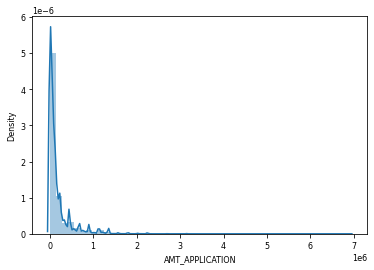

In [270]:
#Plotting the distribution of amt of credit the client asked in previous application
sns.distplot(previous['AMT_APPLICATION'])
plt.show()

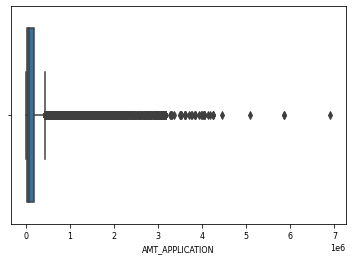

In [271]:
# Plotting Boxplot to check for outliers in AMT_APPLICATION in previous dataset
sns.boxplot(previous['AMT_APPLICATION'])
plt.show()

- In certain loan applications client had requested for huge loan amounts

In [272]:
#checking values in the column NAME_CONTRACT_TYPE
previous["NAME_CONTRACT_STATUS"].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [273]:
previous["NAME_CONTRACT_STATUS"].value_counts(normalize=True)

Approved        0.620747
Canceled        0.189388
Refused         0.174036
Unused offer    0.015828
Name: NAME_CONTRACT_STATUS, dtype: float64

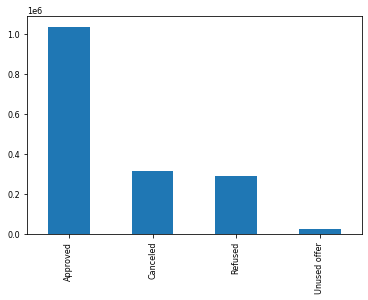

In [274]:
#Exploring the values in the categorical column NAME_CONTRACT_STATUS
previous["NAME_CONTRACT_STATUS"].value_counts().plot.bar()
plt.show()

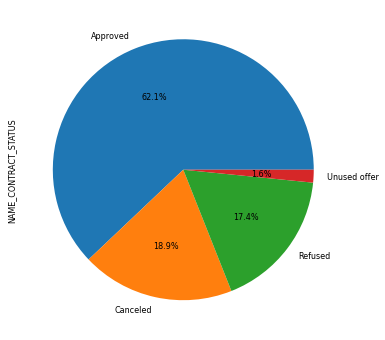

In [275]:
#Piechart to see percentage distribution of the column NAME_CONTRACT_STATUS in previous dataset
plt.figure(figsize=(6,6))
previous["NAME_CONTRACT_STATUS"].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

**62% of previous loan applications were approved**

In [276]:
# Review values in CODE_REJECT_REASON column
previous["CODE_REJECT_REASON"].value_counts()

XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

In [277]:

# Review values in NAME_PAYMENT_TYPE column
previous["NAME_PAYMENT_TYPE"].value_counts()

Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

## Merging the two datasets

In [278]:
# merging previous application data with the subset of the application data frame
df_merged=pd.merge(left=app,right=previous,how='inner',on='SK_ID_CURR',suffixes=('_new','_prev'))
df_merged.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_new CODE_GENDER FLAG_OWN_CAR  \
0      100002       1             Cash loans           M            N   
1      100003       0             Cash loans           F            N   
2      100003       0             Cash loans           F            N   
3      100003       0             Cash loans           F            N   
4      100004       0        Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_new  \
0               Y             0          202500.0        406597.5   
1               N             0          270000.0       1293502.5   
2               N             0          270000.0       1293502.5   
3               N             0          270000.0       1293502.5   
4               Y             0           67500.0        135000.0   

   AMT_ANNUITY_new  AMT_GOODS_PRICE_new NAME_TYPE_SUITE_new NAME_INCOME_TYPE  \
0          24700.5             351000.0       Unaccompanied          Working   
1          35698.5            1129500.0              Family    State servant   
2          35698.5            1129500.0              Family    State servant   
3          35698.5            1129500.0              Family    State servant   
4           6750.0             135000.0       Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.003541       16765           1188             1186.0   
3                    0.003541       16765           1188             1186.0   
4                    0.010032       19046            225             4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2             -291           1               1                0   
3             -291           1               1                0   
4            -2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0      Core staff              2.0   
3                 1           1           0      Core staff              2.0   
4                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_new  HOUR_APPR_PROCESS_START_new  \
0                      WEDNESDAY                           10   
1                         MONDAY                           11   
2                         MONDAY                           11   
3                         MONDAY                           11   
4                         MONDAY                            9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0

In [279]:
df_merged.shape

(1413701, 125)

In [280]:
df_merged.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 125 columns):
 #   Column                           Dtype   
---  ------                           -----   
 0   SK_ID_CURR                       int64   
 1   TARGET                           int64   
 2   NAME_CONTRACT_TYPE_new           object  
 3   CODE_GENDER                      object  
 4   FLAG_OWN_CAR                     object  
 5   FLAG_OWN_REALTY                  object  
 6   CNT_CHILDREN                     int64   
 7   AMT_INCOME_TOTAL                 float64 
 8   AMT_CREDIT_new                   float64 
 9   AMT_ANNUITY_new                  float64 
 10  AMT_GOODS_PRICE_new              float64 
 11  NAME_TYPE_SUITE_new              object  
 12  NAME_INCOME_TYPE                 object  
 13  NAME_EDUCATION_TYPE              object  
 14  NAME_FAMILY_STATUS               object  
 15  NAME_HOUSING_TYPE                object  
 16  REGION_POPULATION_RELATIVE       fl

In [281]:
df_merged.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_new', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_new', 'AMT_ANNUITY_new',
       ...
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object', length=125)

### Analyzing Merged Data frame

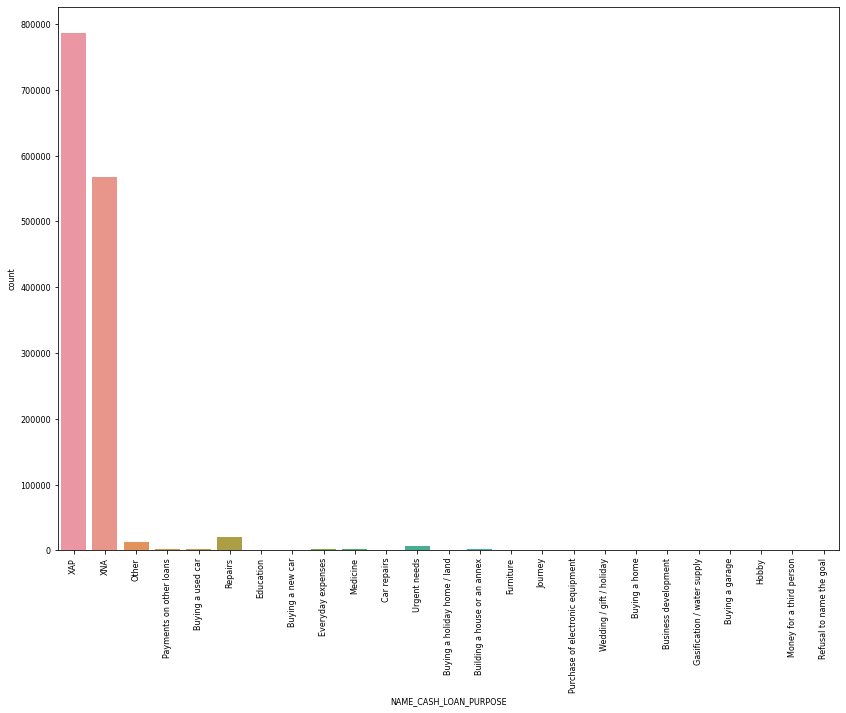

In [282]:
#analyzing NAME_CASH_LOAN_PURPOSE Column
plt.figure(figsize=(14,10))

sns.countplot(data=df_merged, x="NAME_CASH_LOAN_PURPOSE")
plt.xticks(rotation=90)
plt.show()

#### Observation

Clients seeking loan, for previous applications
- Most of NAME_CASH_LOAN_PURPOSE was of XAP, XNA category. Earlier we had seen most of them were refused.
- Most loans were previously taken for Repairs


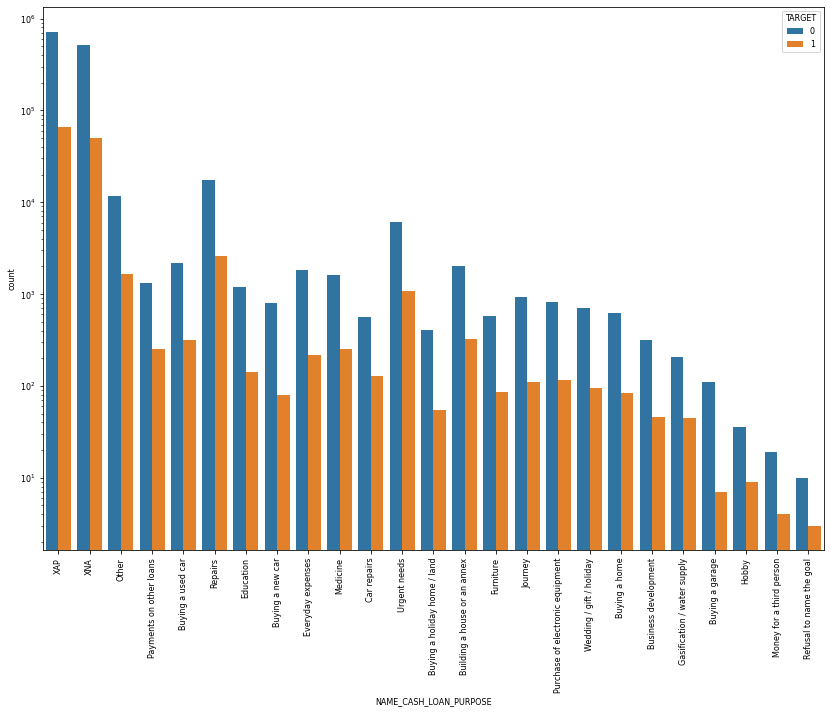

In [283]:
# Analyzing CASH LOAN PURPOSE for different type of clients 
plt.figure(figsize=(14,10))
sns.countplot(x=df_merged["NAME_CASH_LOAN_PURPOSE"],hue=df_merged["TARGET"])
plt.yscale("log")
plt.xticks(rotation=90)
plt.show()

**Observations**
- Clients who took loans for XAP,XNA and repair defaulted more for payments previously
- Clients who refused to mention goal of loan taken previously defaulted the least.


In [284]:
# Checking NAME_CONTRACT_STATUS in merged dataframe

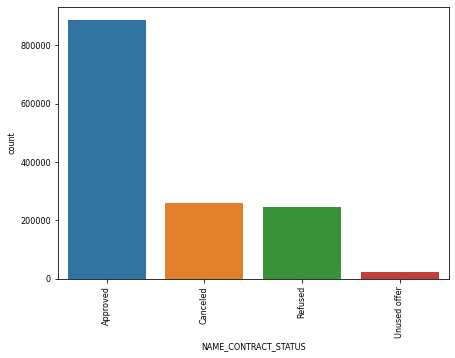

In [285]:
#Plotting countplot to know occurrences for each category
plt.figure(figsize=(7,5))

sns.countplot(data=df_merged, x="NAME_CONTRACT_STATUS")
plt.xticks(rotation=90)
plt.show()

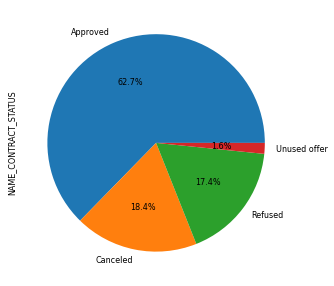

In [286]:
plt.figure(figsize=(7,5))
df_merged['NAME_CONTRACT_STATUS'].value_counts().plot.pie(autopct="%1.1f%%")
plt.xticks(rotation=90)
plt.show()

**Observations**
- Loan application for 62% of previous clients were approved
- 17.4% applications of previous clients were refused

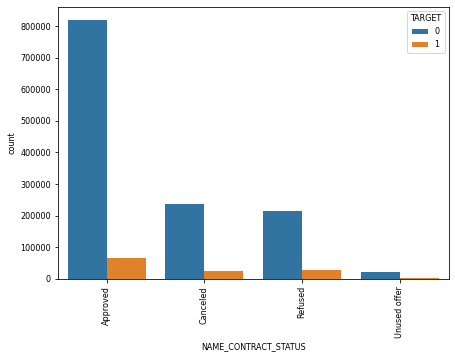

In [287]:
#Plotting countplot to know occurrences for each category for both category of clients
plt.figure(figsize=(7,5))

sns.countplot(data=df_merged, x="NAME_CONTRACT_STATUS", hue="TARGET")
plt.xticks(rotation=90)
plt.show()

**Observations**
-  Clients who had Loans were previously approved defaulted very less

In [288]:

col=['NAME_CONTRACT_STATUS','TARGET']
df_merged[col].value_counts(normalize=True)


NAME_CONTRACT_STATUS  TARGET
Approved              0         0.579229
Canceled              0         0.166684
Refused               0         0.152756
Approved              1         0.047565
Refused               1         0.020823
Canceled              1         0.016835
Unused offer          0         0.014778
                      1         0.001329
dtype: float64

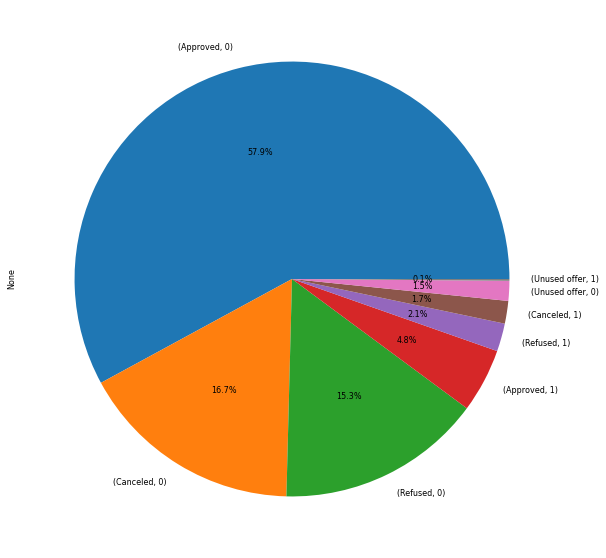

In [289]:
plt.figure(figsize=(15,10))
col=['NAME_CONTRACT_STATUS','TARGET']
df_merged[col].value_counts(normalize=True).plot.pie(autopct="%.1f%%")
plt.show()
                                                    

**Observations**
- 57.9% of clients with no payment difficulties had their previous loans approved
- 4.8% of clients with payment difficulties had their previous loan approved
- 2.1% of clients whose previous loan application was refused have payment difficulties
- 15.3% of clients with no payment difficulties were refused in their previous applications

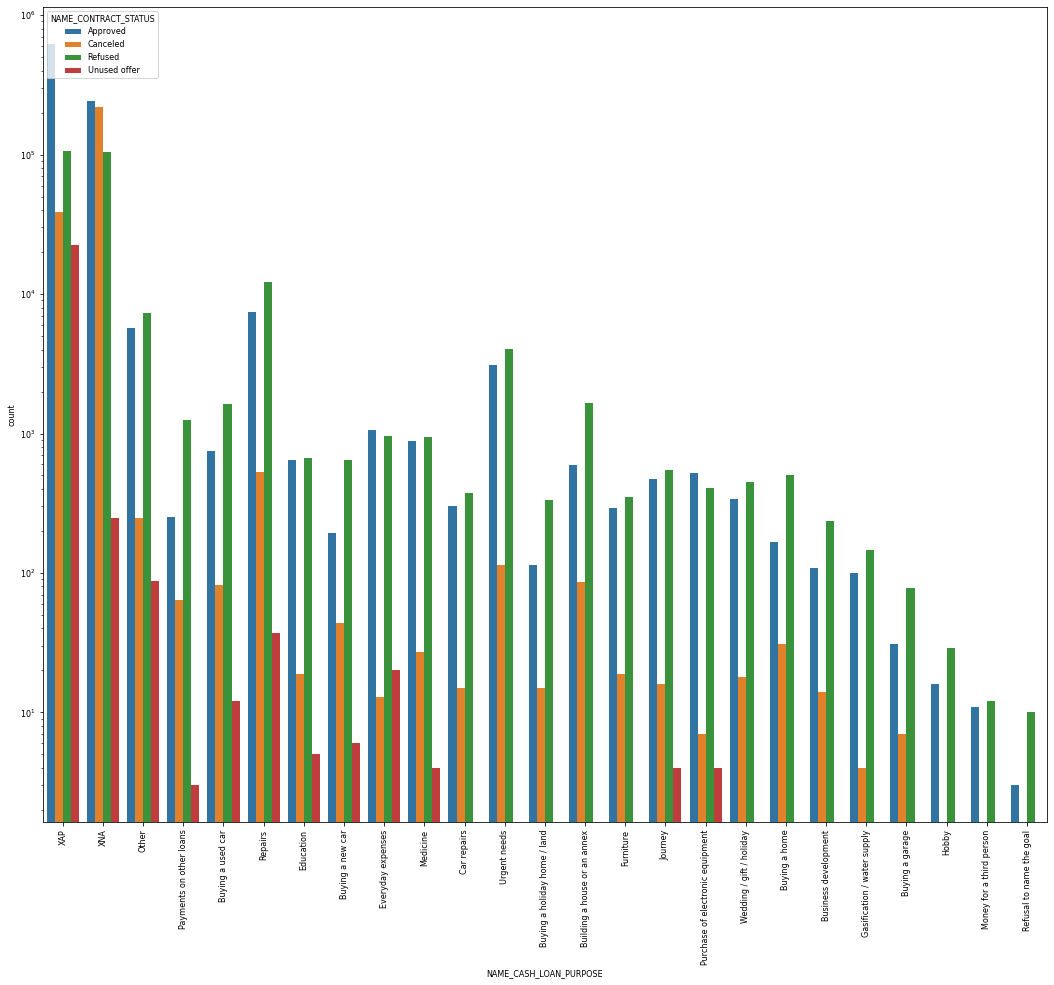

In [290]:
#analyzing NAME_CASH_LOAN_PURPOSE Column
plt.figure(figsize=(18,15))
plt.yscale("log")
sns.countplot(data=df_merged, x="NAME_CASH_LOAN_PURPOSE",hue="NAME_CONTRACT_STATUS")
plt.xticks(rotation=90)
#df_merged["NAME_CASH_LOAN_PURPOSE"].value_counts().plot.bar()
plt.show()

**Observations**

Among Clients previously applying for loan
- There were more refusals to loan requests payment on other loans, for buying a holiday home/land, buying a house, hobby , business development, buying a garage, or refusing to state the goal

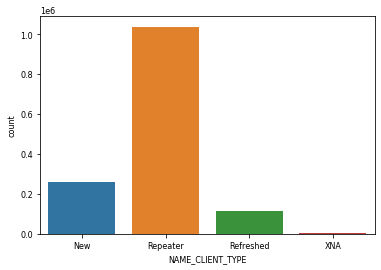

In [291]:
# NAME_CLIENT_TYPE of clients
sns.countplot(df_merged['NAME_CLIENT_TYPE'])
plt.show()

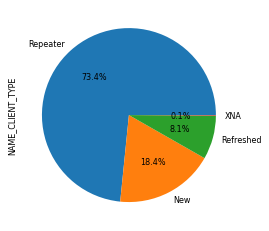

In [292]:
# Percentage of clients type
df_merged['NAME_CLIENT_TYPE'].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

**Observations**

- 73.4 % clients applying were Repeaters
- 8.1 % clients were Refreshed
- 18.4% were New

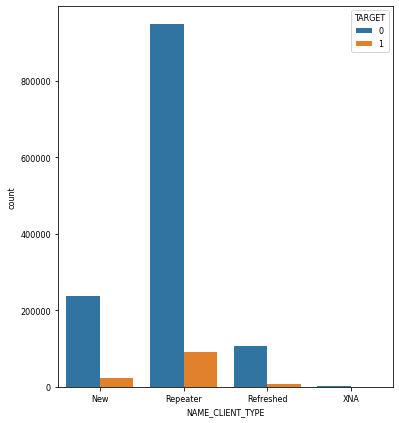

In [293]:
# Percentage of clients type for target=0 and 1
plt.figure(figsize=(6,7))
sns.countplot(data=df_merged, x='NAME_CLIENT_TYPE',hue='TARGET')
plt.show()

**Observations**
-  Repeater clients were majorly non defaulters

### Previously approved applications analysis

In [294]:
# Creating a dataframe of approved clients to get more insights of data
approved=df_merged[df_merged['NAME_CONTRACT_STATUS']=='Approved']
approved.head()  

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_new CODE_GENDER FLAG_OWN_CAR  \
0      100002       1             Cash loans           M            N   
1      100003       0             Cash loans           F            N   
2      100003       0             Cash loans           F            N   
3      100003       0             Cash loans           F            N   
4      100004       0        Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_new  \
0               Y             0          202500.0        406597.5   
1               N             0          270000.0       1293502.5   
2               N             0          270000.0       1293502.5   
3               N             0          270000.0       1293502.5   
4               Y             0           67500.0        135000.0   

   AMT_ANNUITY_new  AMT_GOODS_PRICE_new NAME_TYPE_SUITE_new NAME_INCOME_TYPE  \
0          24700.5             351000.0       Unaccompanied          Working   
1          35698.5            1129500.0              Family    State servant   
2          35698.5            1129500.0              Family    State servant   
3          35698.5            1129500.0              Family    State servant   
4           6750.0             135000.0       Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.003541       16765           1188             1186.0   
3                    0.003541       16765           1188             1186.0   
4                    0.010032       19046            225             4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2             -291           1               1                0   
3             -291           1               1                0   
4            -2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0      Core staff              2.0   
3                 1           1           0      Core staff              2.0   
4                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_new  HOUR_APPR_PROCESS_START_new  \
0                      WEDNESDAY                           10   
1                         MONDAY                           11   
2                         MONDAY                           11   
3                         MONDAY                           11   
4                         MONDAY                            9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0

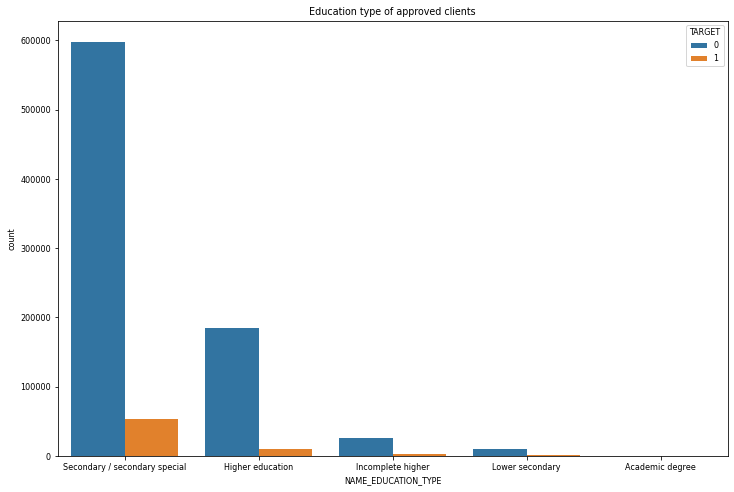

In [295]:
plt.figure(figsize=(12,8))
plt.title('Education type of approved clients')
sns.countplot(data=approved ,x='NAME_EDUCATION_TYPE',hue='TARGET')
plt.show() 

**Observations**
- Majorly Clients whose previous application was approved had educational level of Secondary/Secondary Special

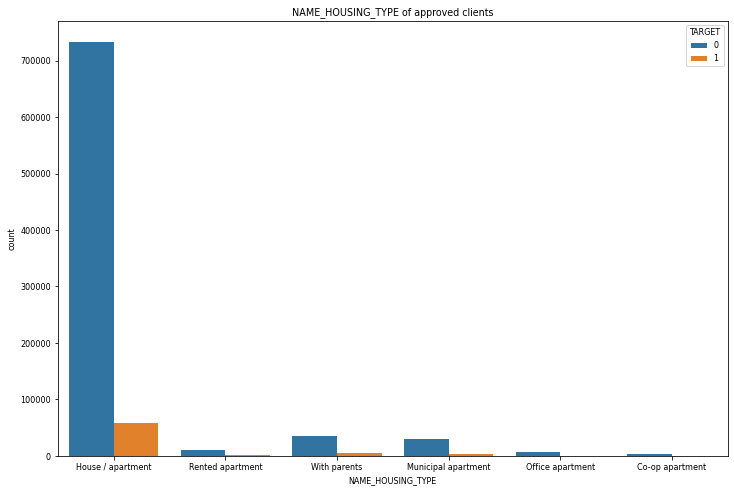

In [296]:
#NAME_HOUSING_TYPE of approved clients
plt.figure(figsize=(12,8))
plt.title('NAME_HOUSING_TYPE of approved clients')
sns.countplot(data=approved ,x='NAME_HOUSING_TYPE',hue='TARGET')
plt.show()

**We observed that approved clients had housing type of House/apartment**

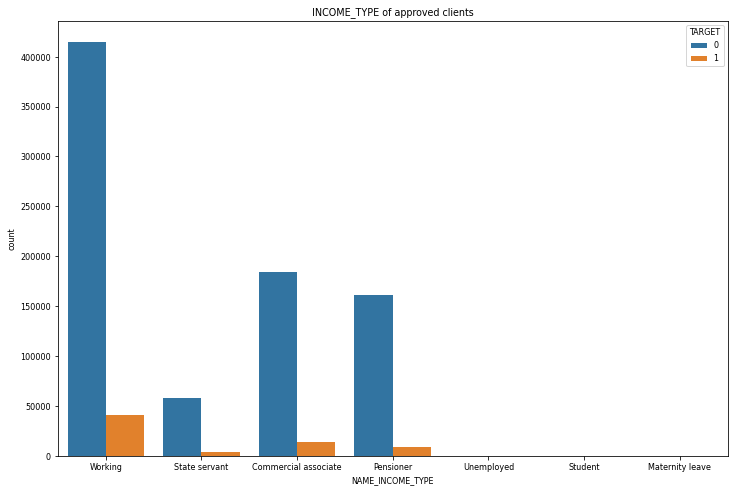

In [297]:
# Plotting INCOME_TYPE of approved clients
plt.figure(figsize=(12,8))
plt.title('INCOME_TYPE of approved clients')
sns.countplot(data=approved ,x='NAME_INCOME_TYPE',hue='TARGET')
plt.show()

**Aproved Clients mostly belonged to the working income type category**

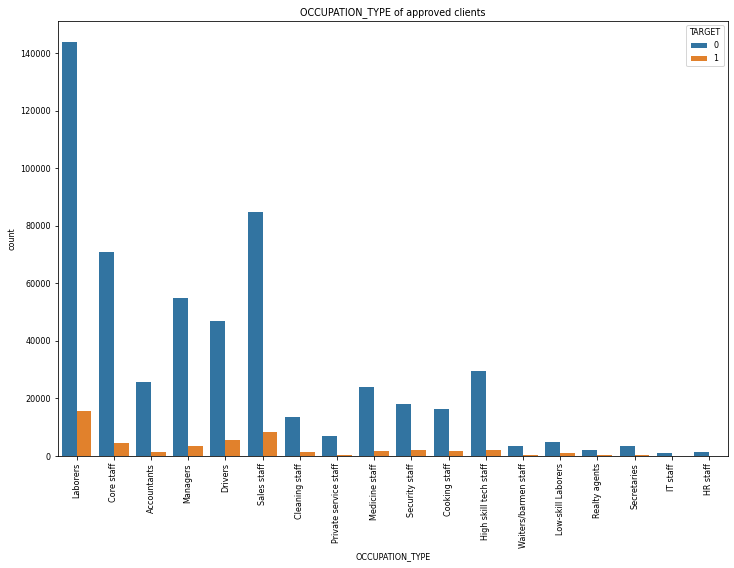

In [298]:
# Checking occupation type of clients previously approved
plt.figure(figsize=(12,8))
plt.title('OCCUPATION_TYPE of approved clients')
sns.countplot(data=approved ,x='OCCUPATION_TYPE',hue='TARGET')
plt.xticks(rotation=90)
plt.show()

- Majority of approved clients had occuptation type of laborers

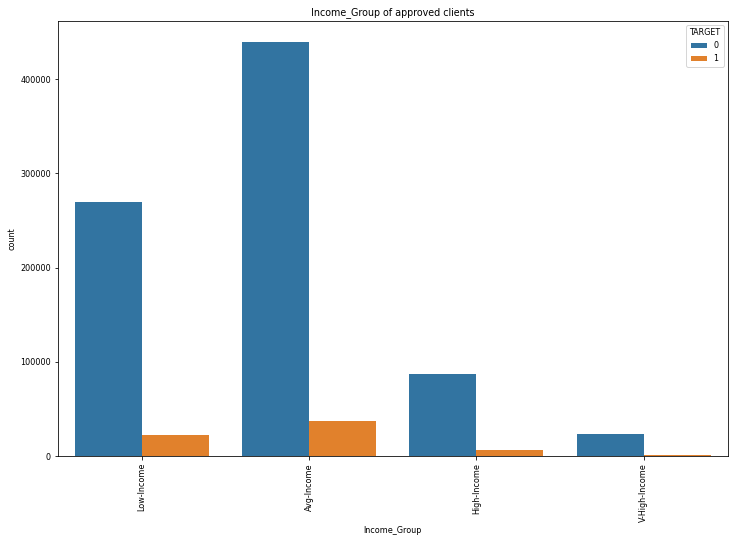

In [299]:
# Checking Income group of clients previously approved
plt.figure(figsize=(12,8))
plt.title('Income_Group of approved clients')
sns.countplot(data=approved ,x='Income_Group',hue='TARGET')
plt.xticks(rotation=90)
plt.show()

- Majority of the clients of previously approved belong to the Avg Income Group

### Previously 'cancelled' applications analysis

In [300]:
# Creating a dataframe of 'canceled' clients to get more insights of data
canceled=df_merged[df_merged['NAME_CONTRACT_STATUS']=='Canceled']
canceled.head()  

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_new CODE_GENDER FLAG_OWN_CAR  \
6       100006       0             Cash loans           F            N   
10      100006       0             Cash loans           F            N   
12      100006       0             Cash loans           F            N   
21      100008       0             Cash loans           M            N   
40      100012       0        Revolving loans           M            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_new  \
6                Y             0          135000.0        312682.5   
10               Y             0          135000.0        312682.5   
12               Y             0          135000.0        312682.5   
21               Y             0           99000.0        490495.5   
40               Y             0          135000.0        405000.0   

    AMT_ANNUITY_new  AMT_GOODS_PRICE_new NAME_TYPE_SUITE_new NAME_INCOME_TYPE  \
6           29686.5             297000.0       Unaccompanied          Working   
10          29686.5             297000.0       Unaccompanied          Working   
12          29686.5             297000.0       Unaccompanied          Working   
21          27517.5             454500.0     Spouse, partner    State servant   
40          20250.0             405000.0       Unaccompanied          Working   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
6   Secondary / secondary special        Civil marriage  House / apartment   
10  Secondary / secondary special        Civil marriage  House / apartment   
12  Secondary / secondary special        Civil marriage  House / apartment   
21  Secondary / secondary special               Married  House / apartment   
40  Secondary / secondary special  Single / not married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
6                     0.008019       19005           3039             9833.0   
10                    0.008019       19005           3039             9833.0   
12                    0.008019       19005           3039             9833.0   
21                    0.035792       16941           1588             4970.0   
40                    0.019689       14469           2019            14437.0   

    DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
6             -2437           1               1                0   
10            -2437           1               1                0   
12            -2437           1               1                0   
21             -477           1               1                1   
40            -3992           1               1                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
6                  1           0           0        Laborers              2.0   
10                 1           0           0        Laborers              2.0   
12                 1           0           0        Laborers              2.0   
21                 1           1           0        Laborers              2.0   
40                 1           0           0        Laborers              1.0   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
6                      2                            2   
10                     2                            2   
12                     2                            2   
21                     2                            2   
40                     2                            2   

   WEEKDAY_APPR_PROCESS_START_new  HOUR_APPR_PROCESS_START_new  \
6                       WEDNESDAY                           17   
10                      WEDNESDAY                           17   
12                      WEDNESDAY                           17   
21                      WEDNESDAY                           16   
40                       THURSDAY                            8   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
6  

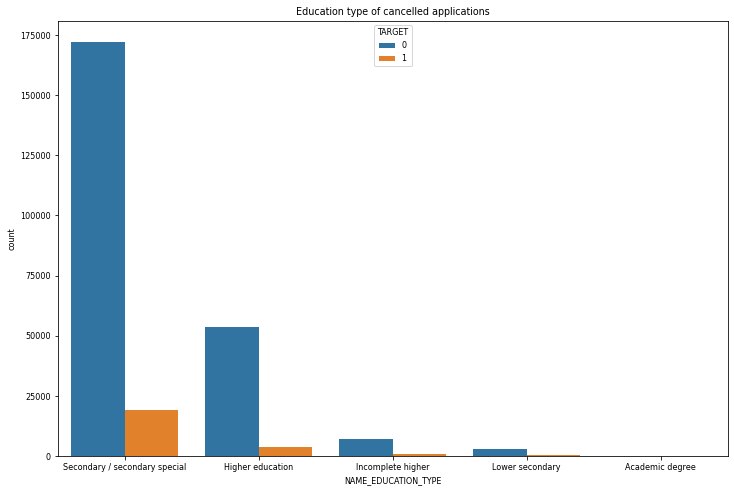

In [301]:
plt.figure(figsize=(12,8))
plt.title('Education type of cancelled applications')
sns.countplot(data=canceled ,x='NAME_EDUCATION_TYPE',hue='TARGET')
plt.show() 

**Observations**
- Majorly Clients whose previous application was cancelled had educational level of Secondary/Secondary Special

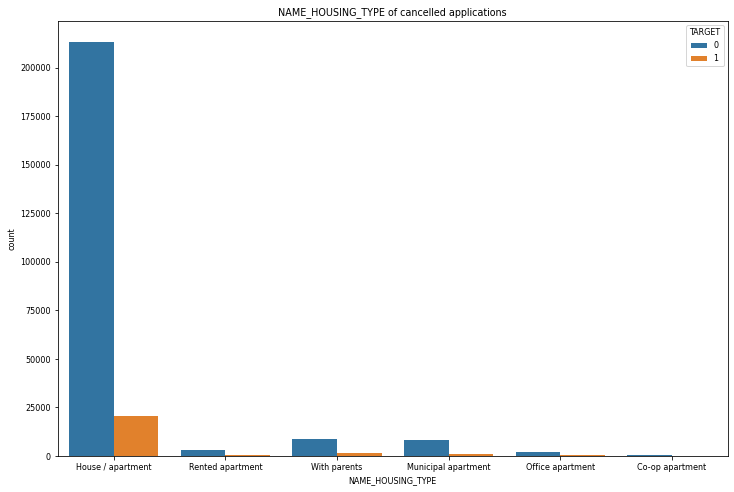

In [302]:
#Plotting HOUSING_TYPE of cancelled applications
plt.figure(figsize=(12,8))
plt.title('NAME_HOUSING_TYPE of cancelled applications')
sns.countplot(data=canceled ,x='NAME_HOUSING_TYPE',hue='TARGET')
plt.show()

**We observed that Cancelled clients had housing type of House/apartment**

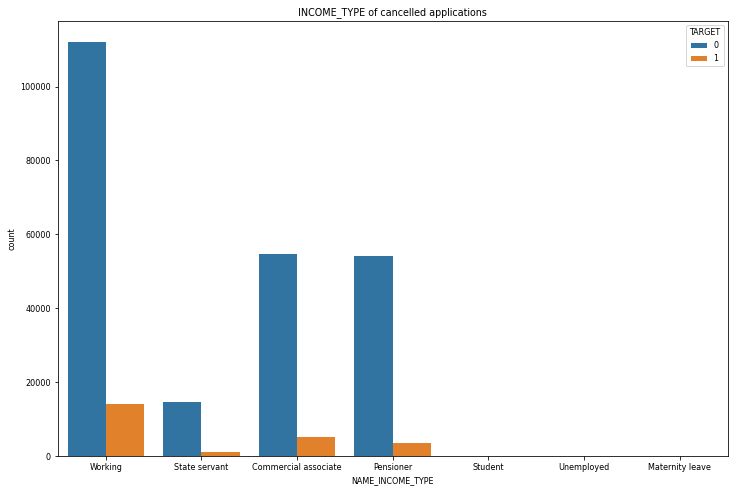

In [303]:
#Bar plot for INCOME_TYPE of cancelled applications
plt.figure(figsize=(12,8))
plt.title('INCOME_TYPE of cancelled applications')
sns.countplot(data=canceled ,x='NAME_INCOME_TYPE',hue='TARGET')
plt.show()

**Canclled applications mostly belonged to the working income type category**

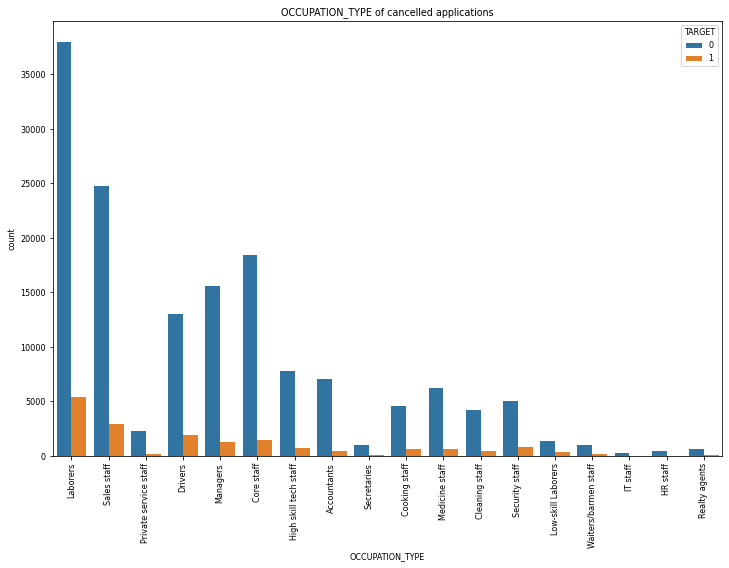

In [304]:
# Checking occupation type of previously canceled applications
plt.figure(figsize=(12,8))
plt.title('OCCUPATION_TYPE of cancelled applications')
sns.countplot(data=canceled ,x='OCCUPATION_TYPE',hue='TARGET')
plt.xticks(rotation=90)
plt.show()

- Majority of Cancelled applications had occuptation type of laborers

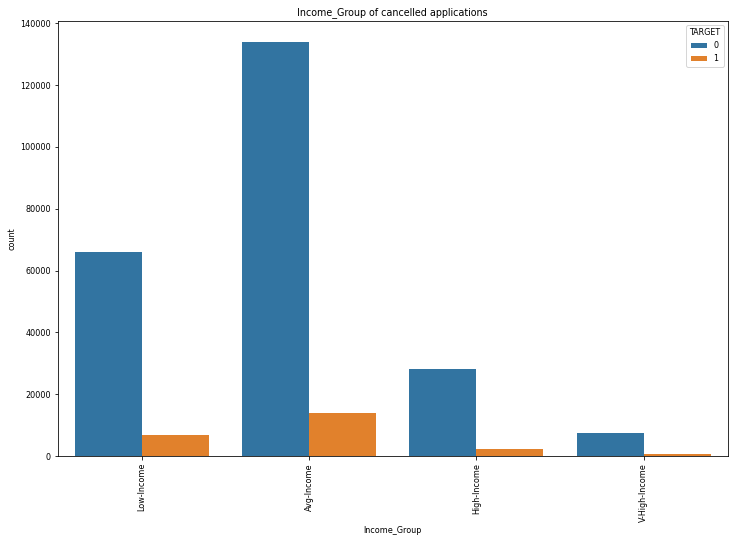

In [305]:
# Checking Income group of previously cancelled applications
plt.figure(figsize=(12,8))
plt.title('Income_Group of cancelled applications')
sns.countplot(data=canceled ,x='Income_Group',hue='TARGET')
plt.xticks(rotation=90)
plt.show()

- Majority of the previously cancelled applications belong to the Avg Income Group

### Previously 'Unused offer' applications analysis

In [306]:
# Creating a dataframe of unused offer applications to get more insights of data
unused=df_merged[df_merged['NAME_CONTRACT_STATUS']=='Unused offer']
unused.head()  

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_new CODE_GENDER FLAG_OWN_CAR  \
222      100061       0             Cash loans           F            N   
358      100086       0             Cash loans           F            N   
383      100093       0             Cash loans           F            N   
463      100116       0             Cash loans           F            N   
465      100116       0             Cash loans           F            N   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_new  \
222               Y             2          225000.0        314055.0   
358               Y             1          135000.0        675000.0   
383               Y             1           94500.0        585000.0   
463               Y             0          243000.0        900000.0   
465               Y             0          243000.0        900000.0   

     AMT_ANNUITY_new  AMT_GOODS_PRICE_new NAME_TYPE_SUITE_new  \
222          16164.0             238500.0       Unaccompanied   
358          21775.5             675000.0       Unaccompanied   
383          28273.5             585000.0       Unaccompanied   
463          32017.5             900000.0       Unaccompanied   
465          32017.5             900000.0       Unaccompanied   

         NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
222  Commercial associate               Higher education            Married   
358  Commercial associate               Higher education              Widow   
383               Working  Secondary / secondary special            Married   
463               Working               Higher education            Married   
465               Working               Higher education            Married   

     NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
222  House / apartment                    0.006629       10473           1392   
358  House / apartment                    0.019101       14264           2492   
383  House / apartment                    0.028663       18253            721   
463  House / apartment                    0.010006       14751           6737   
465  House / apartment                    0.010006       14751           6737   

     DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
222             2025.0            -1240           1               1   
358             4327.0            -4517           1               1   
383             1701.0            -1779           1               1   
463             3390.0            -4788           1               1   
465             3390.0            -4788           1               1   

     FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
222                0                 1           0           0   
358                0                 1           0           0   
383                0                 1           1           0   
463                0                 1           0           1   
465                0                 1           0           1   

    OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
222      Core staff              4.0                     2   
358        Laborers              2.0                     2   
383      Core staff              3.0                     2   
463      Core staff              2.0                     2   
465      Core staff              2.0                     2   

     REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_new  \
222                            2                       THURSDAY   
358                            2                       THURSDAY   
383                            2                        TUESDAY   
463                            1                       THURSDAY   
465                            1                       THURSDAY   

     HOUR_APPR_PROCESS_START_new  REG_REGION_NOT_LIVE_REGION  \
222                            3                           0   
358                           12              

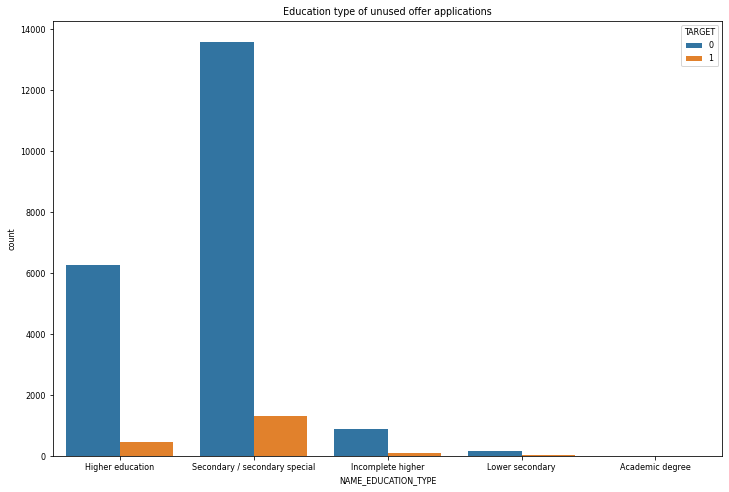

In [307]:
# Checking education level of previous applications that were 'unused offer'
plt.figure(figsize=(12,8))
plt.title('Education type of unused offer applications')
sns.countplot(data=unused ,x='NAME_EDUCATION_TYPE',hue='TARGET')
plt.show() 

**Observations**
- Majorly of previous application approved, but unused the offer had educational level of Secondary/Secondary Special

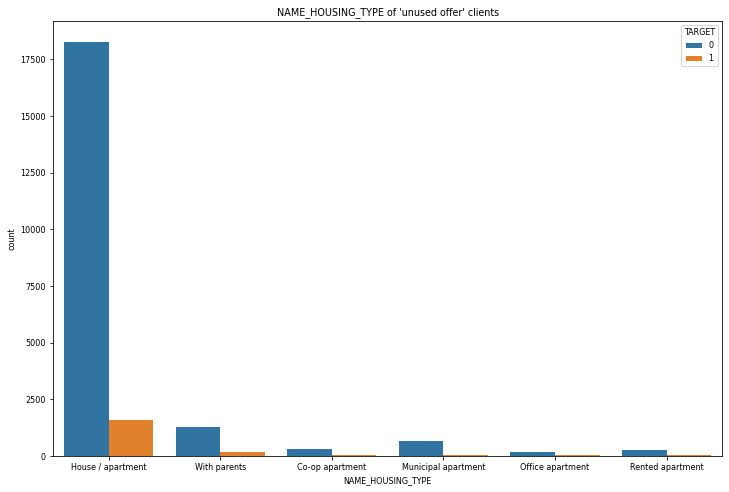

In [308]:
#HOUSING_TYPE of 'unused offer' clients
plt.figure(figsize=(12,8))
plt.title("NAME_HOUSING_TYPE of 'unused offer' clients")
sns.countplot(data=unused ,x='NAME_HOUSING_TYPE',hue='TARGET')
plt.show()

**We observed that approved but unused the offer, had housing type of House/apartment. They were non defaulters**

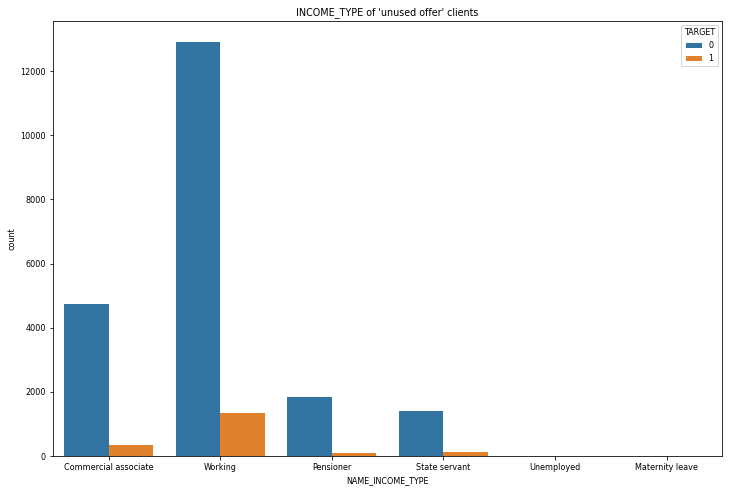

In [309]:
#plotting INCOME_TYPE of 'unused offer' clients
plt.figure(figsize=(12,8))
plt.title("INCOME_TYPE of 'unused offer' clients")
sns.countplot(data=unused ,x='NAME_INCOME_TYPE',hue='TARGET')
plt.show()

**Approved but unused offer in the previous applications, mostly belonged to the working income type category**

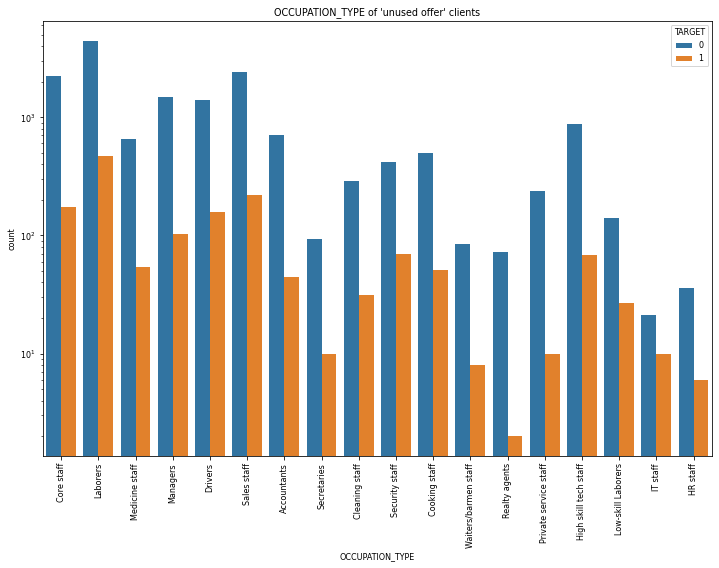

In [310]:
# Checking occupation type of clients previously approved, but 'unused offer'
plt.figure(figsize=(12,8))
plt.title("OCCUPATION_TYPE of 'unused offer' clients")
sns.countplot(data=unused ,x='OCCUPATION_TYPE',hue='TARGET')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

- Majority of approved but offer unused applications had occuptation type of laborers

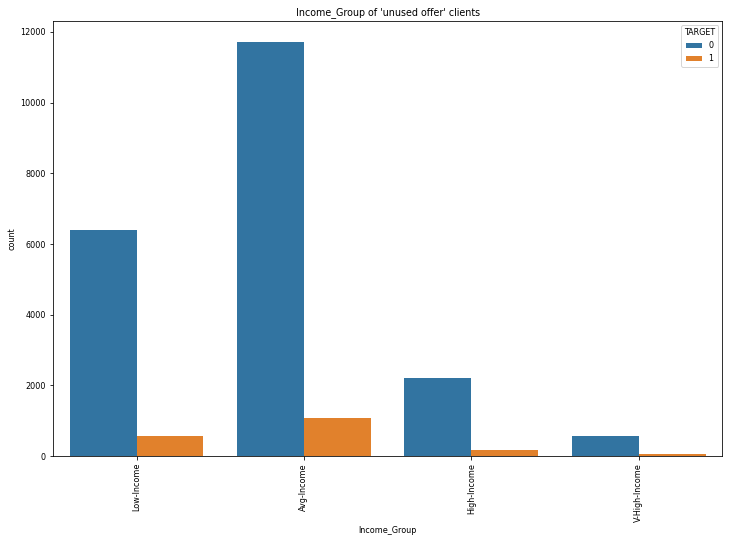

In [311]:
# Checking Income group of clients previously approved, but 'unused offer'
plt.figure(figsize=(12,8))
plt.title("Income_Group of 'unused offer' clients")
sns.countplot(data=unused ,x='Income_Group',hue='TARGET')
plt.xticks(rotation=90)
plt.show()

- Majority of the applications of previously approved but unused the offer belong to the Avg Income Group

### Analyzing data of clients previously refused loan

In [312]:
# Creating a dataframe of refused clients to get more insights of data
refused=df_merged[df_merged['NAME_CONTRACT_STATUS']=='Refused']
refused.head()  

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_new CODE_GENDER FLAG_OWN_CAR  \
13      100006       0             Cash loans           F            N   
33      100011       0             Cash loans           F            N   
79      100027       0             Cash loans           F            N   
84      100030       0             Cash loans           F            N   
85      100030       0             Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_new  \
13               Y             0          135000.0        312682.5   
33               Y             0          112500.0       1019610.0   
79               Y             0           83250.0        239850.0   
84               Y             0           90000.0        225000.0   
85               Y             0           90000.0        225000.0   

    AMT_ANNUITY_new  AMT_GOODS_PRICE_new NAME_TYPE_SUITE_new NAME_INCOME_TYPE  \
13          29686.5             297000.0       Unaccompanied          Working   
33          33826.5             913500.0            Children        Pensioner   
79          23850.0             225000.0       Unaccompanied        Pensioner   
84          11074.5             225000.0       Unaccompanied          Working   
85          11074.5             225000.0       Unaccompanied          Working   

              NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
13  Secondary / secondary special     Civil marriage  House / apartment   
33  Secondary / secondary special            Married  House / apartment   
79  Secondary / secondary special            Married  House / apartment   
84  Secondary / secondary special            Married  House / apartment   
85  Secondary / secondary special            Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
13                    0.008019       19005           3039             9833.0   
33                    0.018634       20099         365243             7427.0   
79                    0.006296       24827         365243             9012.0   
84                    0.028663       19334           3494             2419.0   
85                    0.028663       19334           3494             2419.0   

    DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
13            -2437           1               1                0   
33            -3514           1               0                0   
79            -3684           1               0                0   
84            -2893           1               1                0   
85            -2893           1               1                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
13                 1           0           0        Laborers              2.0   
33                 1           0           0             NaN              2.0   
79                 1           1           0             NaN              2.0   
84                 1           1           0  Cleaning staff              2.0   
85                 1           1           0  Cleaning staff              2.0   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
13                     2                            2   
33                     2                            2   
79                     3                            3   
84                     2                            2   
85                     2                            2   

   WEEKDAY_APPR_PROCESS_START_new  HOUR_APPR_PROCESS_START_new  \
13                      WEDNESDAY                           17   
33                      WEDNESDAY                           14   
79                         FRIDAY                           12   
84                       SATURDAY                            8   
85                       SATURDAY                            8   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
13                   

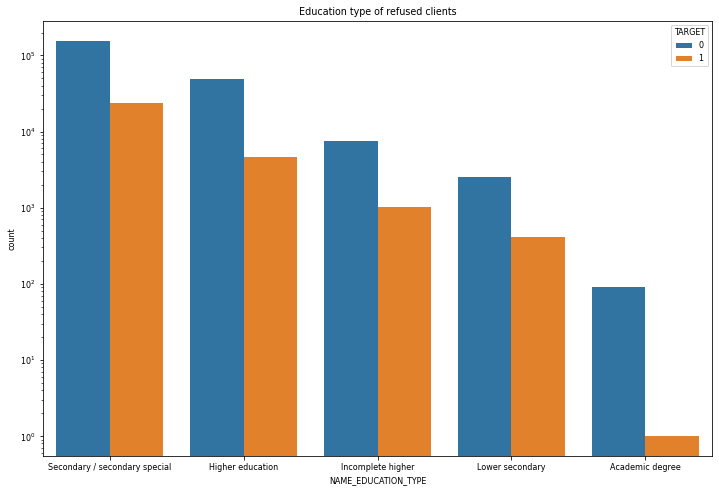

In [313]:
# Checking education level of refused clients
plt.figure(figsize=(12,8))
plt.title('Education type of refused clients')
sns.countplot(data=refused ,x='NAME_EDUCATION_TYPE',hue='TARGET')
plt.yscale('log')
plt.show() 

**Observations**
- Majorly refused applications across educational levels had higher share of default potentials.
- Percentage of refused applications with academic degree were least defaulters 

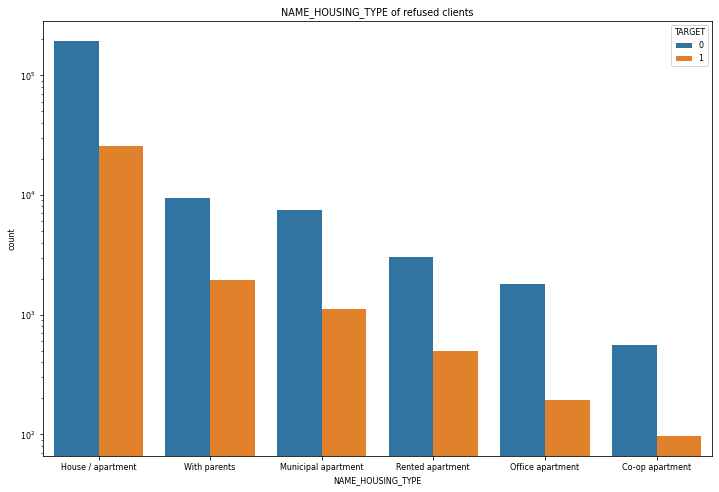

In [314]:
# Patterns of housing type of refused clients
plt.figure(figsize=(12,8))
plt.title('NAME_HOUSING_TYPE of refused clients')
sns.countplot(data=refused ,x='NAME_HOUSING_TYPE',hue='TARGET')
plt.yscale('log')
plt.show()

**Observations**
- Most of clients previously refused applications defaulting target irrespective of the accomodation
- Office apartment and Co-op apartment applicants are the least among ratio of default to others

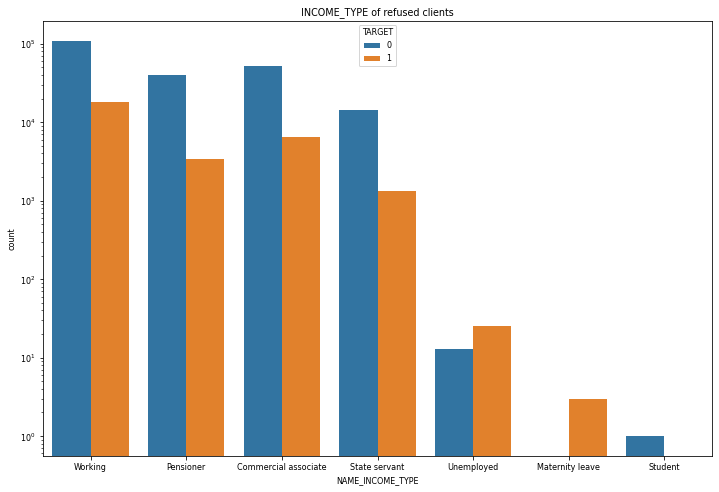

In [315]:
# Income type  of refused client
plt.figure(figsize=(12,8))
plt.title('INCOME_TYPE of refused clients')
sns.countplot(data=refused ,x='NAME_INCOME_TYPE',hue='TARGET')
plt.yscale('log')
plt.show()

**Observations**
- Clients previously refused were equally default target and others
- students prevously refused loan didnot figured in default target
- Most of applications with maternity income figured under defualt target

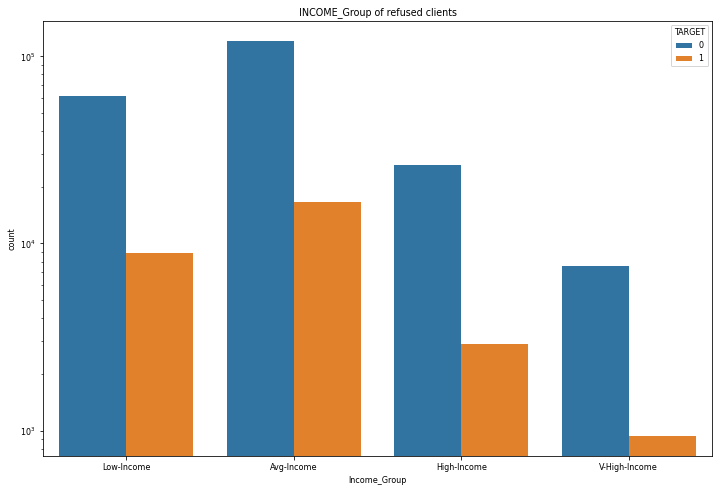

In [316]:
# Income group of refused client
plt.figure(figsize=(12,8))
plt.title('INCOME_Group of refused clients')
sns.countplot(data=refused ,x='Income_Group',hue='TARGET')
plt.yscale('log')
plt.show()

**Observations**

- Clients belong to high and v high income and were previously refused compartively were less defaulters

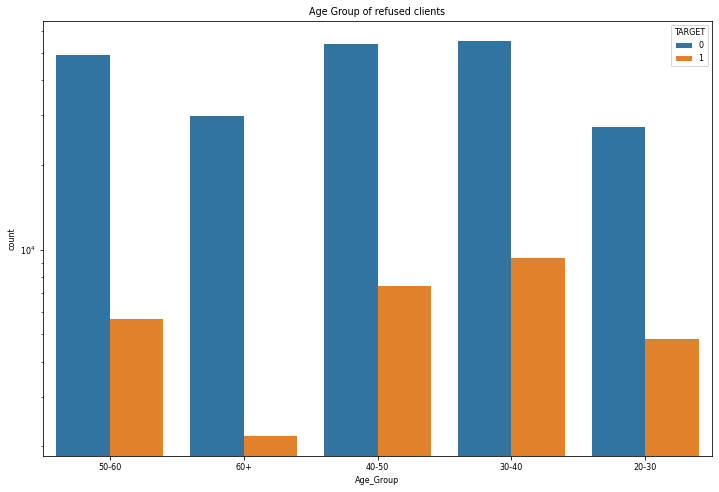

In [317]:
# Age group of refused client
plt.figure(figsize=(12,8))
plt.title('Age Group of refused clients')
sns.countplot(data=refused ,x='Age_Group',hue='TARGET')
plt.yscale('log')
plt.show()

**Observations**
- 60+ aged and previously refused clients  were compartively less defaulters

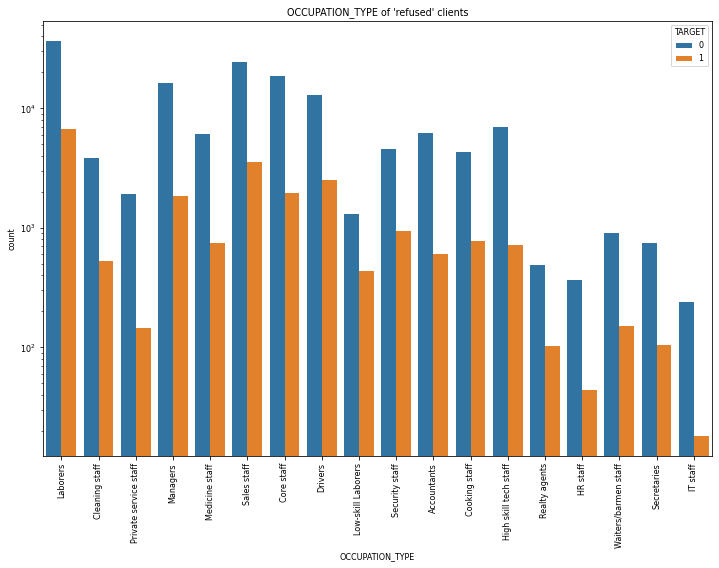

In [318]:
# Checking occupation type of clients previously refused offer
plt.figure(figsize=(12,8))
plt.title("OCCUPATION_TYPE of 'refused' clients")
sns.countplot(data=refused ,x='OCCUPATION_TYPE',hue='TARGET')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

### Bivariate analysis

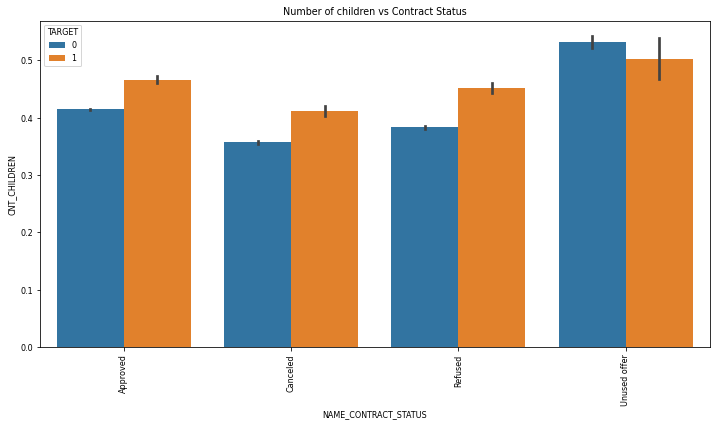

In [319]:
#Analyzing CNT_CHILDREN Vs NAME_CONTRACT_STATUS in the merged dataframe
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.barplot(data =df_merged, x='NAME_CONTRACT_STATUS',y='CNT_CHILDREN' ,hue='TARGET')
plt.title('Number of children vs Contract Status')
plt.show()

**Observations**
- count of children has marginal influence in defaulting. Not a predominant differentiator

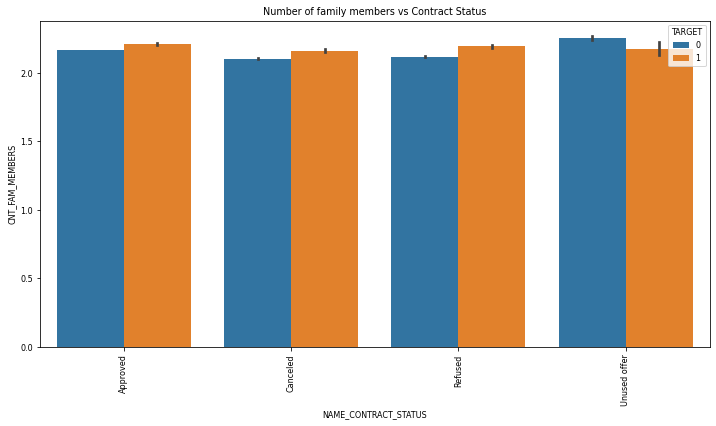

In [320]:
#Analyzing CNT_FAMILY_MEMBERS Vs NAME_CONTRACT_STATUS
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.barplot(data =df_merged, x='NAME_CONTRACT_STATUS',y='CNT_FAM_MEMBERS' ,hue='TARGET')
plt.title('Number of family members vs Contract Status')
plt.show()


- Number of family members doesnt show influence in defaulting

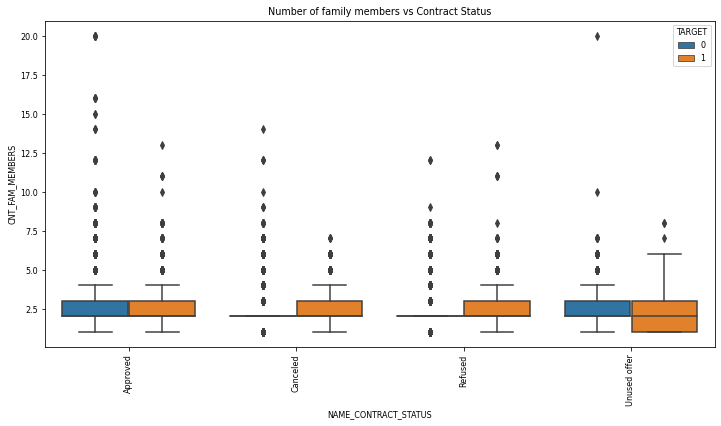

In [321]:
#Analyzing CNT_FAMILY_MEMBERS Vs NAME_CONTRACT_STATUS
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.boxplot(data =df_merged, x='NAME_CONTRACT_STATUS',y='CNT_FAM_MEMBERS' ,hue='TARGET')
plt.title('Number of family members vs Contract Status')
plt.show()


- Family members count has many outliers among different contract types.
- The statistics of family members among approved defaulters and others are similar.
- Family members count varies among those applications either cancelled or refused
- Applications with lower range of family members count and not used offer previously appear among default target

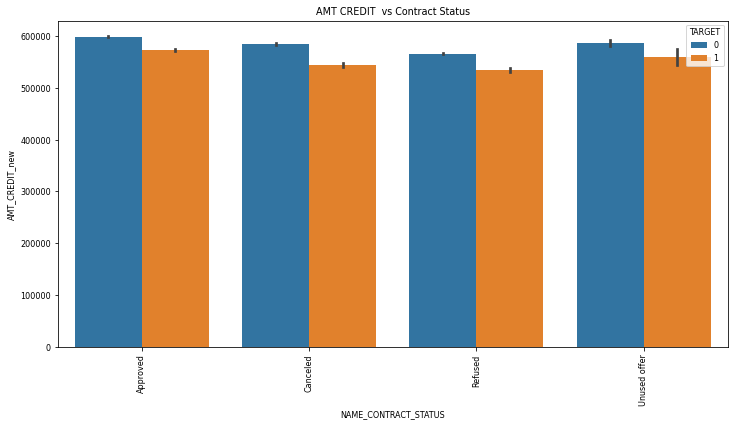

In [322]:
#Analyzing AMT_CREDIT Vs NAME_CONTRACT_STATUS
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.barplot(data =df_merged, x='NAME_CONTRACT_STATUS',y='AMT_CREDIT_new' ,hue='TARGET')
plt.title('AMT CREDIT  vs Contract Status')
plt.show()

- Credit amount not having significant influence in defaulting among all contract status 

In [323]:
#Analyzing NAME_CONTRACT_STATUS vs INCOME TYPE Vs Target

In [324]:
df_merged[['NAME_CONTRACT_STATUS','NAME_INCOME_TYPE','TARGET']].value_counts().sort_index(ascending=True)

NAME_CONTRACT_STATUS  NAME_INCOME_TYPE      TARGET
Approved              Commercial associate  0         184302
                                            1          14205
                      Maternity leave       1             10
                      Pensioner             0         161229
                                            1           8915
                      State servant         0          58134
                                            1           3496
                      Student               0             20
                      Unemployed            0             37
                                            1             31
                      Working               0         415134
                                            1          40586
Canceled              Commercial associate  0          54691
                                            1           5094
                      Maternity leave       1              2
                      Pensioner   

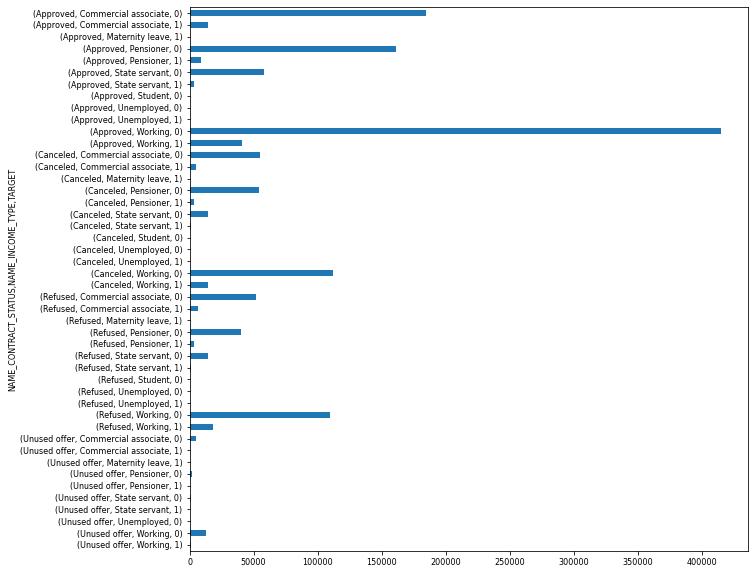

In [325]:
df_merged[['NAME_CONTRACT_STATUS','NAME_INCOME_TYPE','TARGET']].value_counts().sort_index(ascending=False).plot.barh(figsize=(10,10))
plt.show()

**Observations**
- Major loans previously approved were by working class who are non defaulters

In [326]:
#NAME_CONTRACT_STATUS vs NAME_CONTRACT_STATUS indexed on TARGET
table = pd.pivot_table(df_merged, values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_INCOME_TYPE',aggfunc='count')
table

NAME_INCOME_TYPE      Commercial associate  Maternity leave  Pensioner  \
NAME_CONTRACT_STATUS                                                     
Approved                          198507.0             10.0   170144.0   
Canceled                           59785.0              2.0    57674.0   
Refused                            58117.0              3.0    43802.0   
Unused offer                        5072.0              1.0     1924.0   

NAME_INCOME_TYPE      State servant  Student  Unemployed   Working  
NAME_CONTRACT_STATUS                                                
Approved                    61630.0     20.0        68.0  455720.0  
Canceled                    15679.0      3.0        16.0  126282.0  
Refused                     15597.0      1.0        38.0  127832.0  
Unused offer                 1518.0      NaN         1.0   14255.0

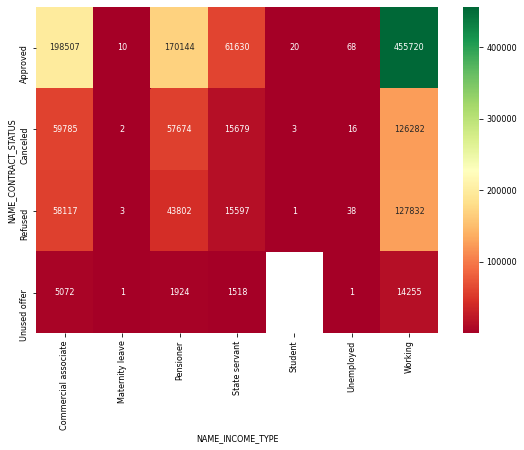

In [327]:
plt.figure(figsize=(9,6))
sns.heatmap(table,cmap='RdYlGn',annot=True,fmt='g')
plt.show()

- Most of the loans previously approved belong to the working class

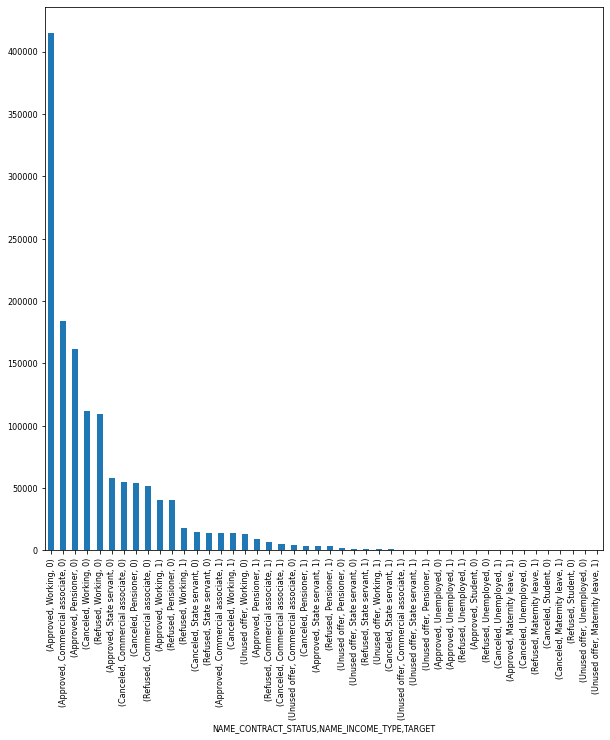

In [328]:
#Analyzing NAME_CONTRACT_STATUS','NAME_INCOME_TYPE','TARGET' in the merged dataframe
df_merged[['NAME_CONTRACT_STATUS','NAME_INCOME_TYPE','TARGET']].value_counts().plot.bar(figsize=(10,10))
#a.plot.barh(figsize=(10,10))
plt.show()

In [329]:
# FAMILY STATUS vs NAME_CONTRACT_STATUS for each category
df_merged[['NAME_CONTRACT_STATUS','NAME_FAMILY_STATUS','TARGET']].value_counts().sort_index(ascending=True)

NAME_CONTRACT_STATUS  NAME_FAMILY_STATUS    TARGET
Approved              Civil marriage        0          78961
                                            1           7866
                      Married               0         535143
                                            1          41994
                      Separated             0          52506
                                            1           4244
                      Single / not married  0         104492
                                            1          10388
                      Widow                 0          47754
                                            1           2751
Canceled              Civil marriage        0          23326
                                            1           2817
                      Married               0         152241
                                            1          14992
                      Separated             0          15047
                                  

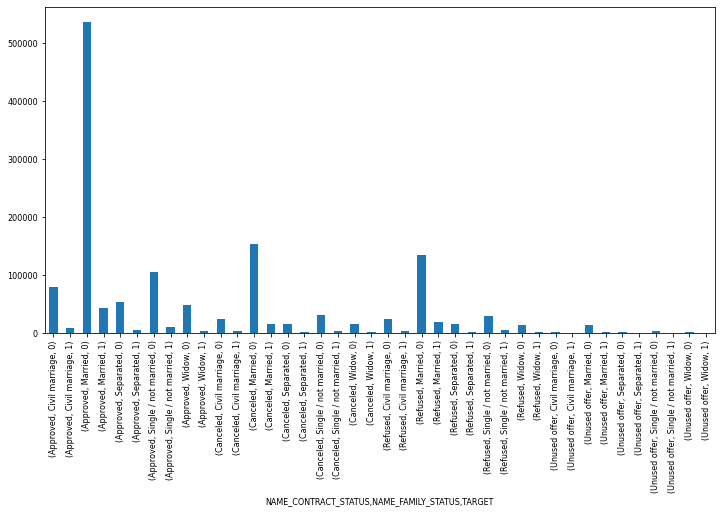

In [330]:
df_merged[['NAME_CONTRACT_STATUS','NAME_FAMILY_STATUS','TARGET']].value_counts().sort_index(ascending=True).plot.bar(figsize=(12,6))
plt.show()

**Observations**
- Married clients were majorly defaulters and non defaulters


In [331]:
table=df_merged.pivot_table(index='NAME_CONTRACT_STATUS',columns='NAME_FAMILY_STATUS',values='TARGET',aggfunc='count')
table

NAME_FAMILY_STATUS    Civil marriage  Married  Separated  \
NAME_CONTRACT_STATUS                                       
Approved                       86827   577137      56750   
Canceled                       26143   167233      16535   
Refused                        28226   152167      16453   
Unused offer                    1961    14373       1600   

NAME_FAMILY_STATUS    Single / not married  Widow  
NAME_CONTRACT_STATUS                               
Approved                            114880  50505  
Canceled                             33403  16127  
Refused                              34292  14252  
Unused offer                          4082    755

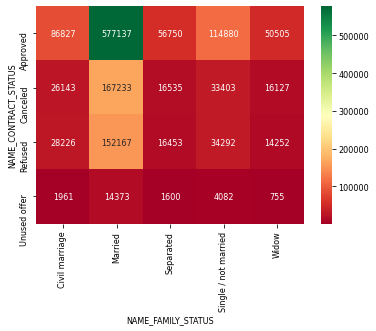

In [332]:
sns.heatmap(table, cmap='RdYlGn',annot=True,fmt='d')
plt.show()

We see a positive correlation between approved clients and their family status being Married

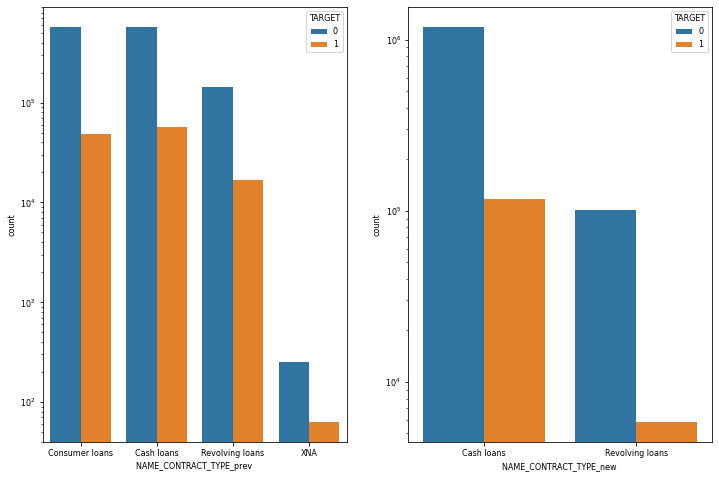

In [333]:
# NAME_CONTRACT_TYPE of client in previous and current application
plt.figure(figsize=(12,8))

plt.title('CONTRACT_TYPE of client in previous and current application')
plt.subplot(1,2,1)
sns.countplot(data=df_merged ,x='NAME_CONTRACT_TYPE_prev',hue='TARGET')
plt.yscale('log')
plt.xlabel('NAME_CONTRACT_TYPE_prev ')
plt.subplot(1,2,2)
sns.countplot(data=df_merged ,x='NAME_CONTRACT_TYPE_new',hue='TARGET')
plt.yscale('log')
plt.xlabel('NAME_CONTRACT_TYPE_new ')
plt.show()

**Observations**
- Previous Clients seeking revolving loans defaulted less
- Previous clients applied majorly for cash loans 

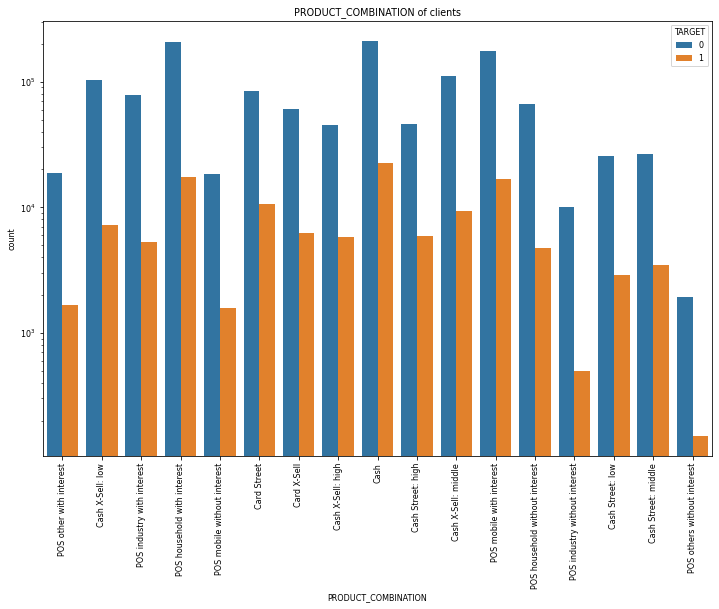

In [334]:
# Analyzing PRODUCT_COMBINATION of clients in the merged dataframe
plt.figure(figsize=(12,8))
plt.title('PRODUCT_COMBINATION of clients')
sns.countplot(data=df_merged ,x='PRODUCT_COMBINATION',hue='TARGET')
plt.yscale('log')
plt.xticks(rotation =90)
plt.show()

**Observations**
- Previous Clients defaulted the least for  POS others without interest
- Most customers apply for cash loans


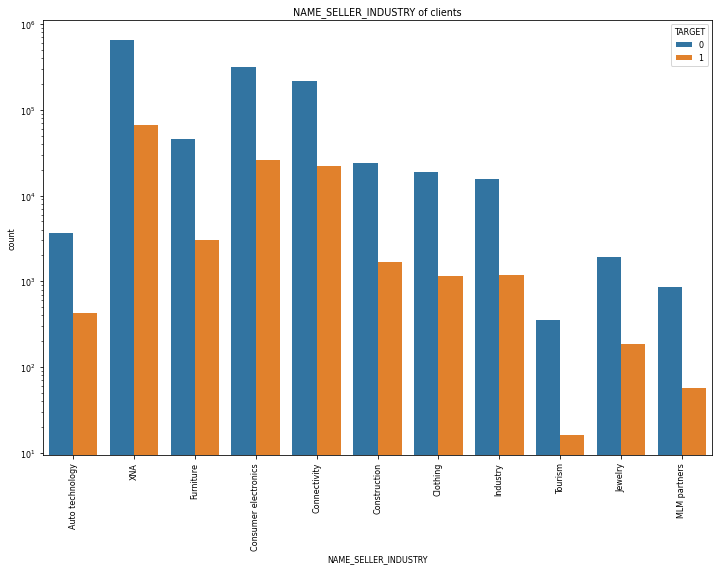

In [335]:

# NAME_SELLER_INDUSTRY of all  previous client
plt.figure(figsize=(12,8))
plt.title('NAME_SELLER_INDUSTRY of clients')
sns.countplot(data=df_merged ,x='NAME_SELLER_INDUSTRY',hue='TARGET')
plt.yscale('log')
plt.xticks(rotation =90)
plt.show()

**Observations**
-From the previous clients seeking loan least default was seen from clients in Tourism Industry


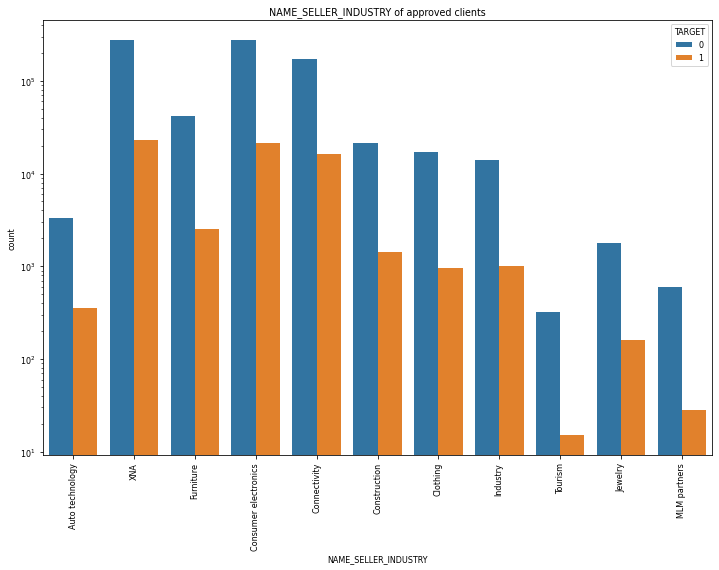

In [336]:

# NAME_SELLER_INDUSTRY of approved client
plt.figure(figsize=(12,8))
plt.title('NAME_SELLER_INDUSTRY of approved clients')
sns.countplot(data=approved ,x='NAME_SELLER_INDUSTRY',hue='TARGET')
plt.yscale('log')
plt.xticks(rotation =90)
plt.show()

**Observations**
- We can clearly see clients whose previous loan were approved defaulted least from Tourism
- Clients whose previous loan were approved defaulted the most from Consumer Electronics

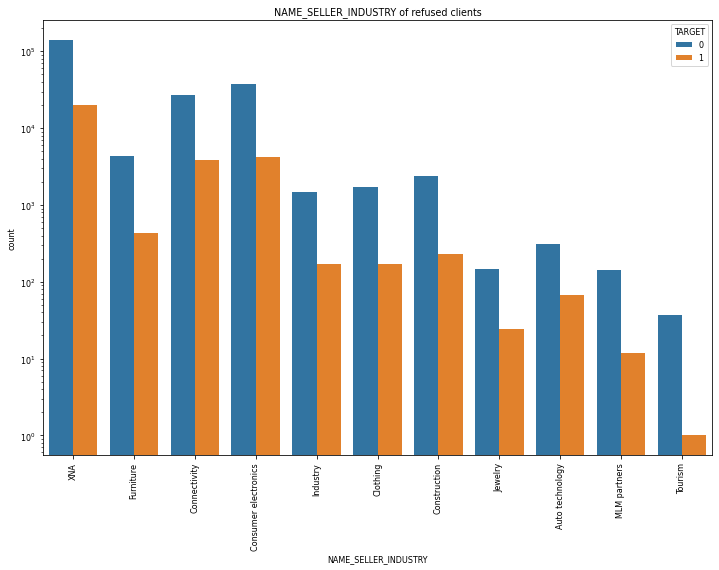

In [337]:

# NAME_SELLER_INDUSTRY of refused client
plt.figure(figsize=(12,8))
plt.title('NAME_SELLER_INDUSTRY of refused clients')
sns.countplot(data=refused ,x='NAME_SELLER_INDUSTRY',hue='TARGET')
plt.yscale('log')
plt.xticks(rotation =90)
plt.show()

**Observations**
- Clients previously refused for loan majorly belonged from Connectivity & Consumer Electronics 

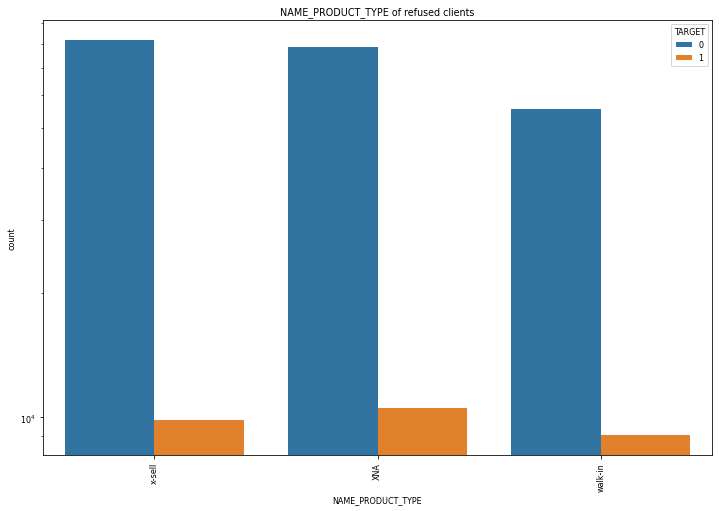

In [338]:


# NAME_PRODUCT_TYPE of refused client
plt.figure(figsize=(12,8))
plt.title('NAME_PRODUCT_TYPE of refused clients')
sns.countplot(data=refused ,x='NAME_PRODUCT_TYPE',hue='TARGET')
plt.yscale('log')
plt.xticks(rotation =90)
plt.show()

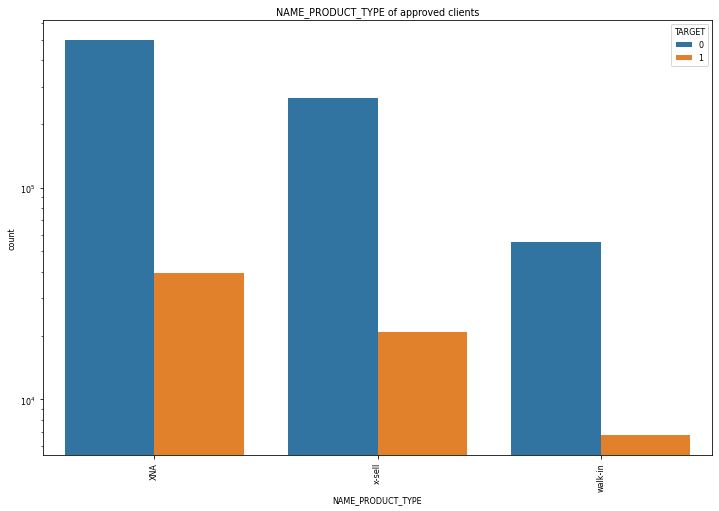

In [339]:
# NAME_PRODUCT_TYPE of approved client
plt.figure(figsize=(12,8))
plt.title('NAME_PRODUCT_TYPE of approved clients')
sns.countplot(data=approved ,x='NAME_PRODUCT_TYPE',hue='TARGET')
plt.yscale('log')
plt.xticks(rotation =90)
plt.show()

**Product type of approved were mostly not known. X-sell product type was more as compared to walk ins**

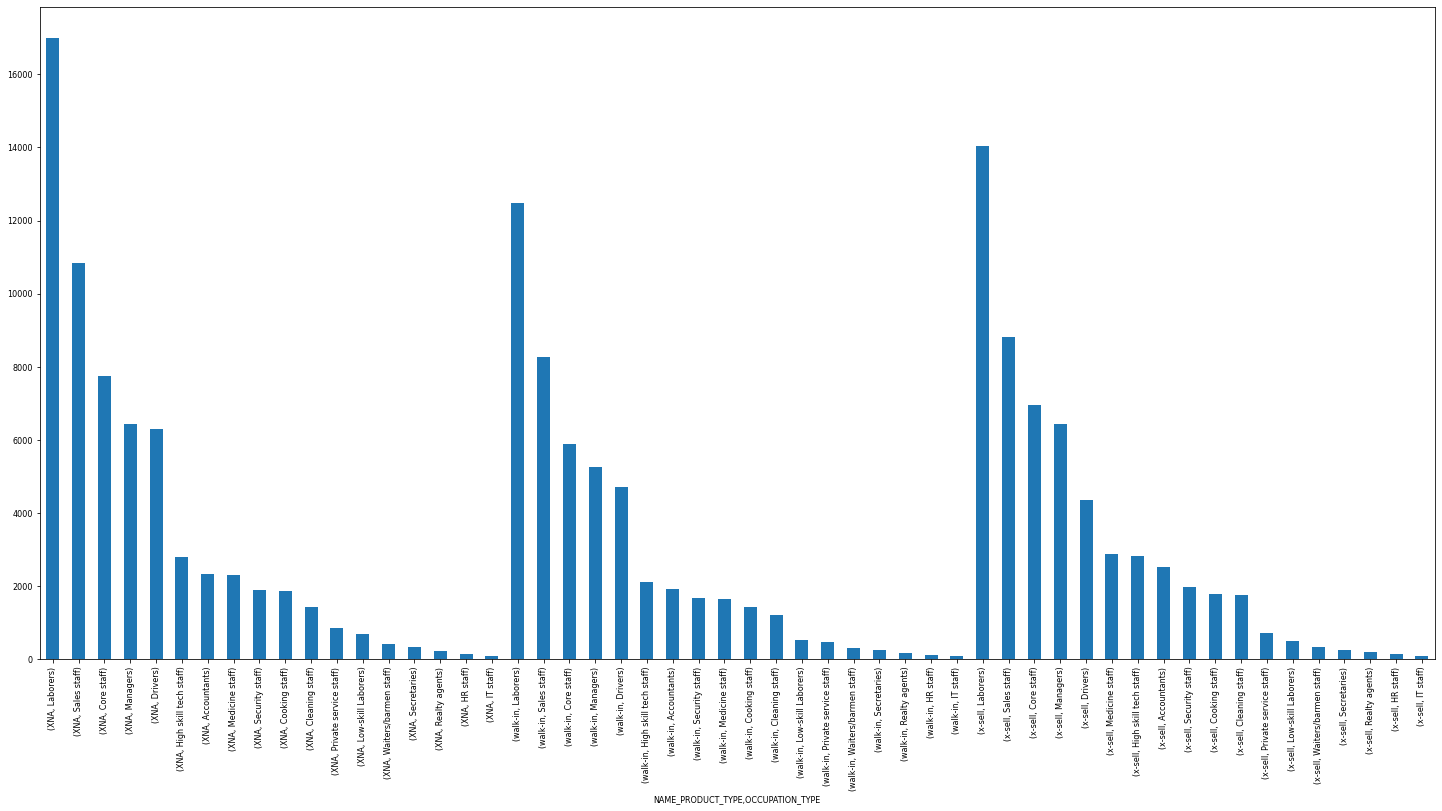

In [340]:
#Occuption type of refused clients applying for different product type
plt.figure(figsize=(25,12))
refused.groupby(['NAME_PRODUCT_TYPE'])['OCCUPATION_TYPE'].value_counts().plot.bar()
plt.show()


**Observations**

Among the clients whose loans were previously refused
- Most of them were laborers 
- Very few Clients worked as  IT Staff and HR staff

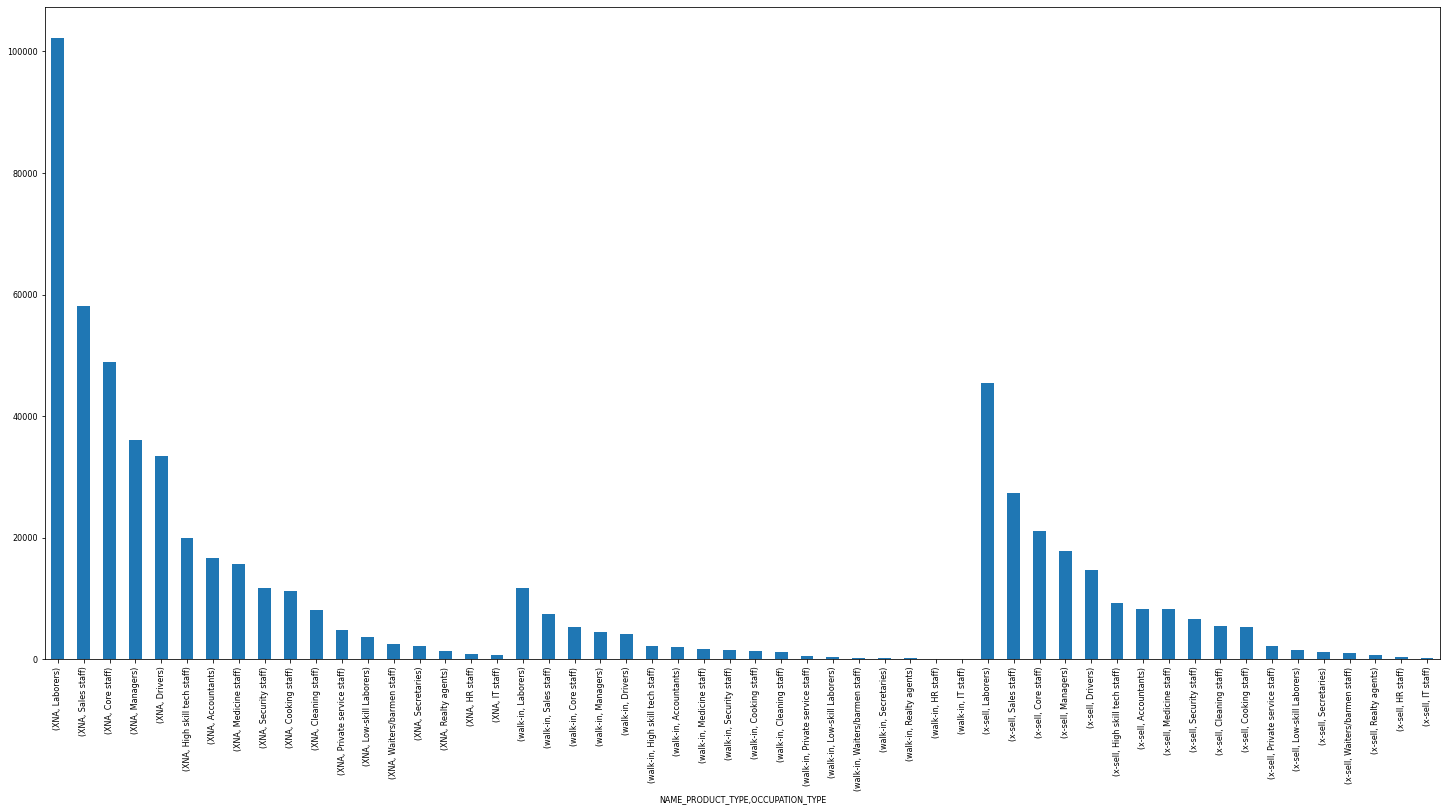

In [341]:
#Occuption type of  clients previously approved, currently applying for different product type
plt.figure(figsize=(25,12))
approved.groupby(['NAME_PRODUCT_TYPE'])['OCCUPATION_TYPE'].value_counts().plot.bar()
plt.show()

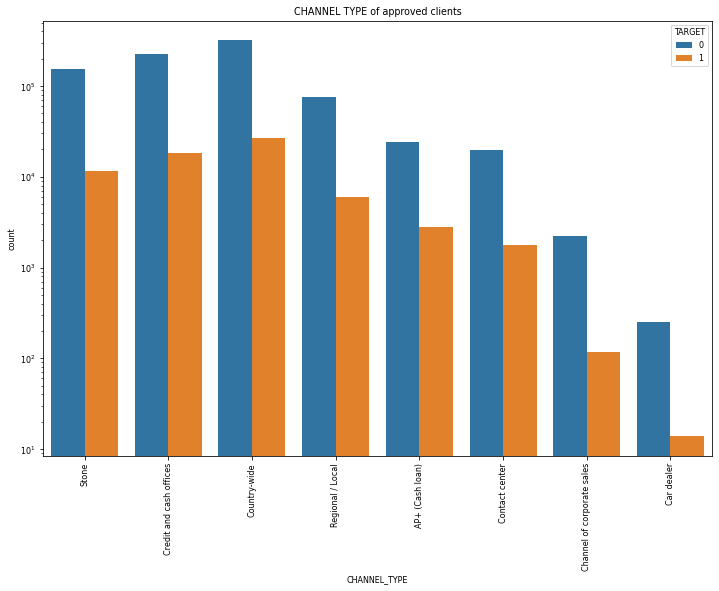

In [342]:

#Channel type of  clients previously approved, currently applying for loan

plt.figure(figsize=(12,8))
plt.title('CHANNEL TYPE of approved clients')
sns.countplot(data=approved ,x='CHANNEL_TYPE',hue='TARGET')
plt.yscale('log')
plt.xticks(rotation =90)
plt.show()

- Clients approved in the previous application were acquired mostly through Country wide channel
- Clients acquired through car dealers defaulted very less

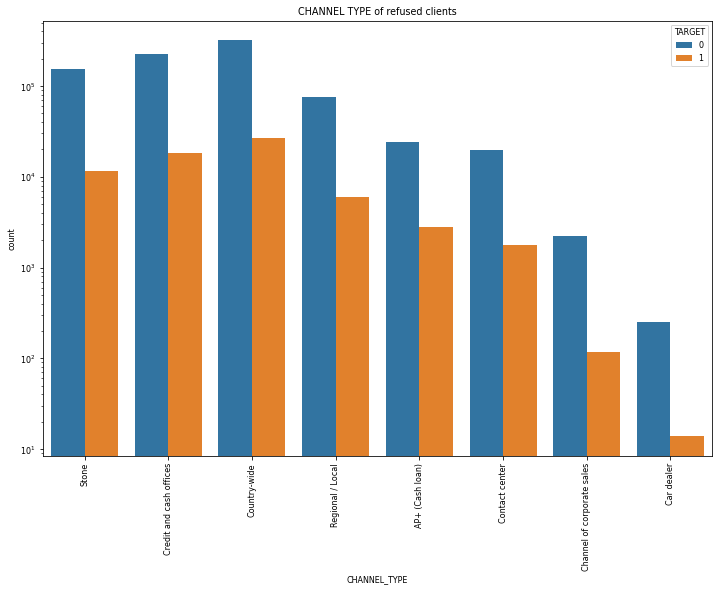

In [343]:
#Channel type of  clients previously refused, currently applying for loan

plt.figure(figsize=(12,8))
plt.title('CHANNEL TYPE of refused clients')
sns.countplot(data=approved ,x='CHANNEL_TYPE',hue='TARGET')
plt.yscale('log')
plt.xticks(rotation =90)
plt.show()

**clients acquired through car dealers which were refused defaulted less comparatively**

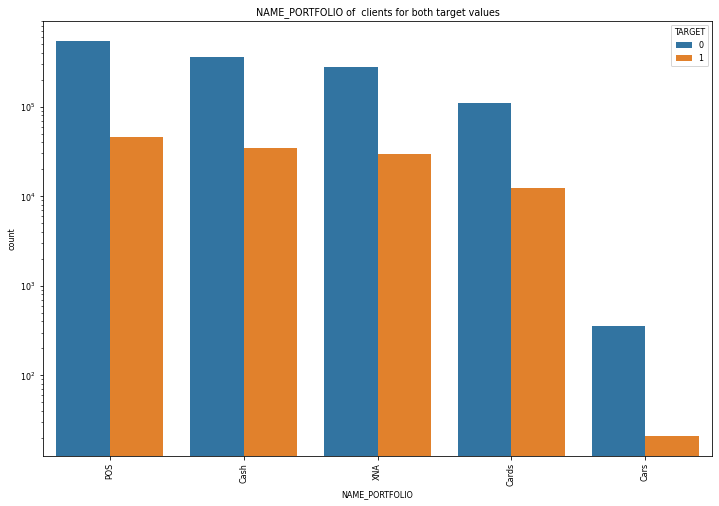

In [344]:

#NAME_PORTFOLIO of  clients ,currently applying for loan

plt.figure(figsize=(12,8))
plt.title('NAME_PORTFOLIO of  clients for both target values')
sns.countplot(data=df_merged ,x='NAME_PORTFOLIO',hue='TARGET')
plt.yscale('log')
plt.xticks(rotation =90)
plt.show()

- **Previous clients currently applying for loan, had earlier applied for POS and CASH**


- **Very few clients had applied for CAR Loan**

### Summary of Analysis

Direct correlation is difficult between different values of the categorical values like marital status, default target,
car/house ownership & gender, as the dataset is imbalanced.
• Central tendency values might have biased as the dataset contains outliers. (in both datasets)
1. Credit amount, Annuity amount & Goods price correlates positively among them.
2. Credit amount & Annuity amount correlates positively with Income amount among others(non defaulters)
3. Income amount has positive correlation with Goods price among others(non defaulters)
4. Children, family members count has no correlation with income amount; but has good correlation among themselves and with applicant’s age, indicating more
family members
5. ID change correlates negatively with age & employment year (young people change their IDs frequently) 
6. Others (non defaulters) live in more populated region.
7. Labor/working class applicants are more. Secondary education and above are less chance of defaulting.
8. People living in Co op apartment and office apartment, are less likely default as compared to others.
9. IT staff comparatively low in defaulting.
10. Businessman & Student categories doesn’t appear in defaulter data.
11. Amount of Credit to Businessman doesn’t has outliers.
12. 40-50 age group has high income however after 60,drops significantly.
13. Cash, Cross selling cash, POS mobile & household are most popular products in the past.
14. Products with interest are more popular than products without interest.
15. Cash loans and consumer loans are approved mostly in the past.
16. Most cash loans were taken for ‘repairs’, however most are targeted as ‘default’.
17. More than 15% of refused applications are not targeted as ‘default’ it’s a loss to refuse them in the past.
18. There are more refusals than approvals for every loan purposes.
19. Loans to repay other loans used most promptly.
20. Close to 80% applicants in the past were repeaters are refreshed.
21. Laborers and working class had loan approved in past.
22. Pensioners, commercial associates were also had higher approvals.
23. Mostly married applicant loans are approved.
24. Reality agents are least among those unused previous offer.
25. Among cancellations, defaulting drivers are higher than managers.